In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



plt.rc('font',family='Malgun Gothic')

plt.rc('axes',unicode_minus=False)

In [2]:
bike_file_path = "C:/Users/eagls/bike_data/bike.json"
bike_data = pd.read_json(bike_file_path)

In [3]:
bike_df=pd.DataFrame(bike_data['useStatus']['row'])

In [4]:
bike_df.isnull().sum()

STA_LOC        0
RENT_NM        0
STAT_DATA      0
RENT_CNT       0
RTN_CNT        0
START_INDEX    0
END_INDEX      0
dtype: int64

In [5]:
bike_df.duplicated().sum()

0

In [6]:
weather_file_path = "C:/Users/eagls/weather_data/json_cycle_finale.json"
weather_data = pd.read_json(weather_file_path)


In [7]:
weather_df=pd.DataFrame(weather_data["response"]["body"]["items"]["item"])

In [8]:
weather_df.duplicated().sum()

2

In [9]:
weather_df.drop_duplicates(inplace=True)


In [10]:
merged_df = pd.merge(bike_df, weather_df, left_on='STAT_DATA', right_on='tm')

In [11]:
merged_df.columns

Index(['STA_LOC', 'RENT_NM', 'STAT_DATA', 'RENT_CNT', 'RTN_CNT', 'START_INDEX',
       'END_INDEX', 'stnId', 'stnNm', 'tm', 'avgTa', 'minTa', 'minTaHrmt',
       'maxTa', 'maxTaHrmt', 'mi10MaxRn', 'mi10MaxRnHrmt', 'hr1MaxRn',
       'hr1MaxRnHrmt', 'sumRnDur', 'sumRn', 'maxInsWs', 'maxInsWsWd',
       'maxInsWsHrmt', 'maxWs', 'maxWsWd', 'maxWsHrmt', 'avgWs', 'hr24SumRws',
       'maxWd', 'avgTd', 'minRhm', 'minRhmHrmt', 'avgRhm', 'avgPv', 'avgPa',
       'maxPs', 'maxPsHrmt', 'minPs', 'minPsHrmt', 'avgPs', 'ssDur', 'sumSsHr',
       'hr1MaxIcsrHrmt', 'hr1MaxIcsr', 'sumGsr', 'ddMefs', 'ddMefsHrmt',
       'ddMes', 'ddMesHrmt', 'sumDpthFhsc', 'avgTca', 'avgLmac', 'avgTs',
       'minTg', 'avgCm5Te', 'avgCm10Te', 'avgCm20Te', 'avgCm30Te', 'avgM05Te',
       'avgM10Te', 'avgM15Te', 'avgM30Te', 'avgM50Te', 'sumLrgEv', 'sumSmlEv',
       'n99Rn', 'iscs', 'sumFogDur'],
      dtype='object')

In [12]:
merged_df.isnull().sum()

STA_LOC      0
RENT_NM      0
STAT_DATA    0
RENT_CNT     0
RTN_CNT      0
            ..
sumLrgEv     0
sumSmlEv     0
n99Rn        0
iscs         0
sumFogDur    0
Length: 69, dtype: int64

In [13]:
merged_df.columns

Index(['STA_LOC', 'RENT_NM', 'STAT_DATA', 'RENT_CNT', 'RTN_CNT', 'START_INDEX',
       'END_INDEX', 'stnId', 'stnNm', 'tm', 'avgTa', 'minTa', 'minTaHrmt',
       'maxTa', 'maxTaHrmt', 'mi10MaxRn', 'mi10MaxRnHrmt', 'hr1MaxRn',
       'hr1MaxRnHrmt', 'sumRnDur', 'sumRn', 'maxInsWs', 'maxInsWsWd',
       'maxInsWsHrmt', 'maxWs', 'maxWsWd', 'maxWsHrmt', 'avgWs', 'hr24SumRws',
       'maxWd', 'avgTd', 'minRhm', 'minRhmHrmt', 'avgRhm', 'avgPv', 'avgPa',
       'maxPs', 'maxPsHrmt', 'minPs', 'minPsHrmt', 'avgPs', 'ssDur', 'sumSsHr',
       'hr1MaxIcsrHrmt', 'hr1MaxIcsr', 'sumGsr', 'ddMefs', 'ddMefsHrmt',
       'ddMes', 'ddMesHrmt', 'sumDpthFhsc', 'avgTca', 'avgLmac', 'avgTs',
       'minTg', 'avgCm5Te', 'avgCm10Te', 'avgCm20Te', 'avgCm30Te', 'avgM05Te',
       'avgM10Te', 'avgM15Te', 'avgM30Te', 'avgM50Te', 'sumLrgEv', 'sumSmlEv',
       'n99Rn', 'iscs', 'sumFogDur'],
      dtype='object')

In [14]:
merged_df.drop(columns='stnId', inplace=True) 

In [15]:
merged_df.drop(columns='tm', inplace=True)

In [16]:
merged_df.drop(columns='START_INDEX', inplace=True)

In [17]:
merged_df.drop(columns='END_INDEX', inplace=True)

In [18]:
merged_df

,STA_LOC,RENT_NM,STAT_DATA,RENT_CNT,RTN_CNT,stnNm,avgTa,minTa,minTaHrmt,maxTa,...,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur
0,양천구,729. 서부식자재마트 건너편,2020-01-01,16,12,서울,-2.2,-6.5,0001,0.3,...,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,
1,양천구,731. 서울시 도로환경관리센터,2020-01-01,20,20,서울,-2.2,-6.5,0001,0.3,...,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,
2,양천구,732. 신월중학교,2020-01-01,9,2,서울,-2.2,-6.5,0001,0.3,...,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,
3,양천구,733. 신정이펜하우스314동,2020-01-01,6,4,서울,-2.2,-6.5,0001,0.3,...,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,
4,양천구,734. 신트리공원 입구,2020-01-01,13,16,서울,-2.2,-6.5,0001,0.3,...,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093657,마포구,154. 마포구청역,2022-12-30,43,50,서울,-1.8,-4.4,2355,2.3,...,2.9,6.6,10.4,16.1,18.0,1.3,1.8,0.0,-{눈}-0235. {박무}0735-{박무}{강도0}0900-0910.,
1093658,도봉구,1765.쌍문역 1번출구 주변,2022-12-30,19,24,서울,-1.8,-4.4,2355,2.3,...,2.9,6.6,10.4,16.1,18.0,1.3,1.8,0.0,-{눈}-0235. {박무}0735-{박무}{강도0}0900-0910.,
1093659,도봉구,1767.방학초등학교 앞,2022-12-30,20,16,서울,-1.8,-4.4,2355,2.3,...,2.9,6.6,10.4,16.1,18.0,1.3,1.8,0.0,-{눈}-0235. {박무}0735-{박무}{강도0}0900-0910.,
1093660,도봉구,1768.신동아타워 버스정류소,2022-12-30,10,8,서울,-1.8,-4.4,2355,2.3,...,2.9,6.6,10.4,16.1,18.0,1.3,1.8,0.0,-{눈}-0235. {박무}0735-{박무}{강도0}0900-0910.,


In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093662 entries, 0 to 1093661
Data columns (total 65 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   STA_LOC         1093662 non-null  object
 1   RENT_NM         1093662 non-null  object
 2   STAT_DATA       1093662 non-null  object
 3   RENT_CNT        1093662 non-null  object
 4   RTN_CNT         1093662 non-null  object
 5   stnNm           1093662 non-null  object
 6   avgTa           1093662 non-null  object
 7   minTa           1093662 non-null  object
 8   minTaHrmt       1093662 non-null  object
 9   maxTa           1093662 non-null  object
 10  maxTaHrmt       1093662 non-null  object
 11  mi10MaxRn       1093662 non-null  object
 12  mi10MaxRnHrmt   1093662 non-null  object
 13  hr1MaxRn        1093662 non-null  object
 14  hr1MaxRnHrmt    1093662 non-null  object
 15  sumRnDur        1093662 non-null  object
 16  sumRn           1093662 non-null  object
 17  maxInsWs

In [20]:
merged_df.describe()

,STA_LOC,RENT_NM,STAT_DATA,RENT_CNT,RTN_CNT,stnNm,avgTa,minTa,minTaHrmt,maxTa,...,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur
count,1093662,1093662,1093662,1093662,1093662,1093662,1093662,1093662,1093662,1093662,...,1093662,1093662,1093662,1093662,1093662,1093662,1093662,1093662,1093662,1093662
unique,25,2139,1095,655,657,1,370,376,394,363,...,268,234,211,135,59,70,97,165,698,9
top,송파구,659. 제기동역 1번출구,2020-01-01,7,3,서울,24.3,14.8,0001,27.5,...,1.2,6.9,23.6,20.1,13.4,1.5,2.1,,,
freq,92359,1095,999,25195,27550,1093662,12987,7992,27972,8991,...,33966,13986,17982,27972,78921,47952,35964,636363,393606,1085670


In [21]:
merged_df['RTN_CNT'] = merged_df['RTN_CNT'].astype(int)

In [22]:
merged_df['RENT_CNT'] = merged_df['RENT_CNT'].astype(int)


In [23]:
merged_df.groupby(['RENT_NM'])['RENT_CNT'].sum().sort_values(ascending=False)

RENT_NM
2715.마곡나루역 2번 출구           288357
2701. 마곡나루역 5번출구 뒤편        229831
2177. 신대방역 2번 출구           226993
1153. 발산역 1번, 9번 인근 대여소    225396
3533. 건대입구역 사거리(롯데백화점)     202757
                            ...  
1694.월계세양청마루아파트 후문              0
1642. 서울여대 남문                   0
4040. 공릉로 26길                   0
1628. 노일초등학교 앞                  0
1946. 구로역 광장                    0
Name: RENT_CNT, Length: 2139, dtype: int32

In [24]:
location_rent=merged_df.groupby(['STA_LOC'])['RENT_CNT'].sum().sort_values(ascending=False).reset_index()

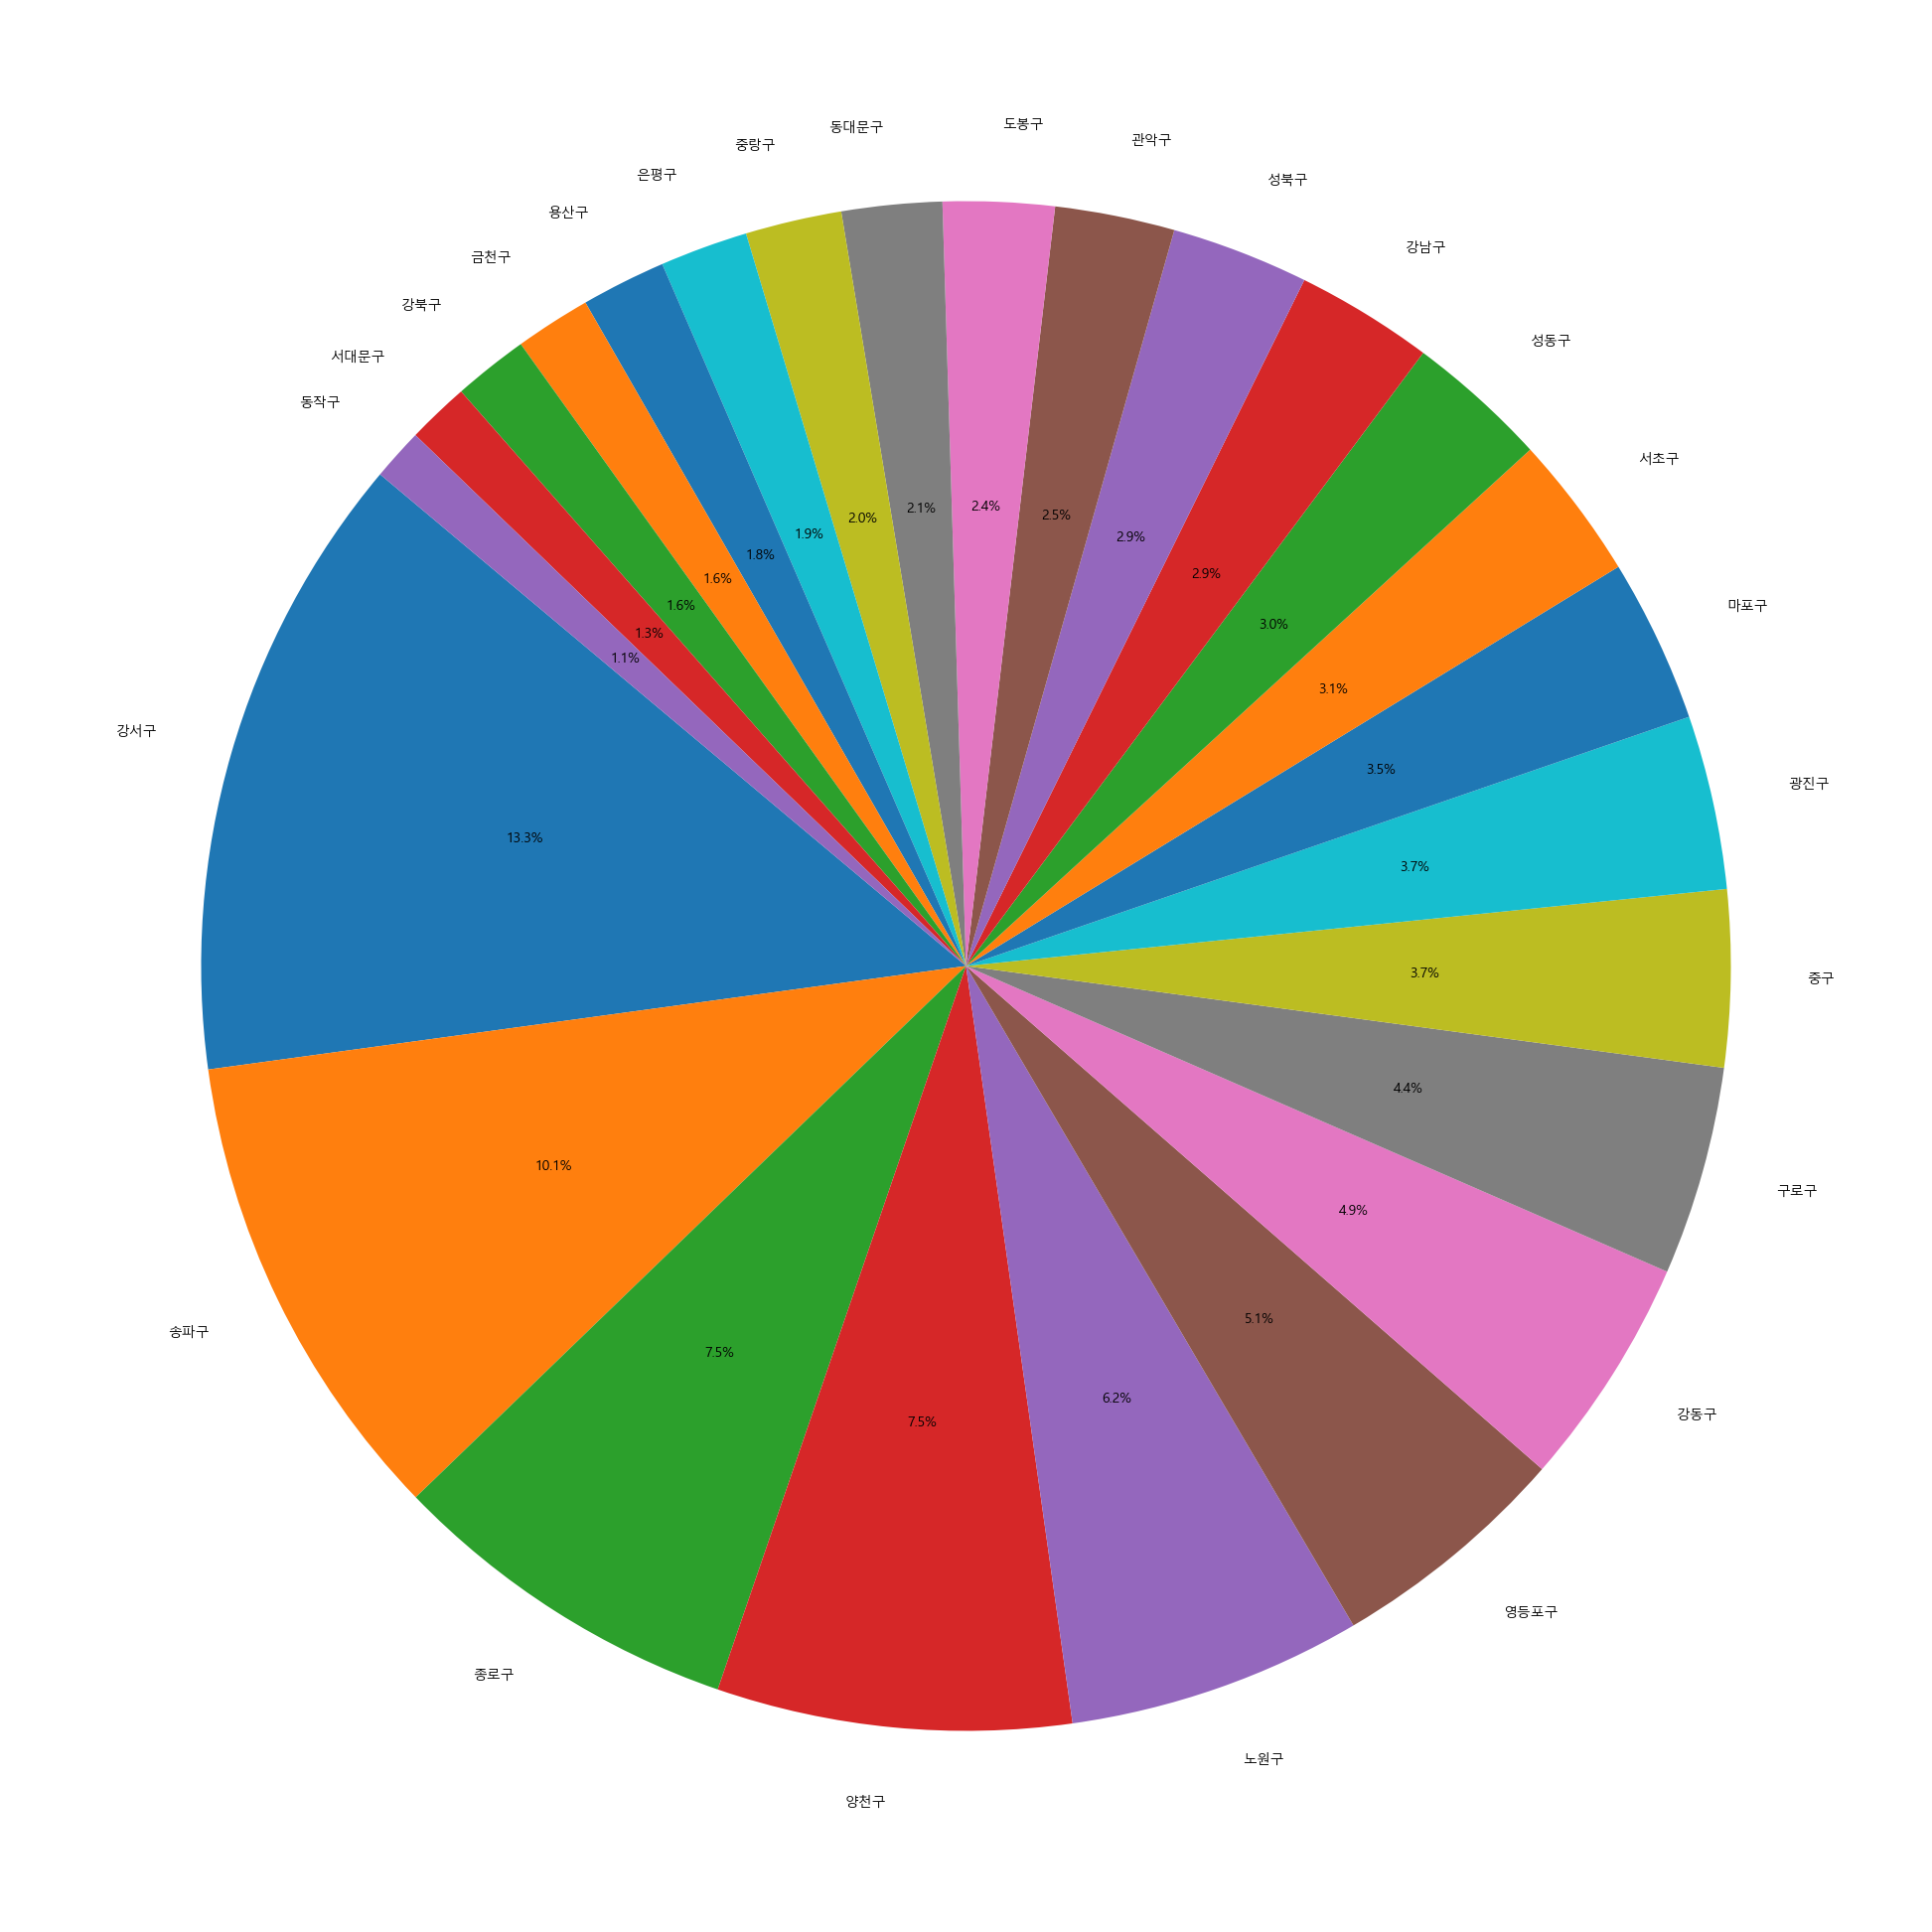

In [25]:
plt.figure(figsize=(25, 25))
plt.pie(location_rent['RENT_CNT'], labels=location_rent['STA_LOC'], autopct='%1.1f%%', startangle=140)
plt.show()

### 자전거 이용 위치 비율

In [26]:
merged_df['Year'] = merged_df['STAT_DATA'].map(lambda x:int(x.split("-")[0]))
merged_df['Month'] = merged_df['STAT_DATA'].map(lambda x:int(x.split("-")[1]))
merged_df['Day'] = merged_df['STAT_DATA'].map(lambda x:int(x.split("-")[2]))

In [27]:
# Python의 Pandas로 변환한 코드
merged_df['avg_rhm_hour'] = merged_df['minRhmHrmt'].str.slice(0, 2)
merged_df['avg_rhm_minute'] = merged_df['minRhmHrmt'].str.slice(2, 4)
merged_df['min_ps_hour'] = merged_df['minPsHrmt'].str.slice(0, 2)
merged_df['min_ps_minute'] = merged_df['minPsHrmt'].str.slice(2, 4)
merged_df['max_ws_hour'] = merged_df['maxWsHrmt'].str.slice(0, 2)
merged_df['max_ws_minute'] = merged_df['maxWsHrmt'].str.slice(2, 4)
merged_df['max_ta_hour'] = merged_df['maxTaHrmt'].str.slice(0, 2)
merged_df['max_ta_minute'] = merged_df['maxTaHrmt'].str.slice(2, 4)

merged_df['min_ta_hour'] = merged_df['maxWsHrmt'].str.slice(0, 2)
merged_df['min_ta_minute'] = merged_df['maxWsHrmt'].str.slice(2, 4)

In [28]:
merged_df['sumRnDur'] = merged_df['sumRnDur'].apply(lambda x:0 if x == '' else float(x))
merged_df['sumRn'] = merged_df['sumRn'].apply(lambda x:0 if x == '' else float(x))
merged_df['ddMes'] = merged_df['ddMes'].apply(lambda x:0 if x == '' else float(x))
merged_df['ddMefs'] = merged_df['ddMefs'].apply(lambda x:0 if x == '' else float(x))
merged_df['sumFogDur'] = merged_df['sumFogDur'].apply(lambda x:0 if x == '' else float(x))


In [29]:
convert_to_float = ['avgTa', 'maxTa', 'sumRnDur', 'sumRn', 'maxInsWs', 'maxInsWsWd', 'maxWs', 'maxWsWd', 'avgWs', 'maxWd', 'avgTd', 'avgRhm', 'avgPv', 'ssDur', 'avgTca', 'avgLmac', 'avgTs', 'avgM50Te','sumFogDur','ddMefs','ddMes'] 
convert_to_int = ['Year', 'Month', 'avg_rhm_hour', 'avg_rhm_minute','hr24SumRws', 'max_ws_hour','max_ws_minute','max_ta_hour','max_ta_minute','min_ta_hour','min_ta_minute']


In [30]:
selected_columns = convert_to_float + convert_to_int
nan_values_in_selected_columns = merged_df[selected_columns].isna().sum()

In [31]:
nan_values_in_selected_columns

avgTa             0
maxTa             0
sumRnDur          0
sumRn             0
maxInsWs          0
maxInsWsWd        0
maxWs             0
maxWsWd           0
avgWs             0
maxWd             0
avgTd             0
avgRhm            0
avgPv             0
ssDur             0
avgTca            0
avgLmac           0
avgTs             0
avgM50Te          0
sumFogDur         0
ddMefs            0
ddMes             0
Year              0
Month             0
avg_rhm_hour      0
avg_rhm_minute    0
hr24SumRws        0
max_ws_hour       0
max_ws_minute     0
max_ta_hour       0
max_ta_minute     0
min_ta_hour       0
min_ta_minute     0
dtype: int64

In [32]:
non_null_counts = merged_df.count() - merged_df.isnull().sum()

In [33]:
any_nan_values = merged_df.isna().any().any()

In [34]:
any_nan_values

False

In [35]:
for col_name in convert_to_int:
    merged_df[col_name] = pd.to_numeric(merged_df[col_name], errors='coerce').astype('Int64')

# Now convert columns to integer type
for col_name in convert_to_int:
    merged_df[col_name] = merged_df[col_name].astype('Int64')

In [36]:
# Find rows with NaN values in the specified columns
rows_with_nan = merged_df[convert_to_int].isna().any(axis=1)

# Filter out rows with NaN values
rows_with_nan_data = merged_df[rows_with_nan]

In [37]:
rows_with_nan_data

,STA_LOC,RENT_NM,STAT_DATA,RENT_CNT,RTN_CNT,stnNm,avgTa,minTa,minTaHrmt,maxTa,...,avg_rhm_hour,avg_rhm_minute,min_ps_hour,min_ps_minute,max_ws_hour,max_ws_minute,max_ta_hour,max_ta_minute,min_ta_hour,min_ta_minute


In [38]:
# Convert float columns
for col_name in convert_to_float:
    merged_df[col_name] = merged_df[col_name].astype(float)

# Convert int columns
for col_name in convert_to_int:
    merged_df[col_name] = merged_df[col_name].astype(int)

In [39]:

merged_df.loc[(merged_df['Month'] ==3) | (merged_df['Month'] ==4) |(merged_df['Month'] ==5), 'Season'] = 1
merged_df.loc[(merged_df['Month'] ==6) | (merged_df['Month'] ==7) |(merged_df['Month'] ==8), 'Season'] = 2
merged_df.loc[(merged_df['Month'] ==9) | (merged_df['Month'] ==10) |(merged_df['Month'] ==11), 'Season'] = 3
merged_df.loc[(merged_df['Month'] ==12) | (merged_df['Month'] ==1) |(merged_df['Month'] ==2), 'Season'] = 4

In [40]:
merged_df['STAT_DATA']=pd.to_datetime(merged_df['STAT_DATA'])

In [41]:
merged_df['Day_Of_Week'] = merged_df['STAT_DATA'].dt.weekday

In [42]:
merged_df.duplicated().sum()

0

In [43]:
season_rent = merged_df.groupby('Season')['RENT_CNT'].sum().reset_index()

In [44]:
season_rent

,Season,RENT_CNT
0,1.0,11676514
1,2.0,12315840
2,3.0,12803063
3,4.0,5119991


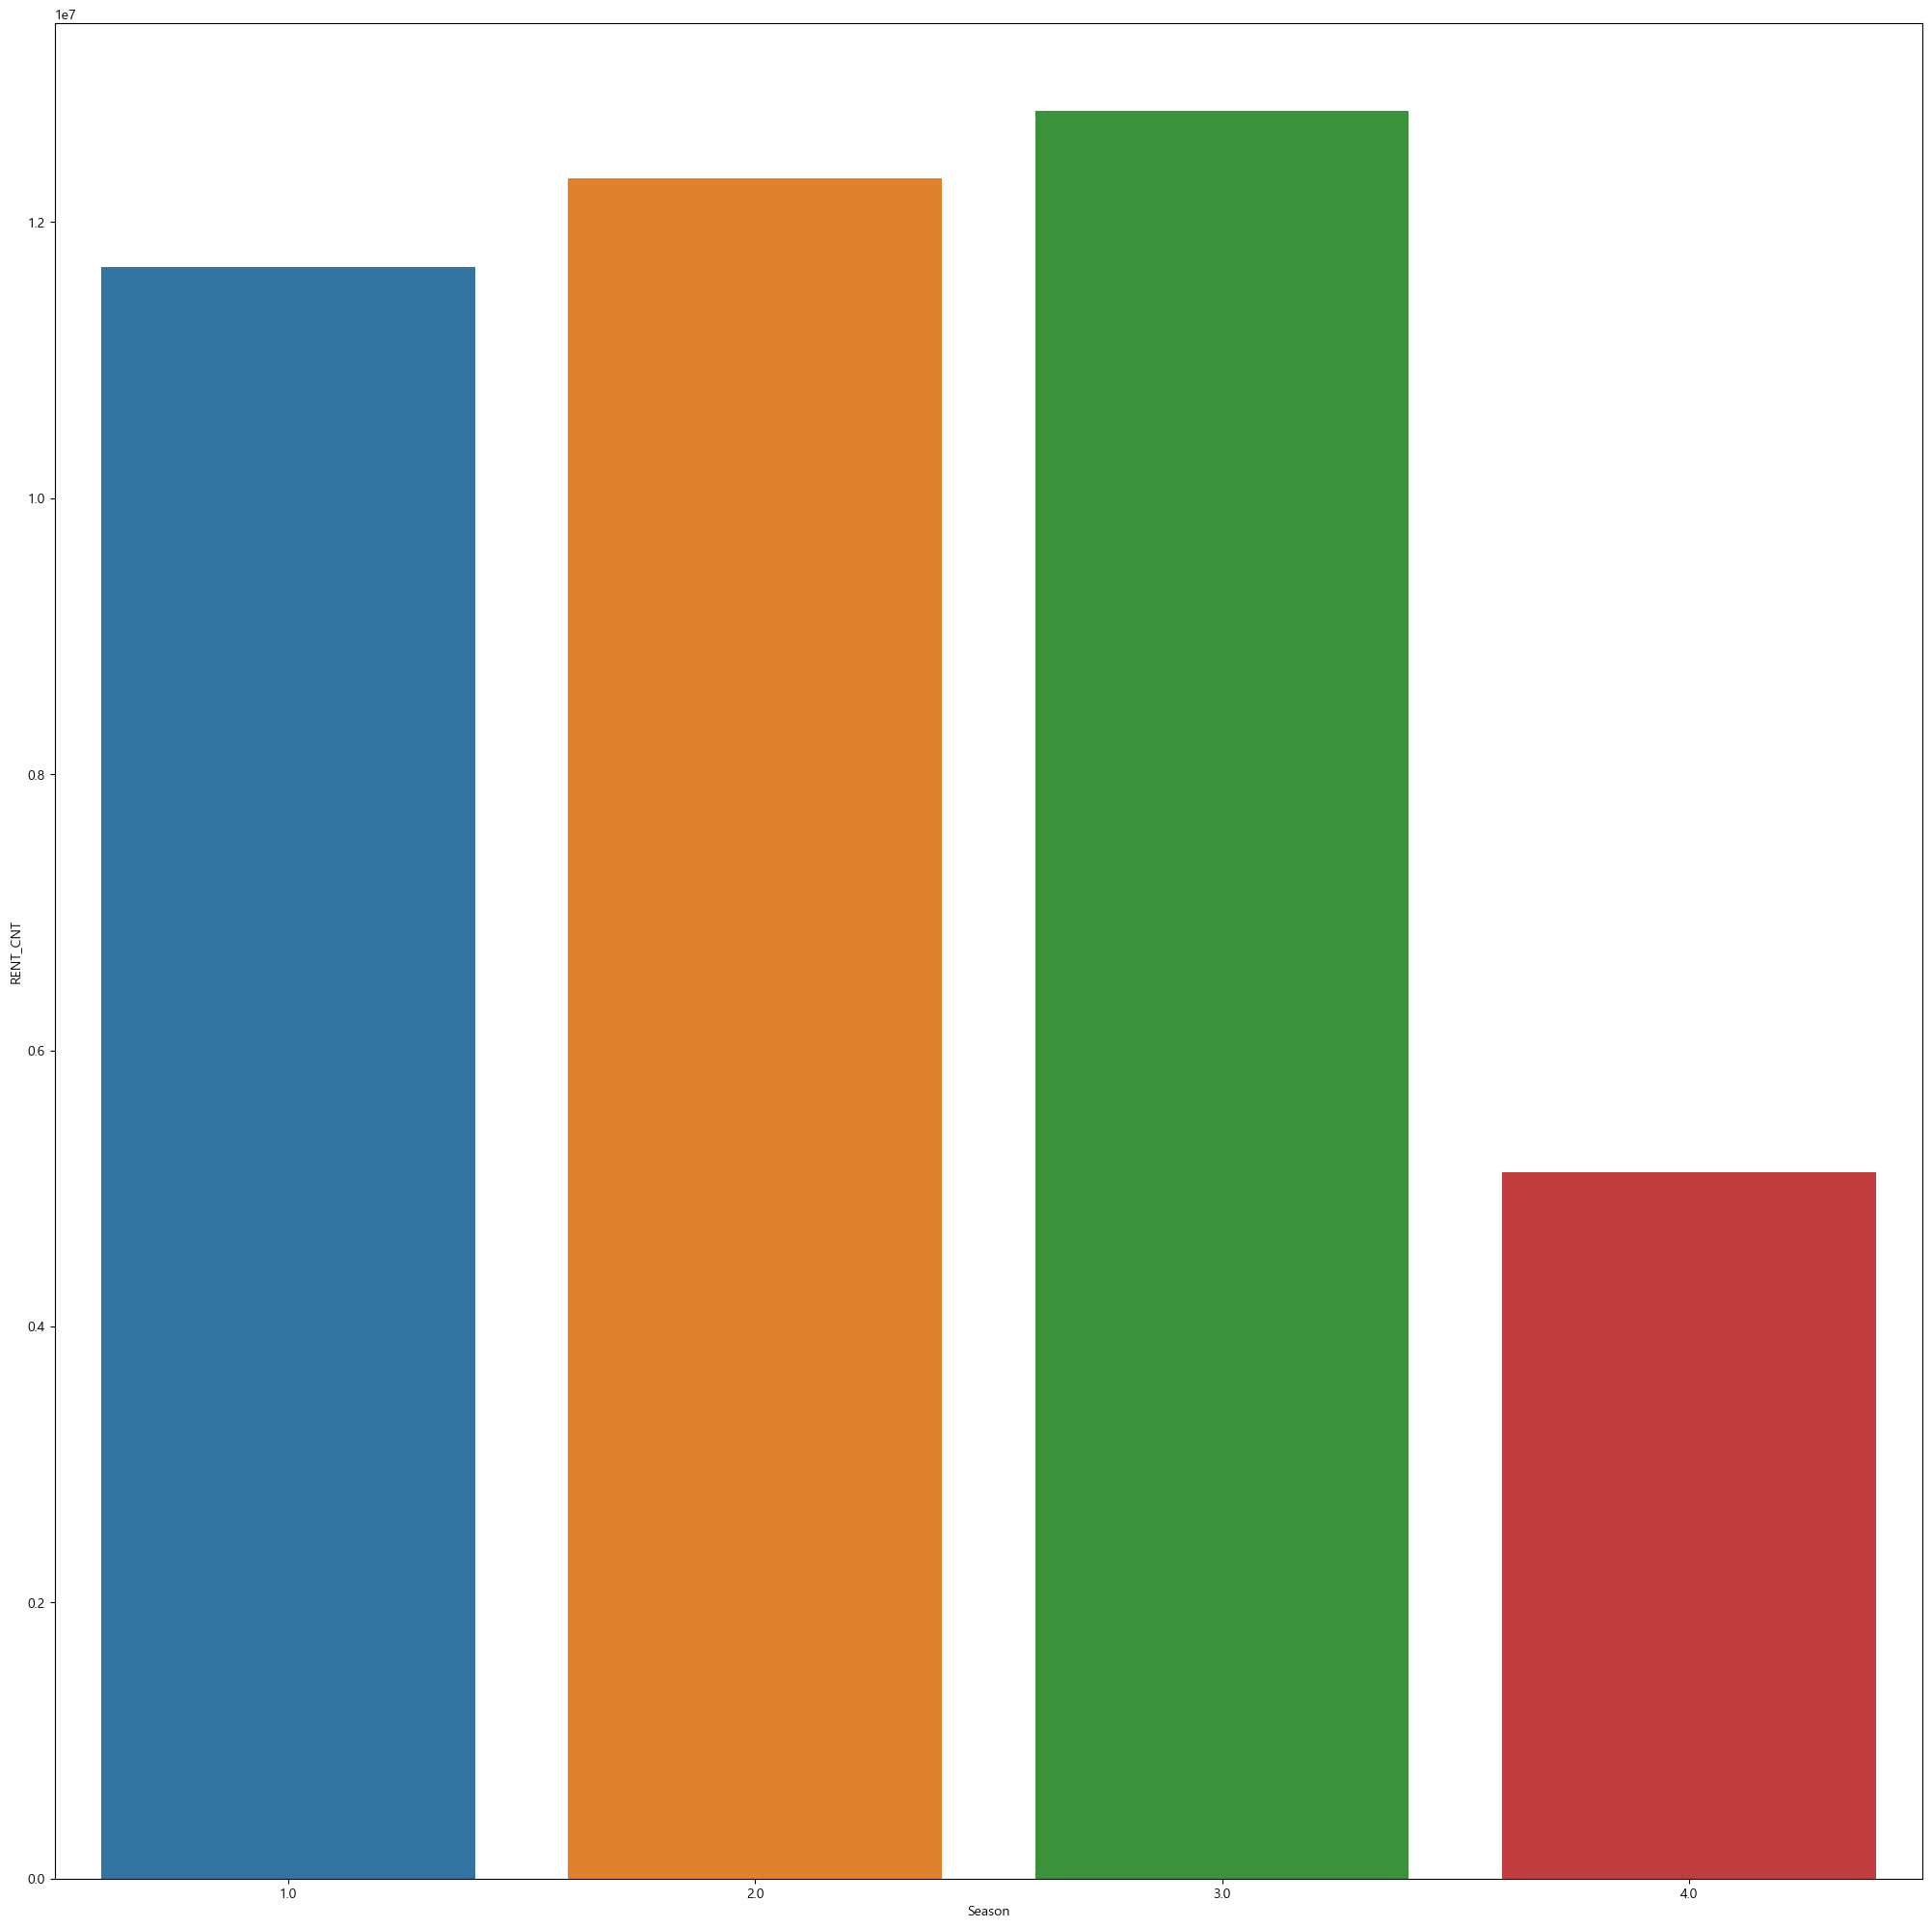

In [45]:
plt.figure(figsize=(25, 25))
sns.barplot(data=season_rent, x='Season', y='RENT_CNT')
plt.show()

### 계절별 렌트 횟수
- 날씨가 좋은 봄 여름 가을에 이용이 많고 겨울에 적음
- 의외로 봄보다 여름이 이용자가 더 많음

In [46]:
merged_df['avgTca'].unique()

array([ 8.9,  7.9,  0. ,  2.1,  3.9,  9.8, 10. ,  9.6,  1.6,  3.1,  3.6,
        1.4,  1. ,  0.1,  5. ,  4.8,  2.3,  2.9,  7.8,  3.4,  3. ,  7.4,
        5.8,  9.5,  7.3,  6.6,  4. ,  6.1,  1.5,  0.9,  2.5,  2.8,  1.1,
        9.9,  9.1,  6.5,  6. ,  9.3,  5.9,  7. ,  7.5,  5.3,  2.6,  8.1,
        5.1,  5.4,  0.3,  0.4,  6.9,  5.5,  3.5,  1.3,  0.8,  1.9,  4.1,
        1.8,  3.3,  9. ,  6.8,  0.6,  8.3,  7.1,  8.5,  7.6,  8.6,  8.4,
        3.8,  4.4,  6.3,  4.5,  8. ,  6.4,  8.8,  9.4,  4.6,  4.9,  0.5,
        2.4,  2. ,  5.6,  4.3])

In [47]:
merged_df['avgTca'] = merged_df['avgTca'].astype(float)

In [48]:
merged_df.loc[merged_df['avgTca'] <=3, 'Avg_Cloud_level'] = 0
merged_df.loc[(merged_df['avgTca'] >3)&(merged_df['avgTca'] <=6), 'Avg_Cloud_level'] =1
merged_df.loc[(merged_df['avgTca'] >6)&(merged_df['avgTca'] <=10), 'Avg_Cloud_level'] = 2


In [49]:
merged_df

,STA_LOC,RENT_NM,STAT_DATA,RENT_CNT,RTN_CNT,stnNm,avgTa,minTa,minTaHrmt,maxTa,...,min_ps_minute,max_ws_hour,max_ws_minute,max_ta_hour,max_ta_minute,min_ta_hour,min_ta_minute,Season,Day_Of_Week,Avg_Cloud_level
0,양천구,729. 서부식자재마트 건너편,2020-01-01,16,12,서울,-2.2,-6.5,0001,0.3,...,18,9,4,14,57,9,4,4.0,2,2.0
1,양천구,731. 서울시 도로환경관리센터,2020-01-01,20,20,서울,-2.2,-6.5,0001,0.3,...,18,9,4,14,57,9,4,4.0,2,2.0
2,양천구,732. 신월중학교,2020-01-01,9,2,서울,-2.2,-6.5,0001,0.3,...,18,9,4,14,57,9,4,4.0,2,2.0
3,양천구,733. 신정이펜하우스314동,2020-01-01,6,4,서울,-2.2,-6.5,0001,0.3,...,18,9,4,14,57,9,4,4.0,2,2.0
4,양천구,734. 신트리공원 입구,2020-01-01,13,16,서울,-2.2,-6.5,0001,0.3,...,18,9,4,14,57,9,4,4.0,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093657,마포구,154. 마포구청역,2022-12-30,43,50,서울,-1.8,-4.4,2355,2.3,...,42,15,23,13,54,15,23,4.0,4,0.0
1093658,도봉구,1765.쌍문역 1번출구 주변,2022-12-30,19,24,서울,-1.8,-4.4,2355,2.3,...,42,15,23,13,54,15,23,4.0,4,0.0
1093659,도봉구,1767.방학초등학교 앞,2022-12-30,20,16,서울,-1.8,-4.4,2355,2.3,...,42,15,23,13,54,15,23,4.0,4,0.0
1093660,도봉구,1768.신동아타워 버스정류소,2022-12-30,10,8,서울,-1.8,-4.4,2355,2.3,...,42,15,23,13,54,15,23,4.0,4,0.0


In [50]:
pd.set_option("display.max_columns", None)

In [51]:
merged_df

,STA_LOC,RENT_NM,STAT_DATA,RENT_CNT,RTN_CNT,stnNm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxInsWsHrmt,maxWs,maxWsWd,maxWsHrmt,avgWs,hr24SumRws,maxWd,avgTd,minRhm,minRhmHrmt,avgRhm,avgPv,avgPa,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,hr1MaxIcsrHrmt,hr1MaxIcsr,sumGsr,ddMefs,ddMefsHrmt,ddMes,ddMesHrmt,sumDpthFhsc,avgTca,avgLmac,avgTs,minTg,avgCm5Te,avgCm10Te,avgCm20Te,avgCm30Te,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur,Year,Month,Day,avg_rhm_hour,avg_rhm_minute,min_ps_hour,min_ps_minute,max_ws_hour,max_ws_minute,max_ta_hour,max_ta_minute,min_ta_hour,min_ta_minute,Season,Day_Of_Week,Avg_Cloud_level
0,양천구,729. 서부식자재마트 건너편,2020-01-01,16,12,서울,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50.0,0906,2.6,50.0,0904,0.6,509,50.0,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,0.0,2020,1,1,0,2,14,18,9,4,14,57,9,4,4.0,2,2.0
1,양천구,731. 서울시 도로환경관리센터,2020-01-01,20,20,서울,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50.0,0906,2.6,50.0,0904,0.6,509,50.0,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,0.0,2020,1,1,0,2,14,18,9,4,14,57,9,4,4.0,2,2.0
2,양천구,732. 신월중학교,2020-01-01,9,2,서울,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50.0,0906,2.6,50.0,0904,0.6,509,50.0,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,0.0,2020,1,1,0,2,14,18,9,4,14,57,9,4,4.0,2,2.0
3,양천구,733. 신정이펜하우스314동,2020-01-01,6,4,서울,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50.0,0906,2.6,50.0,0904,0.6,509,50.0,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,0.0,2020,1,1,0,2,14,18,9,4,14,57,9,4,4.0,2,2.0
4,양천구,734. 신트리공원 입구,2020-01-01,13,16,서울,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50.0,0906,2.6,50.0,0904,0.6,509,50.0,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,0.0,2020,1,1,0,2,14,18,9,4,14,57,9,4,4.0,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093657,마포구,154. 마포구청역,2022-12-30,43,50,서울,-1.8,-4.4,2355,2.3,1354,,,,,2.58,0.0,7.5,270.0,1519,4.6,270.0,1523,1.9,1668,270.0,-7.7,36,1635,65.6,3.5,1020.8,1032.8,0923,1030.3,1442,1031.8,9.6,7.9,1200,1.9,10.84,0.0,,0.0,,,1.4,1.4,-2.2,-11.2,-0.4,-0.7,-0.5,0.6,2.9,6.6,10.4,16.1,18.0,1.3,1.8,0.0,-{눈}-0235. {박무}0735-{박무}{강도0}0900-0910.,0.0,2022,12,30,16,35,14,42,15,23,13,54,15,23,4.0,4,0.0
1093658,도봉구,1765.쌍문역 1번출구 주변,2022-12-30,19,24,서울,-1.8,-4.4,2355,2.3,1354,,,,,2.58,0.0,7.5,270.0,1519,4.6,270.0,1523,1.9,1668,270.0,-7.7,36,1635,65.6,3.5,1020.8,1032.8,0923,1030.3,1442,1031.8,9.6,7.9,1200,1.9,10.84,0.0,,0.0,,,1.4,1.4,-2.2,-11.2,-0.4,-0.7,-0.5,0.6,2.9,6.6,10.4,16.1,18.0,1.3,1.8,0.0,-{눈}-0235. {박무}0735-{박무}{강도0}0900-0910.,0.0,2022,12,30,16,35,14,42,15,23,13,54,15,23,4.0,4,0.0
1093659,도봉구,1767.방학초등학교 앞,2022-12-30,20,16,서울,-1.8,-4.4,2355,2.3,1354,,,,,2.58,0.0,7.5,270.0,1519,4.6,270.0,1523,1.9,1668,270.0,-7.7,36,1635,65.6,3.5,1020.8,1032.8,0923,1030.3,1442,1031.8,9.6,7.9,1200,1.9,10.84,0.0,,0.0,,,1.4,1.4,-2.2,-11.2,-0.4,-0.7,-0.

In [52]:
cloud_rent = merged_df.groupby('Avg_Cloud_level')['RENT_CNT'].sum().reset_index()

<Axes: xlabel='Avg_Cloud_level', ylabel='RENT_CNT'>

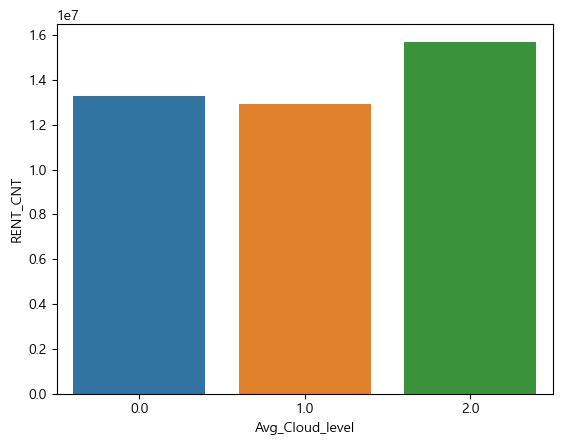

In [53]:
sns.barplot(data=cloud_rent,x='Avg_Cloud_level',y='RENT_CNT')

### 구름양에 따른 렌트 횟수

In [54]:
merged_df['avgTa'].unique()

array([ -2.2,   1. ,  -0.1,   1.2,   1.3,   3.1,   6.3,   2.4,  -1.2,
        -0.6,  -1. ,  -2.9,  -2.3,  -2.7,  -1.7,   0.3,   1.9,   0.7,
        -0.4,   3. ,   4.6,   2.8,   4.3,   5.5,   5.9,   6.8,   6. ,
         5.2,   3.9,   2.6,   1.5,  -1.6,  -8.3,  -6.4,  -0.5,   4. ,
         7.4,   6.5,   8.1,   9.8,  -1.4,  -5.9,  -4.1,   6.7,   2.5,
         7. ,   6.4,   6.1,   4.5,   7.7,   5.8,   3.4,   4.8,   2.2,
         1.4,   3.7,   9.3,  11.1,   3.8,   4.9,   3.6,   6.6,  10. ,
         9.1,   8.8,  12.8,  11. ,  10.6,  11.4,  12.5,  14.8,  11.9,
         8.7,  10.2,  11.3,   8.9,   7.2,   9.4,  10.7,   9.9,  12.4,
        13. ,  13.2,  16. ,  13.5,  12.3,   7.9,  13.1,  12.9,  13.9,
        14.9,  17.1,  20.2,  20.3,  21.8,  19.4,  20.7,  19.9,  14.2,
        14.4,  16.5,  14.3,  16.1,  19.3,  16.7,  19.1,  17.4,  18.5,
        20.1,  16.6,  16.2,  18.7,  22.6,  21.2,  19.7,  17.9,  22. ,
        21.9,  23. ,  24.6,  22.7,  25. ,  26.7,  25.8,  26.1,  24.7,
        26.9,  24. ,

In [55]:
merged_df['avgTa'] = merged_df['avgTa'].astype(float)

In [56]:
merged_df.loc[merged_df['avgTa'] <0, 'Avg_Temperature_level'] = 0
merged_df.loc[(merged_df['avgTa'] >=0)&(merged_df['avgTa'] <10), 'Avg_Temperature_level'] =1
merged_df.loc[(merged_df['avgTa'] >=10)&(merged_df['avgTa'] < 20), 'Avg_Temperature_level'] = 2
merged_df.loc[(merged_df['avgTa'] >=20)&(merged_df['avgTa'] < 30), 'Avg_Temperature_level'] = 3
merged_df.loc[(merged_df['avgTa'] >=30), 'Avg_Temperature_level'] = 4


In [57]:
merged_df

,STA_LOC,RENT_NM,STAT_DATA,RENT_CNT,RTN_CNT,stnNm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxInsWsHrmt,maxWs,maxWsWd,maxWsHrmt,avgWs,hr24SumRws,maxWd,avgTd,minRhm,minRhmHrmt,avgRhm,avgPv,avgPa,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,hr1MaxIcsrHrmt,hr1MaxIcsr,sumGsr,ddMefs,ddMefsHrmt,ddMes,ddMesHrmt,sumDpthFhsc,avgTca,avgLmac,avgTs,minTg,avgCm5Te,avgCm10Te,avgCm20Te,avgCm30Te,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur,Year,Month,Day,avg_rhm_hour,avg_rhm_minute,min_ps_hour,min_ps_minute,max_ws_hour,max_ws_minute,max_ta_hour,max_ta_minute,min_ta_hour,min_ta_minute,Season,Day_Of_Week,Avg_Cloud_level,Avg_Temperature_level
0,양천구,729. 서부식자재마트 건너편,2020-01-01,16,12,서울,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50.0,0906,2.6,50.0,0904,0.6,509,50.0,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,0.0,2020,1,1,0,2,14,18,9,4,14,57,9,4,4.0,2,2.0,0.0
1,양천구,731. 서울시 도로환경관리센터,2020-01-01,20,20,서울,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50.0,0906,2.6,50.0,0904,0.6,509,50.0,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,0.0,2020,1,1,0,2,14,18,9,4,14,57,9,4,4.0,2,2.0,0.0
2,양천구,732. 신월중학교,2020-01-01,9,2,서울,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50.0,0906,2.6,50.0,0904,0.6,509,50.0,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,0.0,2020,1,1,0,2,14,18,9,4,14,57,9,4,4.0,2,2.0,0.0
3,양천구,733. 신정이펜하우스314동,2020-01-01,6,4,서울,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50.0,0906,2.6,50.0,0904,0.6,509,50.0,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,0.0,2020,1,1,0,2,14,18,9,4,14,57,9,4,4.0,2,2.0,0.0
4,양천구,734. 신트리공원 입구,2020-01-01,13,16,서울,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50.0,0906,2.6,50.0,0904,0.6,509,50.0,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,0.0,2020,1,1,0,2,14,18,9,4,14,57,9,4,4.0,2,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093657,마포구,154. 마포구청역,2022-12-30,43,50,서울,-1.8,-4.4,2355,2.3,1354,,,,,2.58,0.0,7.5,270.0,1519,4.6,270.0,1523,1.9,1668,270.0,-7.7,36,1635,65.6,3.5,1020.8,1032.8,0923,1030.3,1442,1031.8,9.6,7.9,1200,1.9,10.84,0.0,,0.0,,,1.4,1.4,-2.2,-11.2,-0.4,-0.7,-0.5,0.6,2.9,6.6,10.4,16.1,18.0,1.3,1.8,0.0,-{눈}-0235. {박무}0735-{박무}{강도0}0900-0910.,0.0,2022,12,30,16,35,14,42,15,23,13,54,15,23,4.0,4,0.0,0.0
1093658,도봉구,1765.쌍문역 1번출구 주변,2022-12-30,19,24,서울,-1.8,-4.4,2355,2.3,1354,,,,,2.58,0.0,7.5,270.0,1519,4.6,270.0,1523,1.9,1668,270.0,-7.7,36,1635,65.6,3.5,1020.8,1032.8,0923,1030.3,1442,1031.8,9.6,7.9,1200,1.9,10.84,0.0,,0.0,,,1.4,1.4,-2.2,-11.2,-0.4,-0.7,-0.5,0.6,2.9,6.6,10.4,16.1,18.0,1.3,1.8,0.0,-{눈}-0235. {박무}0735-{박무}{강도0}0900-0910.,0.0,2022,12,30,16,35,14,42,15,23,13,54,15,23,4.0,4,0.0,0.0
1093659,도봉구,1767.방학초등학교 앞,2022-12-30,20,16,서울,-1.8,-4.4,2355,2.3,1354,,,,,2.58,0.0,7.5,270.0,1519,4.6,270.0,1523,1.9,1668,270.0,-7.7,36,1635,65.6,3.5,1020.8,1032.8,0923,1030.3,1442,1031.8,9.6,7.9,1200

In [58]:
avg_rent_cnt=merged_df.groupby('Avg_Temperature_level')['RENT_CNT'].sum().reset_index()

<Axes: xlabel='Avg_Temperature_level', ylabel='RENT_CNT'>

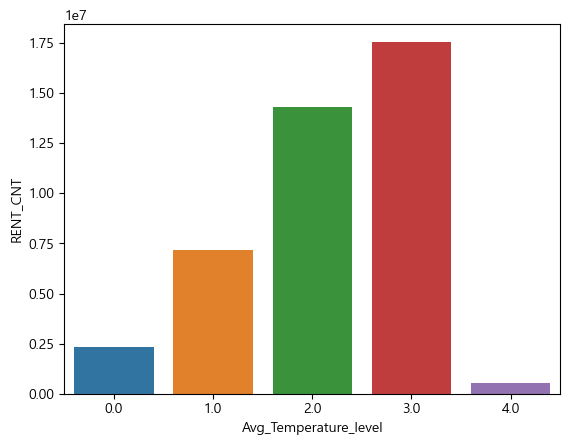

In [59]:
sns.barplot(data=avg_rent_cnt,x='Avg_Temperature_level',y='RENT_CNT')

### 평균 온도 렌트횟수
- 날씨가 좋은 10도에서 30도 사이에 이용횟수가 많음

### 년도별 공공자전거 이용횟수

In [60]:
year_count = merged_df.groupby('Year')['RENT_CNT'].sum().reset_index()

<Axes: xlabel='Year', ylabel='RENT_CNT'>

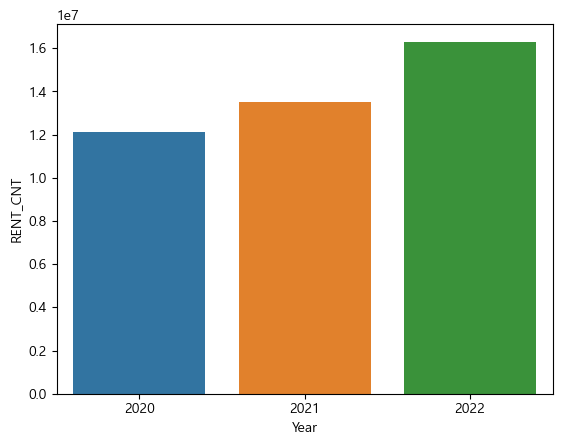

In [61]:
sns.barplot(data=year_count,x='Year',y='RENT_CNT')

### 년도별 이용 횟수
- 꾸준히 성장중

In [62]:
merged_df.columns

Index(['STA_LOC', 'RENT_NM', 'STAT_DATA', 'RENT_CNT', 'RTN_CNT', 'stnNm',
       'avgTa', 'minTa', 'minTaHrmt', 'maxTa', 'maxTaHrmt', 'mi10MaxRn',
       'mi10MaxRnHrmt', 'hr1MaxRn', 'hr1MaxRnHrmt', 'sumRnDur', 'sumRn',
       'maxInsWs', 'maxInsWsWd', 'maxInsWsHrmt', 'maxWs', 'maxWsWd',
       'maxWsHrmt', 'avgWs', 'hr24SumRws', 'maxWd', 'avgTd', 'minRhm',
       'minRhmHrmt', 'avgRhm', 'avgPv', 'avgPa', 'maxPs', 'maxPsHrmt', 'minPs',
       'minPsHrmt', 'avgPs', 'ssDur', 'sumSsHr', 'hr1MaxIcsrHrmt',
       'hr1MaxIcsr', 'sumGsr', 'ddMefs', 'ddMefsHrmt', 'ddMes', 'ddMesHrmt',
       'sumDpthFhsc', 'avgTca', 'avgLmac', 'avgTs', 'minTg', 'avgCm5Te',
       'avgCm10Te', 'avgCm20Te', 'avgCm30Te', 'avgM05Te', 'avgM10Te',
       'avgM15Te', 'avgM30Te', 'avgM50Te', 'sumLrgEv', 'sumSmlEv', 'n99Rn',
       'iscs', 'sumFogDur', 'Year', 'Month', 'Day', 'avg_rhm_hour',
       'avg_rhm_minute', 'min_ps_hour', 'min_ps_minute', 'max_ws_hour',
       'max_ws_minute', 'max_ta_hour', 'max_ta_minute', '

In [63]:
cloud_temperature = merged_df.groupby(['Avg_Temperature_level','Avg_Cloud_level'])['RENT_CNT'].sum().reset_index()

<Axes: xlabel='Avg_Temperature_level', ylabel='RENT_CNT'>

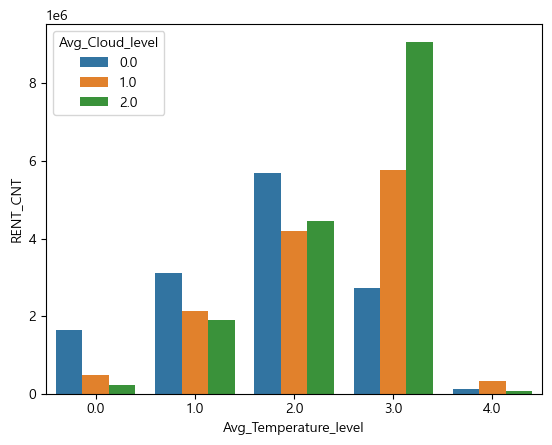

In [64]:
sns.barplot(data=cloud_temperature,x='Avg_Temperature_level',y='RENT_CNT',hue='Avg_Cloud_level')

### 날씨와 구름양별 렌트 횟수
- 0도에서 20도 사이까지는 맑은 구름이 적은 날씨에 이용자가 많고 날씨가 더운 날에는 구름이 많을때에 렌트횟수가 많음

In [65]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093662 entries, 0 to 1093661
Data columns (total 82 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   STA_LOC                1093662 non-null  object        
 1   RENT_NM                1093662 non-null  object        
 2   STAT_DATA              1093662 non-null  datetime64[ns]
 3   RENT_CNT               1093662 non-null  int32         
 4   RTN_CNT                1093662 non-null  int32         
 5   stnNm                  1093662 non-null  object        
 6   avgTa                  1093662 non-null  float64       
 7   minTa                  1093662 non-null  object        
 8   minTaHrmt              1093662 non-null  object        
 9   maxTa                  1093662 non-null  float64       
 10  maxTaHrmt              1093662 non-null  object        
 11  mi10MaxRn              1093662 non-null  object        
 12  mi10MaxRnHrmt          10936

In [66]:
columns_to_convert = ['avgTa',
       'minTa',  'maxTa','sumRnDur', 'sumRn',
       'maxInsWs', 'maxInsWsWd', 'maxWs', 'maxWsWd',
       'avgWs', 'maxWd', 'avgTd',
       'avgRhm', 'avgPv', 'avgPa', 'maxPs',  'minPs',
       'avgPs', 'ssDur', 'sumSsHr', 
       'hr1MaxIcsr', 'sumGsr', 'avgTca', 'avgLmac', 'avgTs', 'minTg', 'avgCm5Te',
       'avgCm10Te', 'avgCm20Te', 'avgCm30Te', 'avgM05Te', 'avgM10Te',
       'avgM15Te', 'avgM30Te', 'avgM50Te', 'sumLrgEv', 'sumSmlEv', 'n99Rn']


In [67]:
import numpy as np

# 빈 문자열을 NaN으로 대체
merged_df[columns_to_convert] = merged_df[columns_to_convert].replace('', np.nan)

# NaN을 제외한 값들을 float으로 변환
merged_df[columns_to_convert] = merged_df[columns_to_convert].astype(float)


In [68]:
merged_df['avgWs'].unique()

array([0.6, 1.2, 1.7, 1.9, 1.1, 3.1, 4. , 3.3, 2.3, 1.5, 2.4, 1.6, 1.8,
       2.2, 2.5, 1.4, 2. , 2.7, 4.6, 2.6, 2.1, 2.8, 3. , 3.4, 4.2, 3.7,
       3.6, 4.8, 3.2, 3.5, 3.8, 4.4, 3.9, 2.9, 1.3, 4.1, 5. , 4.3, 5.8])

<Axes: ylabel='avgWs'>

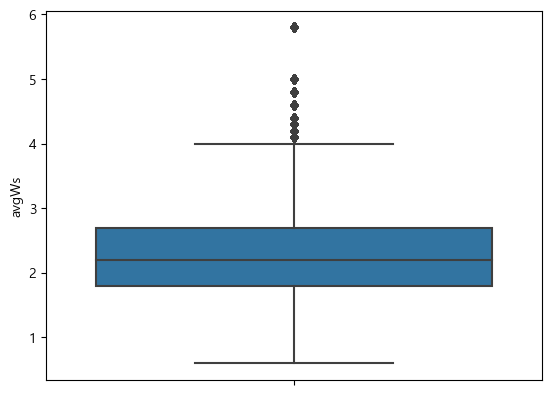

In [69]:
sns.boxplot(merged_df,y='avgWs')

In [70]:
quantiles = np.percentile(merged_df['avgWs'], [0, 25, 50, 75,100])
IQR = quantiles[3]-quantiles[1]
accptable = quantiles[3]+1.5*IQR
print(quantiles)

[0.6 1.8 2.2 2.7 5.8]


In [71]:
def categorize_wind_speed(value):
    if value <= quantiles[0]:
        return 0
    elif value <= quantiles[1]:
        return 1
    elif value <= quantiles[2]:
        return 2
    elif value <= quantiles[3]:
        return 3
    elif value <= accptable:
        return 4
    else:
        return 5

In [72]:
merged_df['Avg_Wind_Level'] = merged_df['avgWs'].apply(categorize_wind_speed)

In [73]:
merged_df.loc[merged_df['Avg_Wind_Level']=='강함']

,STA_LOC,RENT_NM,STAT_DATA,RENT_CNT,RTN_CNT,stnNm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxInsWsHrmt,maxWs,maxWsWd,maxWsHrmt,avgWs,hr24SumRws,maxWd,avgTd,minRhm,minRhmHrmt,avgRhm,avgPv,avgPa,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,hr1MaxIcsrHrmt,hr1MaxIcsr,sumGsr,ddMefs,ddMefsHrmt,ddMes,ddMesHrmt,sumDpthFhsc,avgTca,avgLmac,avgTs,minTg,avgCm5Te,avgCm10Te,avgCm20Te,avgCm30Te,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur,Year,Month,Day,avg_rhm_hour,avg_rhm_minute,min_ps_hour,min_ps_minute,max_ws_hour,max_ws_minute,max_ta_hour,max_ta_minute,min_ta_hour,min_ta_minute,Season,Day_Of_Week,Avg_Cloud_level,Avg_Temperature_level,Avg_Wind_Level


<Axes: ylabel='avgRhm'>

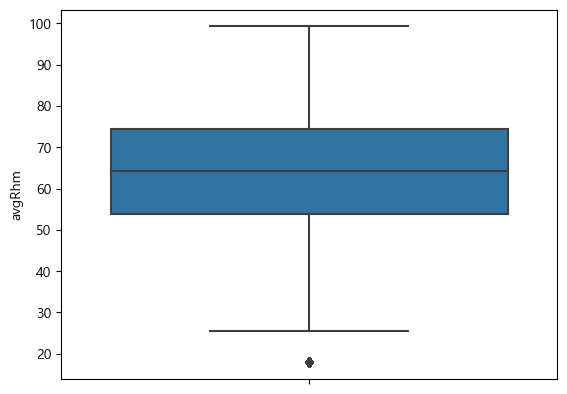

In [74]:
sns.boxplot(merged_df,y='avgRhm')

In [75]:
humid_quantiles = np.percentile(merged_df['avgRhm'], [0, 25, 50, 75,100])

In [76]:
humid_IQR = humid_quantiles[3]-humid_quantiles[1]
humid_accptable = humid_quantiles[3]-1.5*humid_IQR
print(humid_quantiles)

[17.9 53.8 64.3 74.5 99.3]


In [77]:
def categorize_humid(value):
    if value < humid_quantiles[1]:
        return 0
    elif value <= humid_quantiles[3]:
        return 1
    elif value <= humid_quantiles[4]:
        return 2

In [78]:
merged_df['Avg_Humid_Level'] = merged_df['avgRhm'].apply(categorize_humid)

In [79]:
merged_df.loc[merged_df['Avg_Humid_Level']==0]

,STA_LOC,RENT_NM,STAT_DATA,RENT_CNT,RTN_CNT,stnNm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxInsWsHrmt,maxWs,maxWsWd,maxWsHrmt,avgWs,hr24SumRws,maxWd,avgTd,minRhm,minRhmHrmt,avgRhm,avgPv,avgPa,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,hr1MaxIcsrHrmt,hr1MaxIcsr,sumGsr,ddMefs,ddMefsHrmt,ddMes,ddMesHrmt,sumDpthFhsc,avgTca,avgLmac,avgTs,minTg,avgCm5Te,avgCm10Te,avgCm20Te,avgCm30Te,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur,Year,Month,Day,avg_rhm_hour,avg_rhm_minute,min_ps_hour,min_ps_minute,max_ws_hour,max_ws_minute,max_ta_hour,max_ta_minute,min_ta_hour,min_ta_minute,Season,Day_Of_Week,Avg_Cloud_level,Avg_Temperature_level,Avg_Wind_Level,Avg_Humid_Level
2997,양천구,729. 서부식자재마트 건너편,2020-01-04,22,20,서울,1.2,-2.8,0512,6.1,1450,,,,,0.0,0.0,8.5,340.0,1206,4.5,320.0,1228,1.9,1623,50.0,-8.2,32,1457,50.8,3.3,1015.4,1028.4,2339,1024.4,1410,1026.2,9.7,7.9,1200,1.68,9.29,0.0,,0.0,,,2.1,2.1,0.0,-8.8,0.4,1.1,1.9,2.7,3.6,6.7,9.5,15.1,16.9,1.5,2.1,NaN,-{연무}-{연무}{강도0}0300-{연무}{강도0}0600-{연무}{강도0}090...,0.0,2020,1,4,14,57,14,10,12,28,14,50,12,28,4.0,5,0.0,1.0,2,0
2998,양천구,731. 서울시 도로환경관리센터,2020-01-04,25,29,서울,1.2,-2.8,0512,6.1,1450,,,,,0.0,0.0,8.5,340.0,1206,4.5,320.0,1228,1.9,1623,50.0,-8.2,32,1457,50.8,3.3,1015.4,1028.4,2339,1024.4,1410,1026.2,9.7,7.9,1200,1.68,9.29,0.0,,0.0,,,2.1,2.1,0.0,-8.8,0.4,1.1,1.9,2.7,3.6,6.7,9.5,15.1,16.9,1.5,2.1,NaN,-{연무}-{연무}{강도0}0300-{연무}{강도0}0600-{연무}{강도0}090...,0.0,2020,1,4,14,57,14,10,12,28,14,50,12,28,4.0,5,0.0,1.0,2,0
2999,양천구,732. 신월중학교,2020-01-04,5,6,서울,1.2,-2.8,0512,6.1,1450,,,,,0.0,0.0,8.5,340.0,1206,4.5,320.0,1228,1.9,1623,50.0,-8.2,32,1457,50.8,3.3,1015.4,1028.4,2339,1024.4,1410,1026.2,9.7,7.9,1200,1.68,9.29,0.0,,0.0,,,2.1,2.1,0.0,-8.8,0.4,1.1,1.9,2.7,3.6,6.7,9.5,15.1,16.9,1.5,2.1,NaN,-{연무}-{연무}{강도0}0300-{연무}{강도0}0600-{연무}{강도0}090...,0.0,2020,1,4,14,57,14,10,12,28,14,50,12,28,4.0,5,0.0,1.0,2,0
3000,양천구,733. 신정이펜하우스314동,2020-01-04,5,4,서울,1.2,-2.8,0512,6.1,1450,,,,,0.0,0.0,8.5,340.0,1206,4.5,320.0,1228,1.9,1623,50.0,-8.2,32,1457,50.8,3.3,1015.4,1028.4,2339,1024.4,1410,1026.2,9.7,7.9,1200,1.68,9.29,0.0,,0.0,,,2.1,2.1,0.0,-8.8,0.4,1.1,1.9,2.7,3.6,6.7,9.5,15.1,16.9,1.5,2.1,NaN,-{연무}-{연무}{강도0}0300-{연무}{강도0}0600-{연무}{강도0}090...,0.0,2020,1,4,14,57,14,10,12,28,14,50,12,28,4.0,5,0.0,1.0,2,0
3001,양천구,734. 신트리공원 입구,2020-01-04,22,23,서울,1.2,-2.8,0512,6.1,1450,,,,,0.0,0.0,8.5,340.0,1206,4.5,320.0,1228,1.9,1623,50.0,-8.2,32,1457,50.8,3.3,1015.4,1028.4,2339,1024.4,1410,1026.2,9.7,7.9,1200,1.68,9.29,0.0,,0.0,,,2.1,2.1,0.0,-8.8,0.4,1.1,1.9,2.7,3.6,6.7,9.5,15.1,16.9,1.5,2.1,NaN,-{연무}-{연무}{강도0}0300-{연무}{강도0}0600-{연무}{강도0}090...,0.0,2020,1,4,14,57,14,10,12,28,14,50,12,28,4.0,5,0.0,1.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081669,마포구,490.가온문화공원,2022-12-18,6,11,서울,-9.5,-12.4,0740,-5.6,1440,,,,,0.0,0.0,10.4,270.0,1226,5.8,270.0,1233,2.6,2231,290.0,-18.8,38,0545,47.1,1.4,1012.2,1024.8,2259,1021.8,1500,1023.5,9.6,9.0,1200,1.98,11.42,0.0,,1.5,0001,,0.0,0.0,-5.1,-17.0,-0.3,-0.2,0.8,2.3,4.5,8.7,12.5,17.3,18.4,1.0,1.4,NaN,,0.0,2022,12,18,5,45,15,00,12,33,14,40,12,33,4.0,6,0.0,0.0,3,0
1081670,마포구,491.월드컵파크 4단지,2022-12-18,1,1,서울,-9.5,-12.4,0740,-5.6,1440,,,,,0.0,0.0,10.4,270.0,1226,5.8,270.0,1233,2.6,2231,290.0,-18.8,38,0545,47.1,1.4,1012.2,1024.8,2259,1021.8,1500,1023.5,9.6,9.0,1200,1.98,11.42,0.0,,1.5,0001,,0.0,0.0,-5.1,-17.0,-0.3,-0.2,0.8,2.3,4.5,8.7,12.5,17.3,18.4,1.0,1.4,NaN,,0.0,2022,12,18,5,45,15,00,12,33,14,40,12,33,4.0,6,0.0,0.0,3,0
1081671,마포구,492.성산시영아파트 후문,2022-12-18,28,31,서울,-9.5,-12.4,0740,-5.6,1440,,,,,0.0,0.0,10.4,270.0,1226,5.8,270.0,1233,2.6,2231,290.0,-18.8,38,0545,47.1,1.4,1012.2,1024.8,2259,10

In [80]:
temperature_wind = merged_df.groupby(['Avg_Temperature_level','Avg_Wind_Level'])['RENT_CNT'].sum().reset_index()

<Axes: xlabel='Avg_Temperature_level', ylabel='RENT_CNT'>

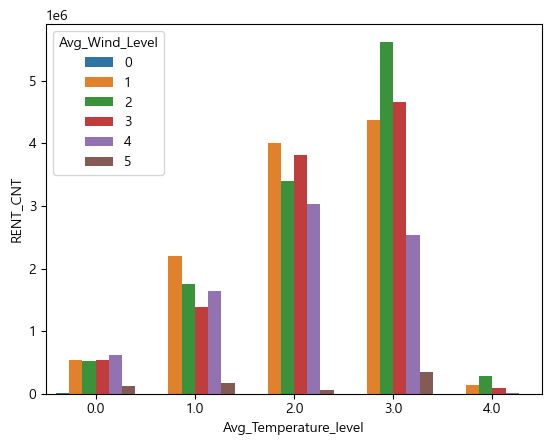

In [81]:
sns.barplot(data=temperature_wind,x='Avg_Temperature_level',y='RENT_CNT',hue='Avg_Wind_Level')

In [82]:
temperature_humid = merged_df.groupby(['Avg_Temperature_level','Avg_Humid_Level'])['RENT_CNT'].sum().reset_index()

<Axes: xlabel='Avg_Temperature_level', ylabel='RENT_CNT'>

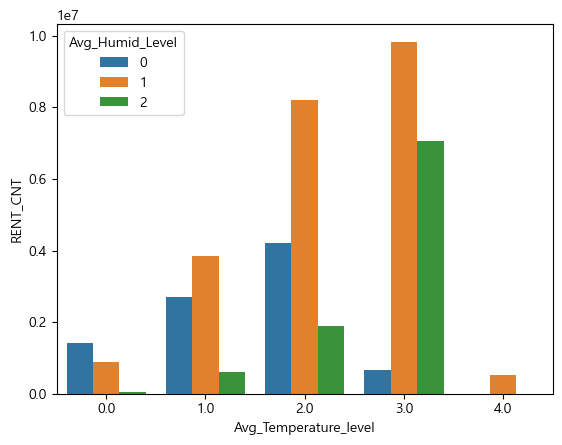

In [83]:
sns.barplot(data=temperature_humid,x='Avg_Temperature_level',y='RENT_CNT',hue='Avg_Humid_Level')

In [84]:
merged_df.columns

Index(['STA_LOC', 'RENT_NM', 'STAT_DATA', 'RENT_CNT', 'RTN_CNT', 'stnNm',
       'avgTa', 'minTa', 'minTaHrmt', 'maxTa', 'maxTaHrmt', 'mi10MaxRn',
       'mi10MaxRnHrmt', 'hr1MaxRn', 'hr1MaxRnHrmt', 'sumRnDur', 'sumRn',
       'maxInsWs', 'maxInsWsWd', 'maxInsWsHrmt', 'maxWs', 'maxWsWd',
       'maxWsHrmt', 'avgWs', 'hr24SumRws', 'maxWd', 'avgTd', 'minRhm',
       'minRhmHrmt', 'avgRhm', 'avgPv', 'avgPa', 'maxPs', 'maxPsHrmt', 'minPs',
       'minPsHrmt', 'avgPs', 'ssDur', 'sumSsHr', 'hr1MaxIcsrHrmt',
       'hr1MaxIcsr', 'sumGsr', 'ddMefs', 'ddMefsHrmt', 'ddMes', 'ddMesHrmt',
       'sumDpthFhsc', 'avgTca', 'avgLmac', 'avgTs', 'minTg', 'avgCm5Te',
       'avgCm10Te', 'avgCm20Te', 'avgCm30Te', 'avgM05Te', 'avgM10Te',
       'avgM15Te', 'avgM30Te', 'avgM50Te', 'sumLrgEv', 'sumSmlEv', 'n99Rn',
       'iscs', 'sumFogDur', 'Year', 'Month', 'Day', 'avg_rhm_hour',
       'avg_rhm_minute', 'min_ps_hour', 'min_ps_minute', 'max_ws_hour',
       'max_ws_minute', 'max_ta_hour', 'max_ta_minute', '

In [85]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093662 entries, 0 to 1093661
Data columns (total 84 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   STA_LOC                1093662 non-null  object        
 1   RENT_NM                1093662 non-null  object        
 2   STAT_DATA              1093662 non-null  datetime64[ns]
 3   RENT_CNT               1093662 non-null  int32         
 4   RTN_CNT                1093662 non-null  int32         
 5   stnNm                  1093662 non-null  object        
 6   avgTa                  1093662 non-null  float64       
 7   minTa                  1092663 non-null  float64       
 8   minTaHrmt              1093662 non-null  object        
 9   maxTa                  1093662 non-null  float64       
 10  maxTaHrmt              1093662 non-null  object        
 11  mi10MaxRn              1093662 non-null  object        
 12  mi10MaxRnHrmt          10936

In [86]:
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64','int32']).columns.tolist()
numeric_df = merged_df[numeric_columns]

In [87]:
merged_df_num_corr=numeric_df.corr()

<Axes: >

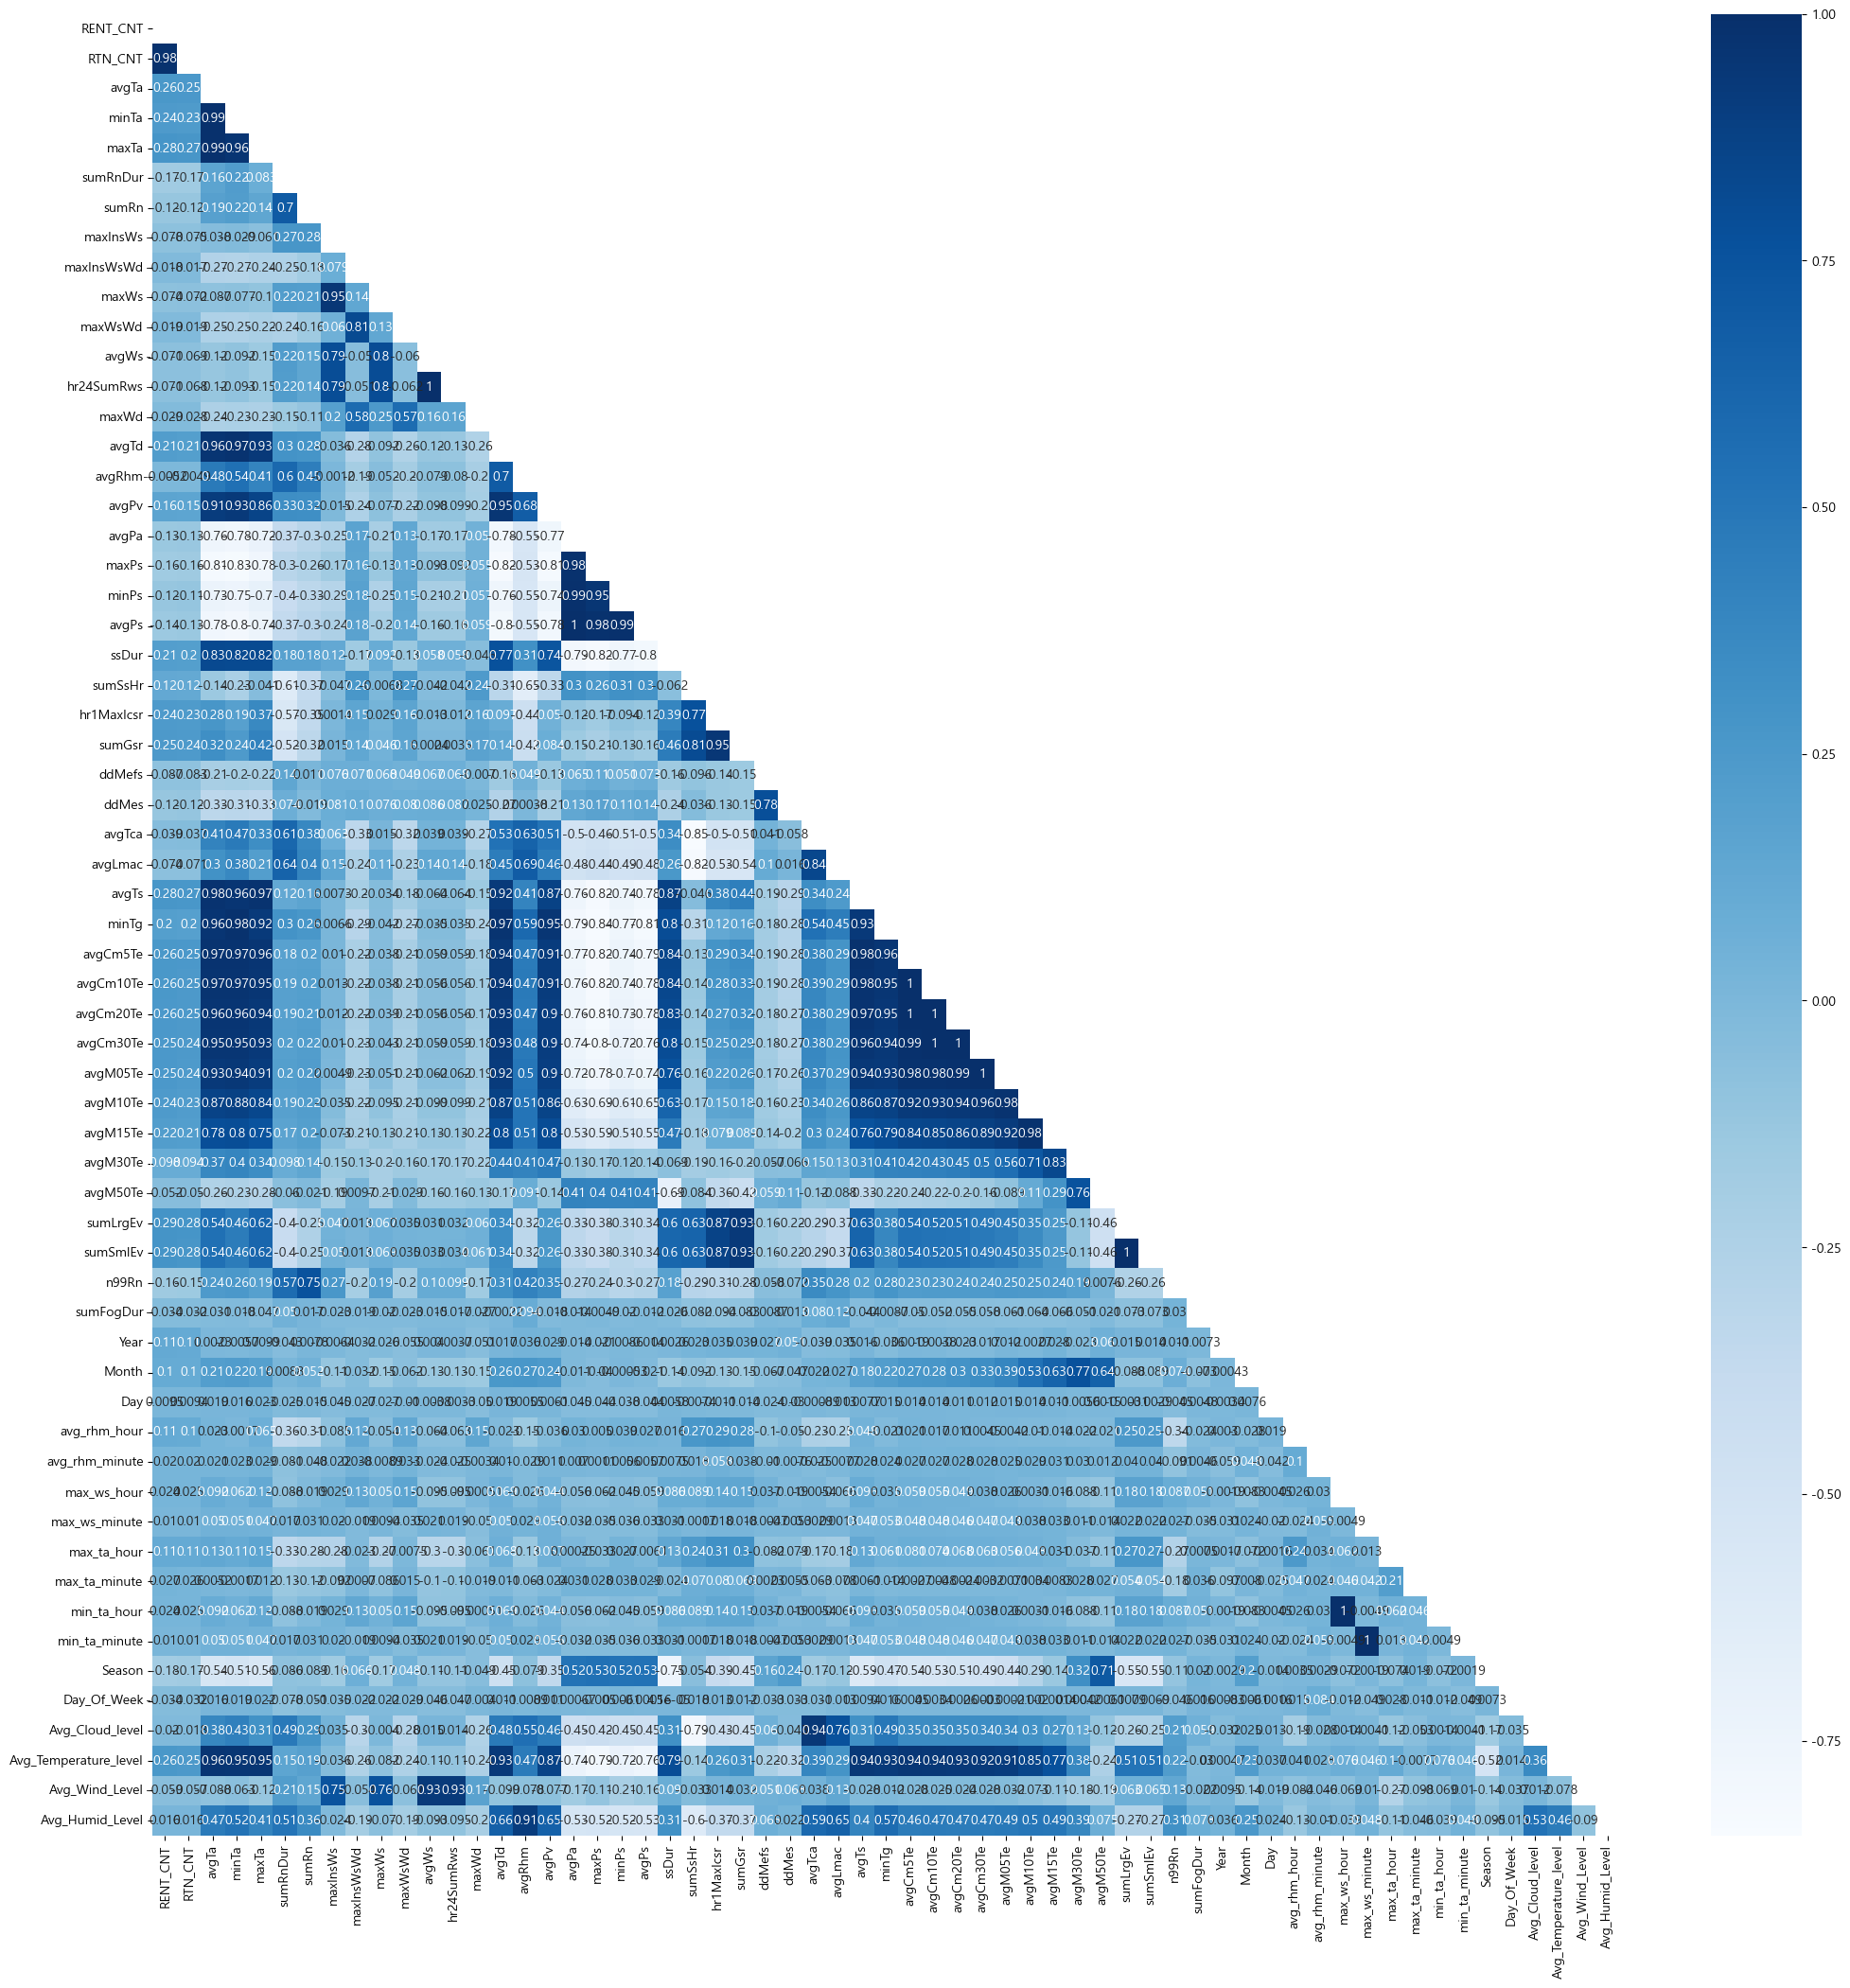

In [88]:
plt.figure(figsize=(25,25))
mask = np.triu(np.ones_like(merged_df_num_corr, dtype=np.bool_))
sns.heatmap(merged_df_num_corr, annot=True, cmap='Blues', mask=mask)


### 각 컬럼별 상관계수

In [89]:
spring_use = merged_df[merged_df['Season'] == 1]

In [90]:
sorted_spring_use = spring_use.sort_values(by='RENT_CNT', ascending=False)

In [91]:
spring_result = sorted_spring_use.loc[:, ['STA_LOC','RENT_NM','STAT_DATA','RENT_CNT','RTN_CNT',	'avgTa','minTa','minTaHrmt','maxTa','maxTaHrmt','mi10MaxRn','mi10MaxRnHrmt','hr1MaxRn','hr1MaxRnHrmt','sumRnDur','sumRn','maxInsWs','maxInsWsWd','maxInsWsHrmt','maxWs','maxWsWd',	'maxWsHrmt','avgWs','hr24SumRws','maxWd','avgTd','minRhm','minRhmHrmt','avgRhm','avgPv','avgPa',	'maxPs','maxPsHrmt','minPs','minPsHrmt','avgPs','ssDur','sumSsHr','hr1MaxIcsrHrmt','hr1MaxIcsr',	'sumGsr','ddMefs','ddMefsHrmt','ddMes','ddMesHrmt','sumDpthFhsc','avgTca','avgLmac','avgTs','minTg','avgCm5Te','avgCm10Te','avgCm20Te','avgCm30Te','avgM05Te','avgM10Te','avgM15Te','avgM30Te',	'avgM50Te','sumLrgEv','sumSmlEv','n99Rn','iscs','sumFogDur','Year','Month','Day','Season'	,'Avg_Cloud_level','Avg_Temperature_level','Day_Of_Week']]

In [92]:
spring_day_rent=spring_result.groupby(['RENT_NM','Day_Of_Week'])['RENT_CNT'].sum().reset_index()

In [93]:
spring_top_50_rent_loc = spring_day_rent.sort_values(by='RENT_CNT', ascending=False).head(50)

<Axes: xlabel='RENT_NM', ylabel='RENT_CNT'>

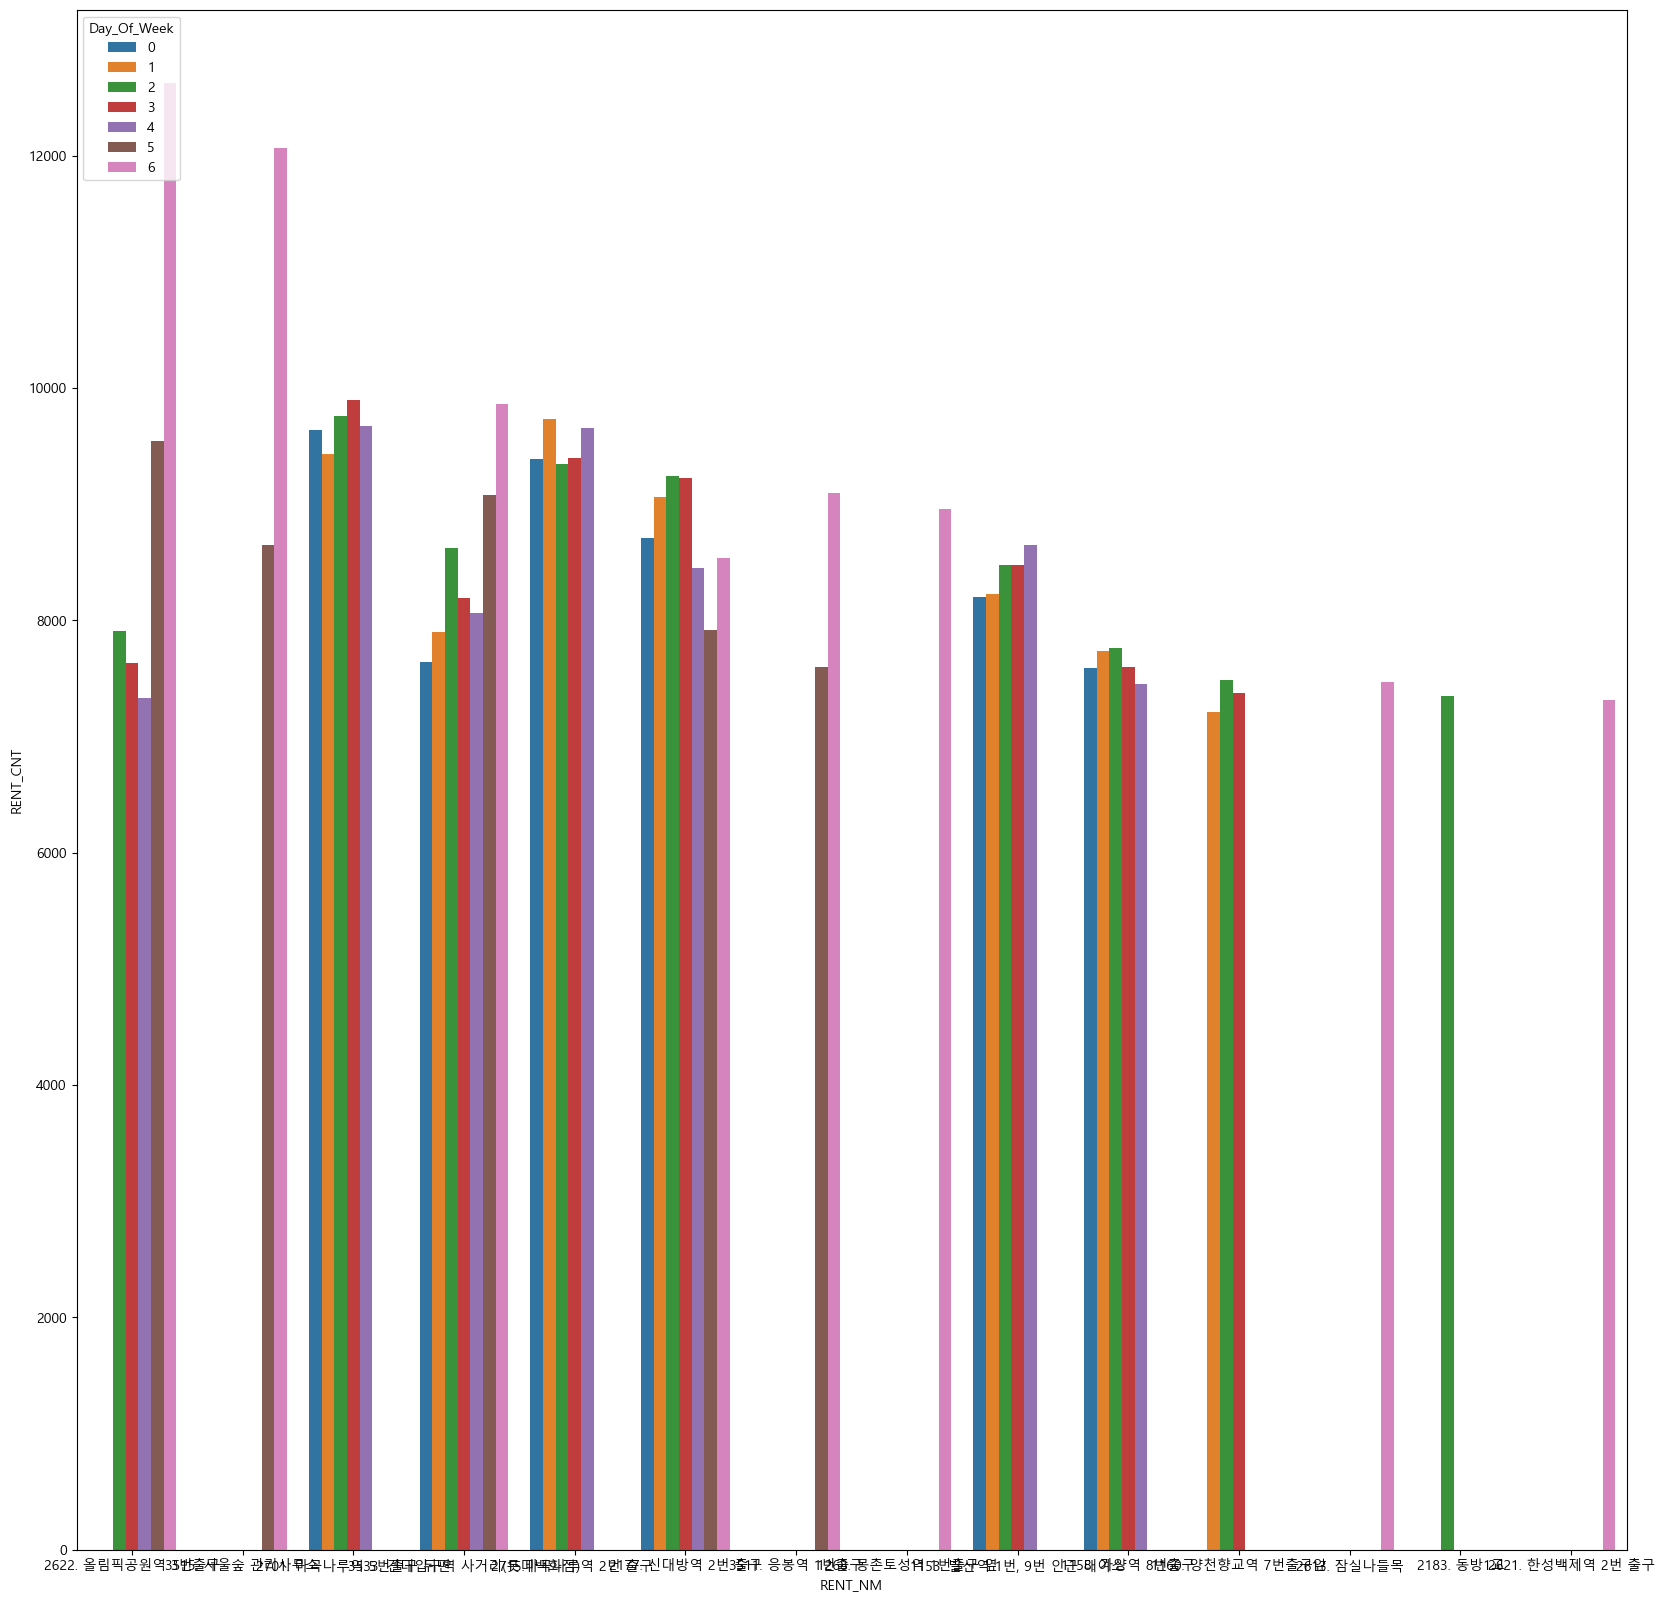

In [94]:
plt.figure(figsize=(20,20))
sns.barplot(data=spring_top_50_rent_loc,x='RENT_NM',y='RENT_CNT',hue='Day_Of_Week')

### 봄 top 최다 렌트 횟수
- 올림픽공원 3번출구 봄에 많음

In [95]:
spring_do_rent=spring_result.groupby(['STA_LOC','Day_Of_Week'])['RENT_CNT'].sum().reset_index()

<Axes: xlabel='STA_LOC', ylabel='RENT_CNT'>

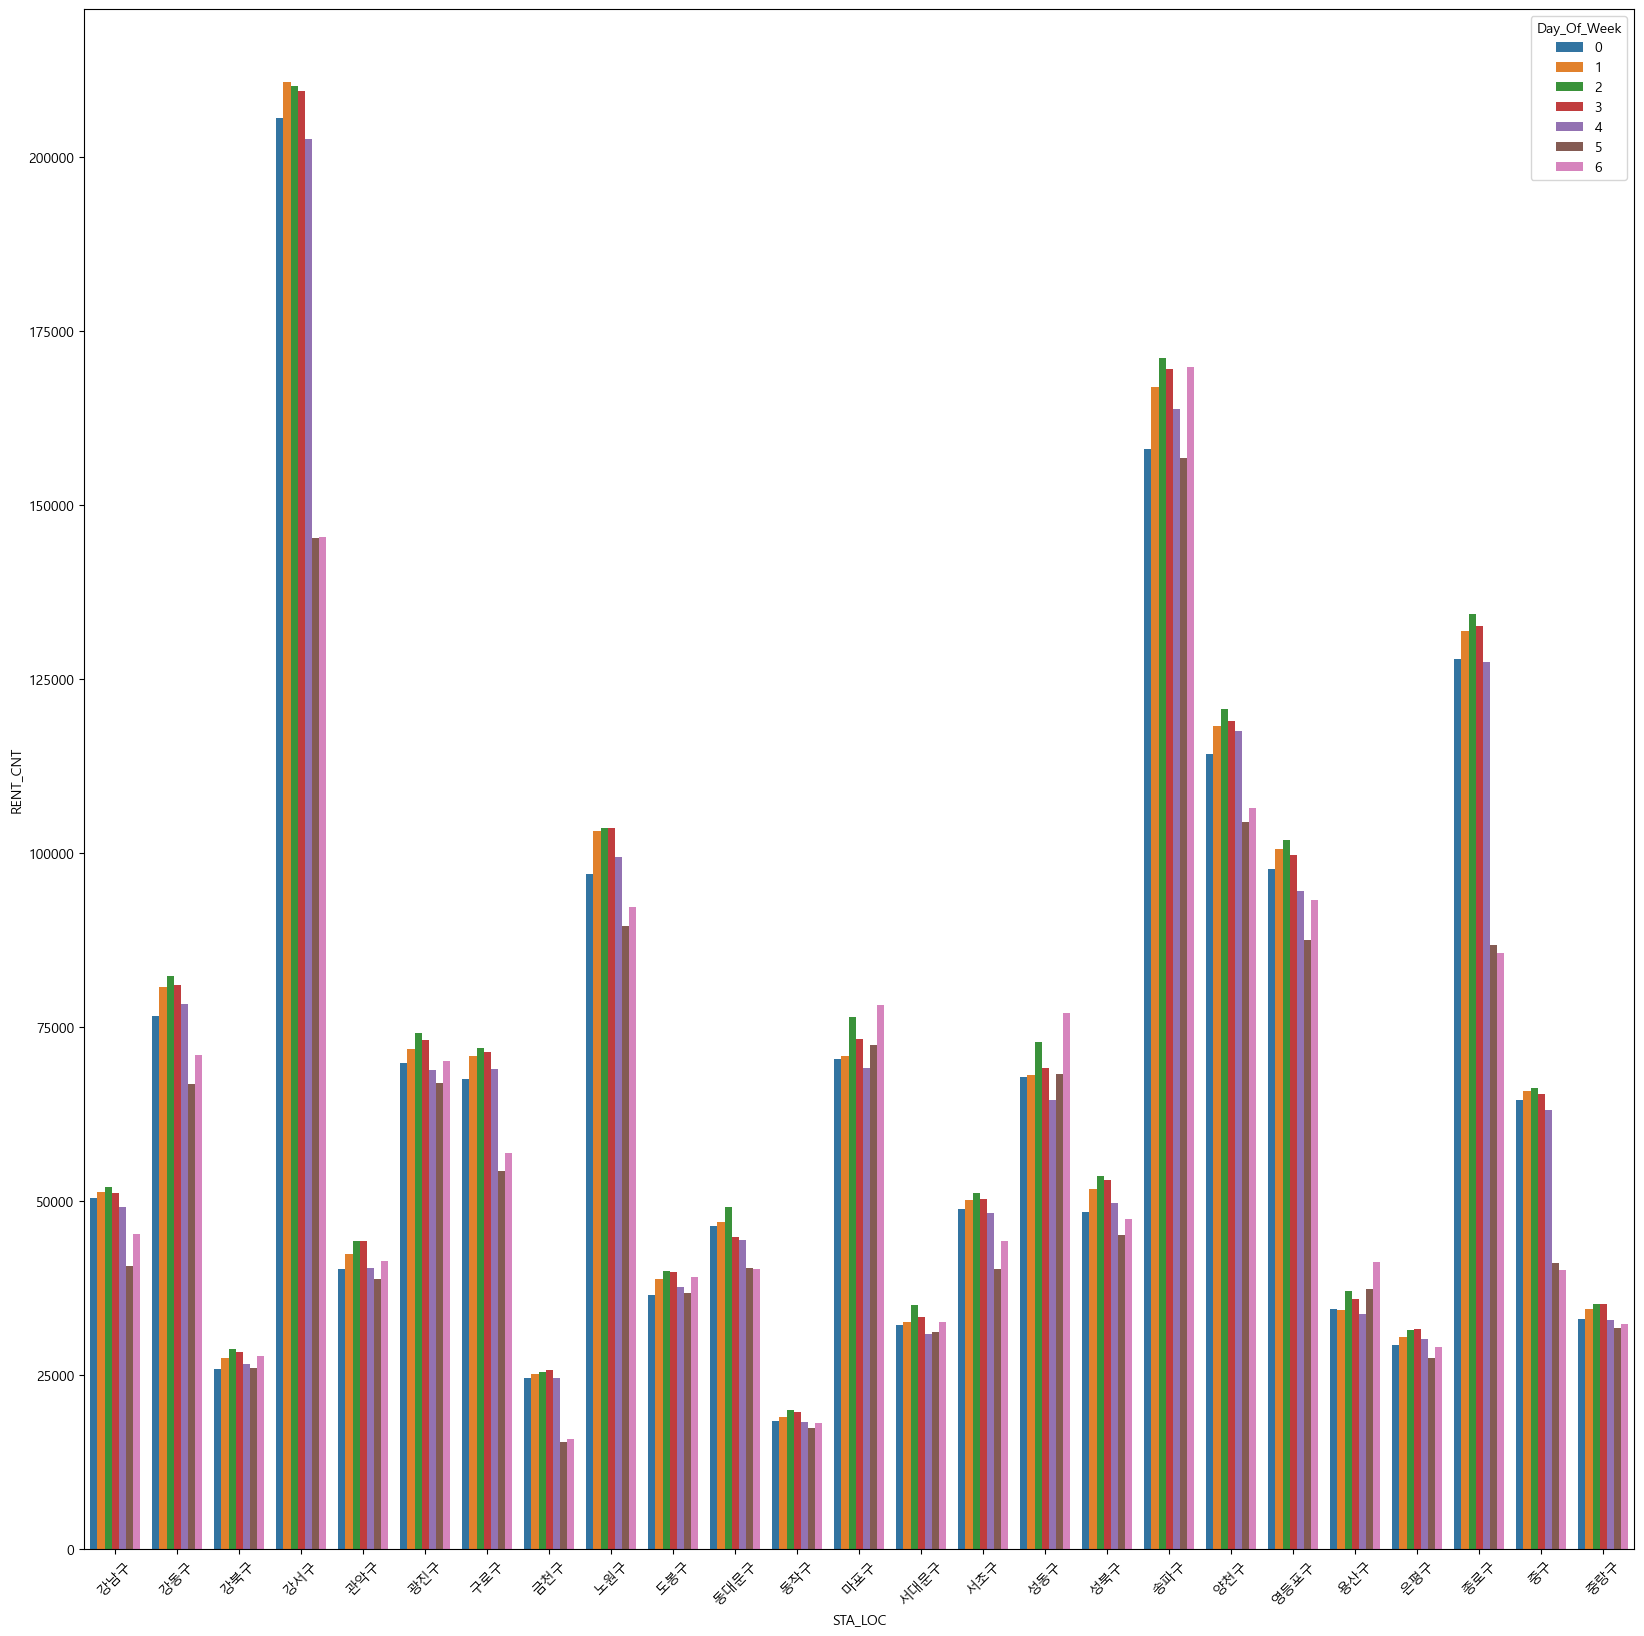

In [96]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=45)
sns.barplot(data=spring_do_rent,x='STA_LOC',y='RENT_CNT',hue='Day_Of_Week')

In [97]:
spring_do_rent_avg=spring_result.groupby(['STA_LOC','Month'])['RENT_CNT'].mean().reset_index()

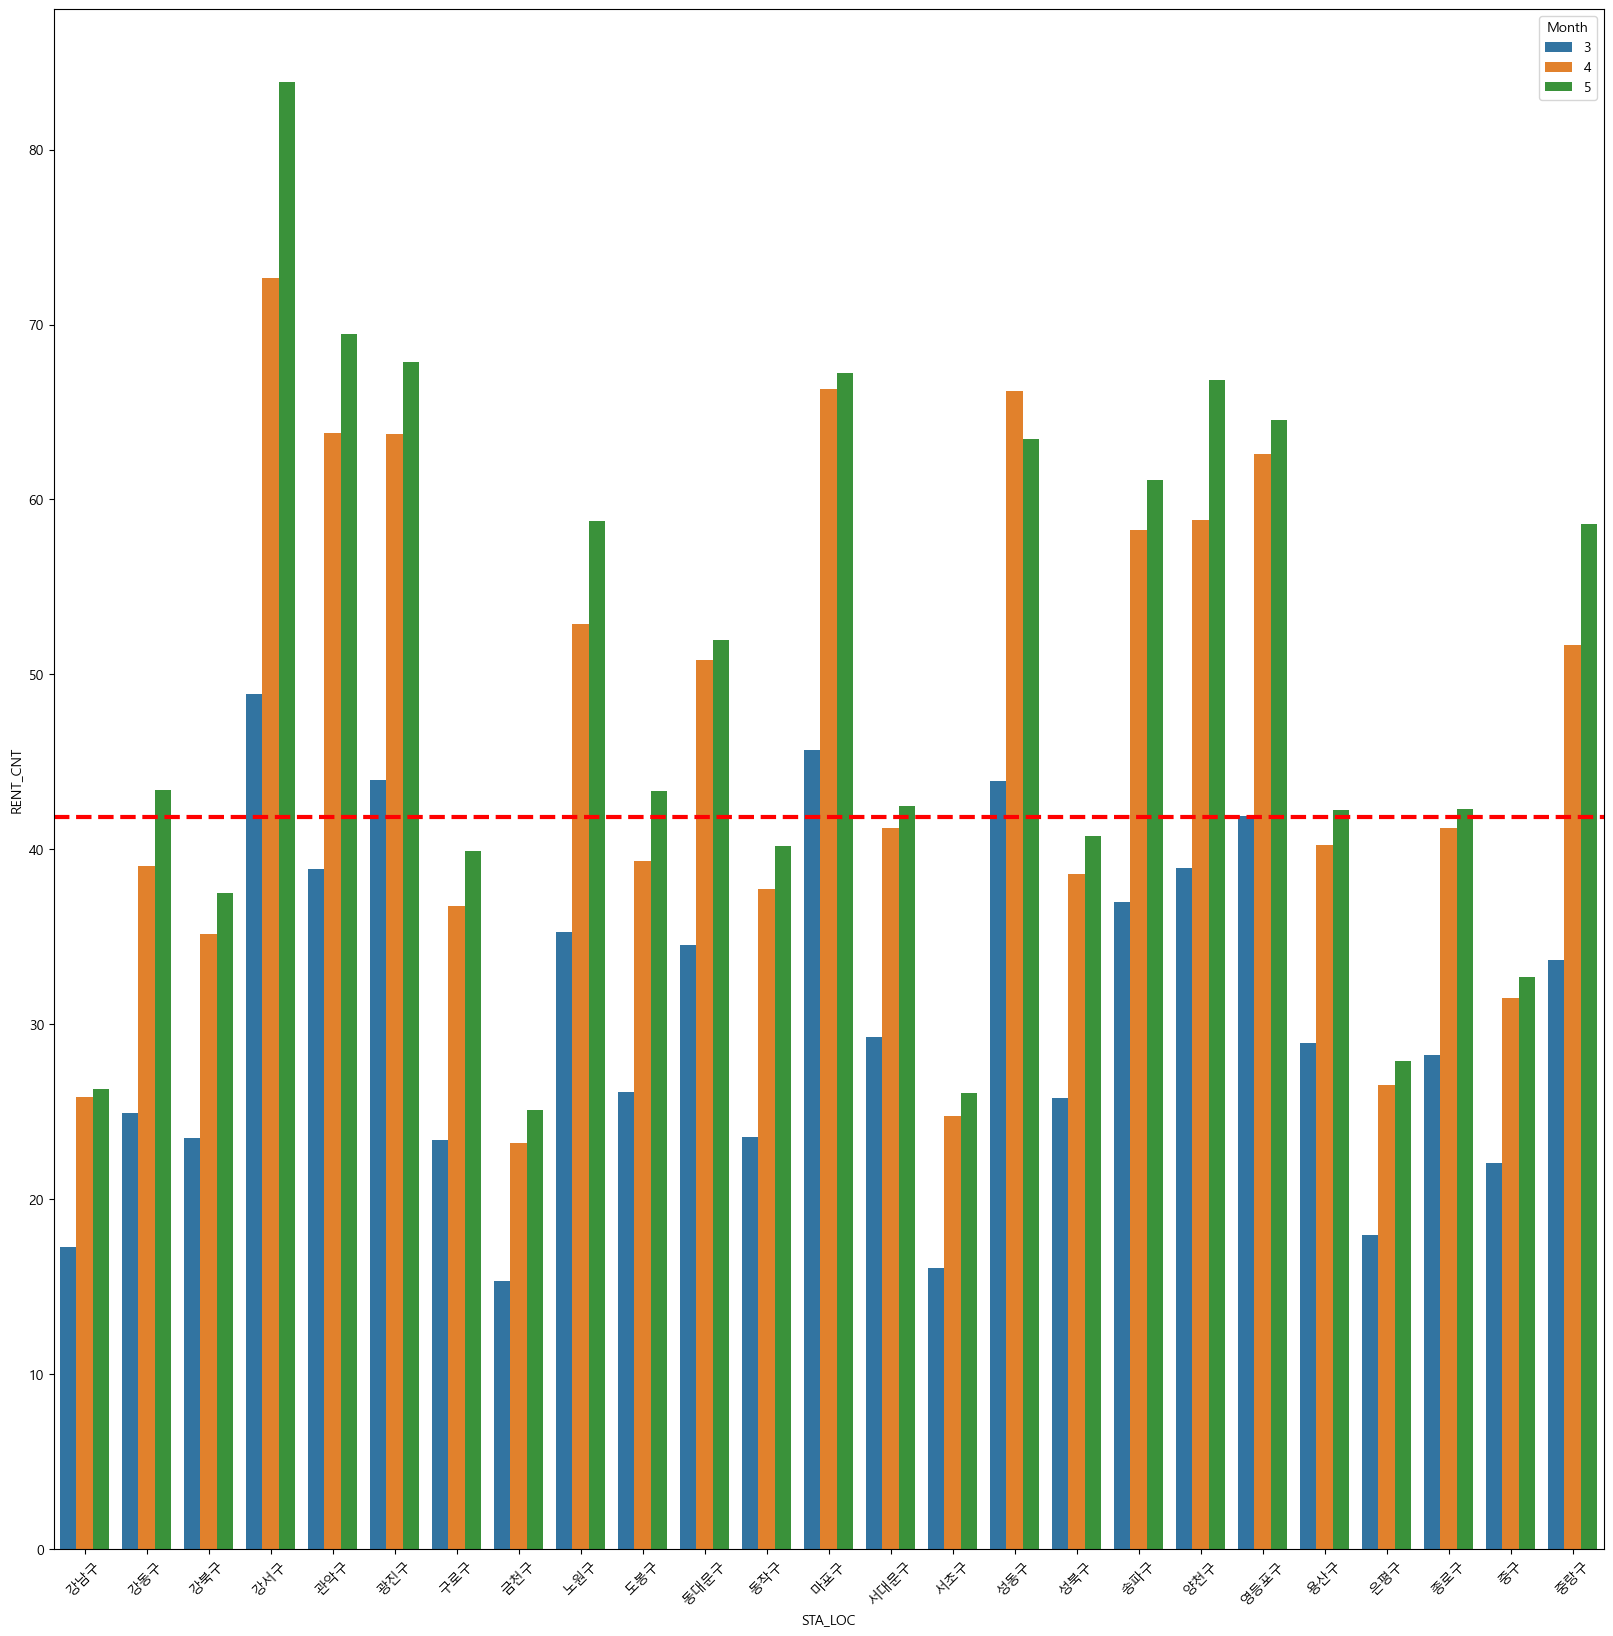

In [98]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=45)
sns.barplot(data=spring_do_rent_avg,x='STA_LOC',y='RENT_CNT',hue='Month')
plt.axhline(spring_do_rent_avg['RENT_CNT'].mean(), color='red', linestyle='--', linewidth='3')

### 구별 봄 렌트 횟수
- 많은 구가 수요일에 렌트 횟수가 많음

In [99]:
summer_use = merged_df[merged_df['Season'] == 2]

In [100]:
sorted_summer_use = summer_use.sort_values(by='RENT_CNT', ascending=False)

In [101]:
summer_result = sorted_summer_use.loc[:, ['STA_LOC','RENT_NM','STAT_DATA','RENT_CNT','RTN_CNT',	'avgTa','minTa','minTaHrmt','maxTa','maxTaHrmt','mi10MaxRn','mi10MaxRnHrmt','hr1MaxRn','hr1MaxRnHrmt','sumRnDur','sumRn','maxInsWs','maxInsWsWd','maxInsWsHrmt','maxWs','maxWsWd',	'maxWsHrmt','avgWs','hr24SumRws','maxWd','avgTd','minRhm','minRhmHrmt','avgRhm','avgPv','avgPa',	'maxPs','maxPsHrmt','minPs','minPsHrmt','avgPs','ssDur','sumSsHr','hr1MaxIcsrHrmt','hr1MaxIcsr',	'sumGsr','ddMefs','ddMefsHrmt','ddMes','ddMesHrmt','sumDpthFhsc','avgTca','avgLmac','avgTs','minTg','avgCm5Te','avgCm10Te','avgCm20Te','avgCm30Te','avgM05Te','avgM10Te','avgM15Te','avgM30Te',	'avgM50Te','sumLrgEv','sumSmlEv','n99Rn','iscs','sumFogDur','Year','Month','Day','Season'	,'Avg_Cloud_level','Avg_Temperature_level','Day_Of_Week']]

In [102]:
summer_day_rent=spring_result.groupby(['RENT_NM','Day_Of_Week'])['RENT_CNT'].sum().reset_index()

In [103]:
summer_top_50_rent_loc = summer_day_rent.sort_values(by='RENT_CNT', ascending=False).head(50)

<Axes: xlabel='RENT_NM', ylabel='RENT_CNT'>

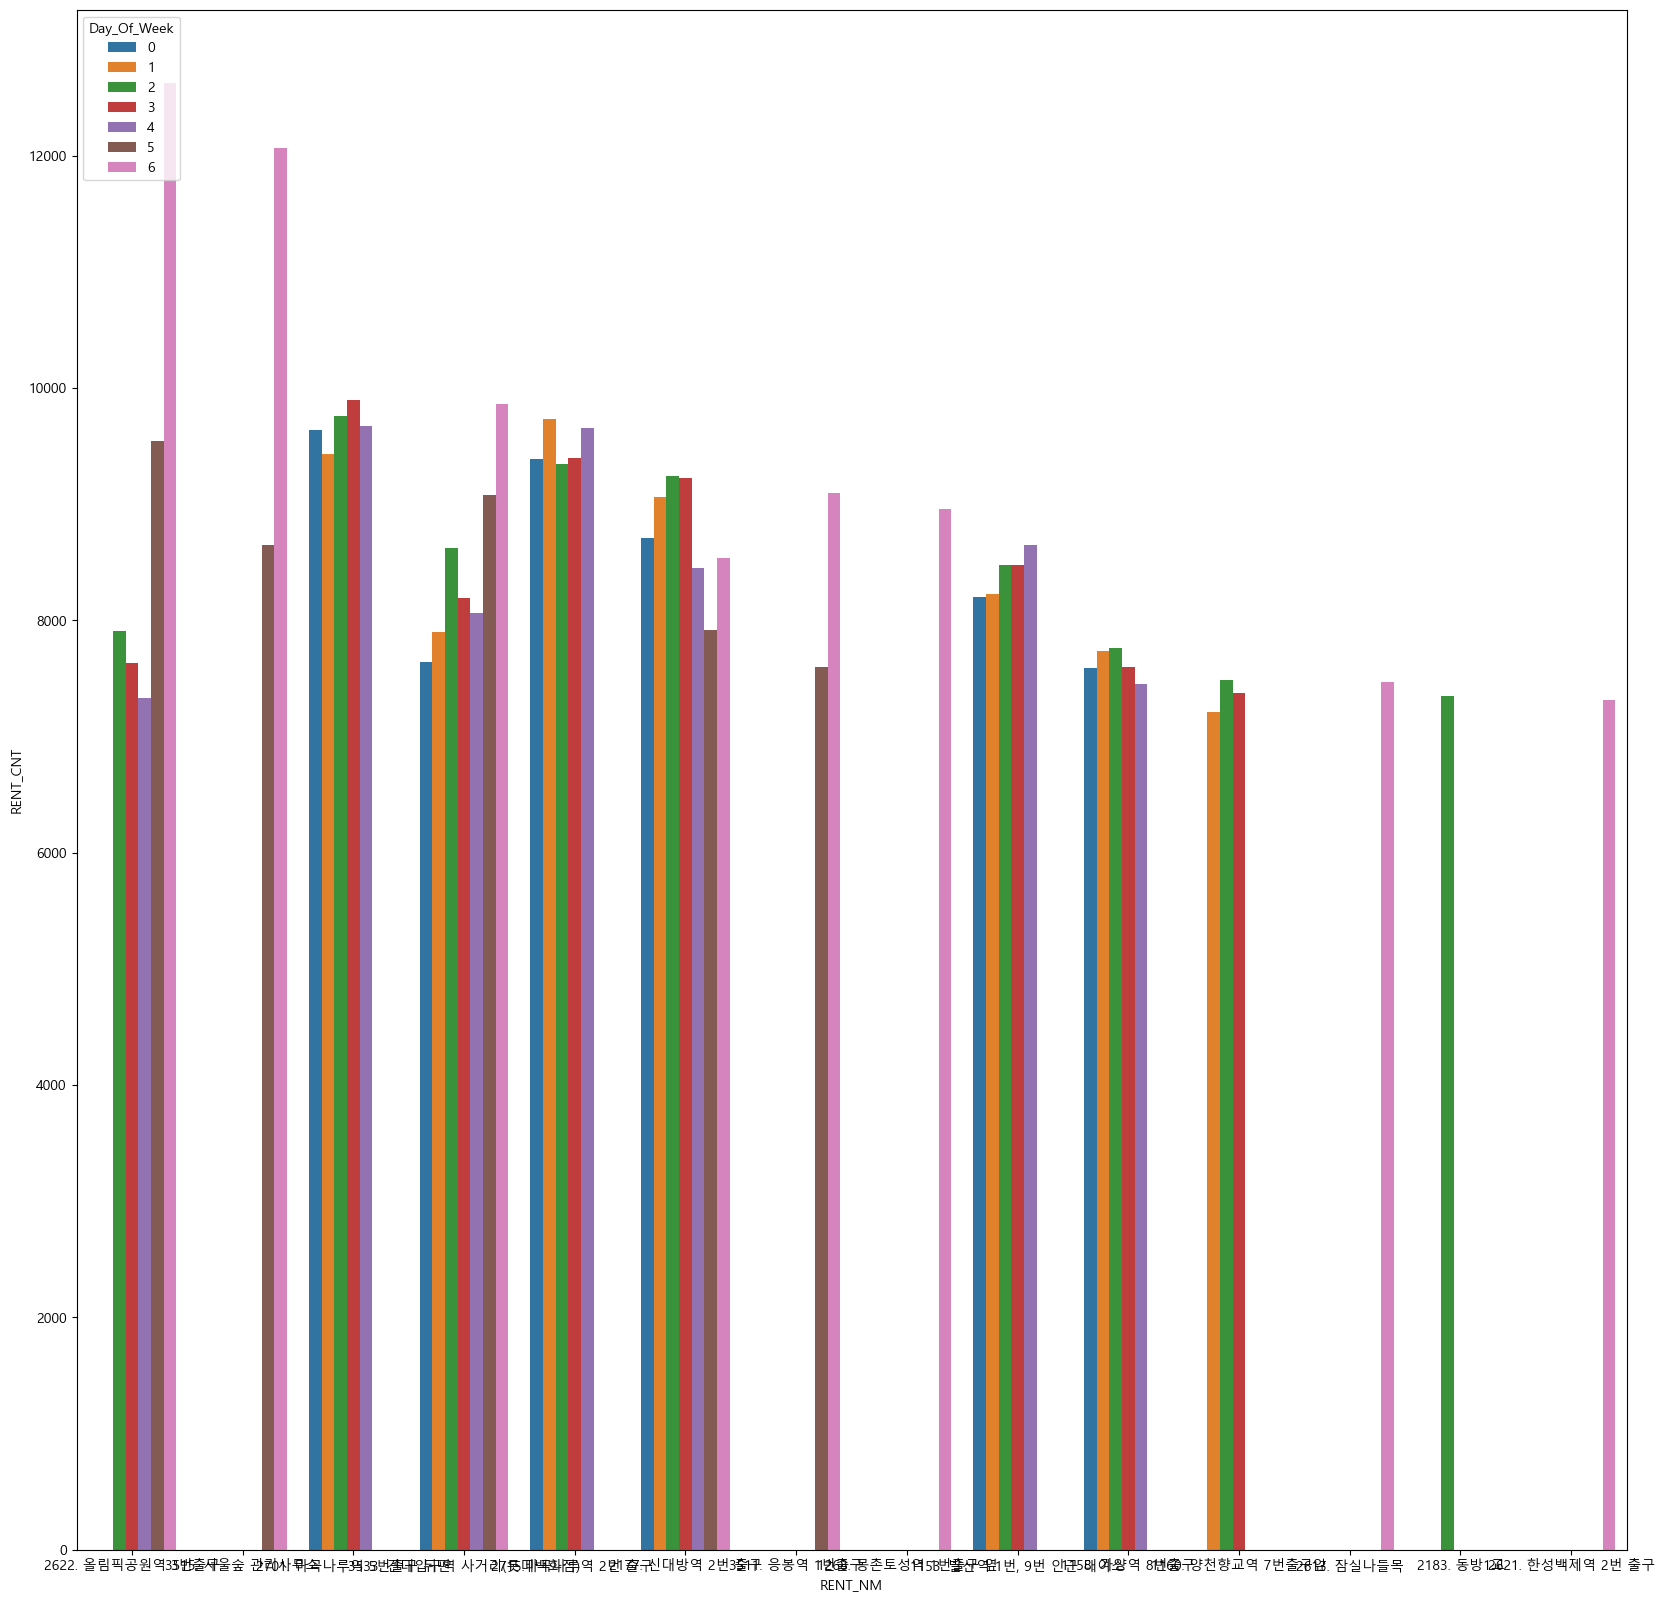

In [104]:
plt.figure(figsize=(20,20))
sns.barplot(data=summer_top_50_rent_loc,x='RENT_NM',y='RENT_CNT',hue='Day_Of_Week')

### 여름 top 50 렌트 횟수
- 올림픽공원에 이용자가 많음

In [105]:
summer_do_rent=spring_result.groupby(['STA_LOC','Day_Of_Week'])['RENT_CNT'].sum().reset_index()

<Axes: xlabel='STA_LOC', ylabel='RENT_CNT'>

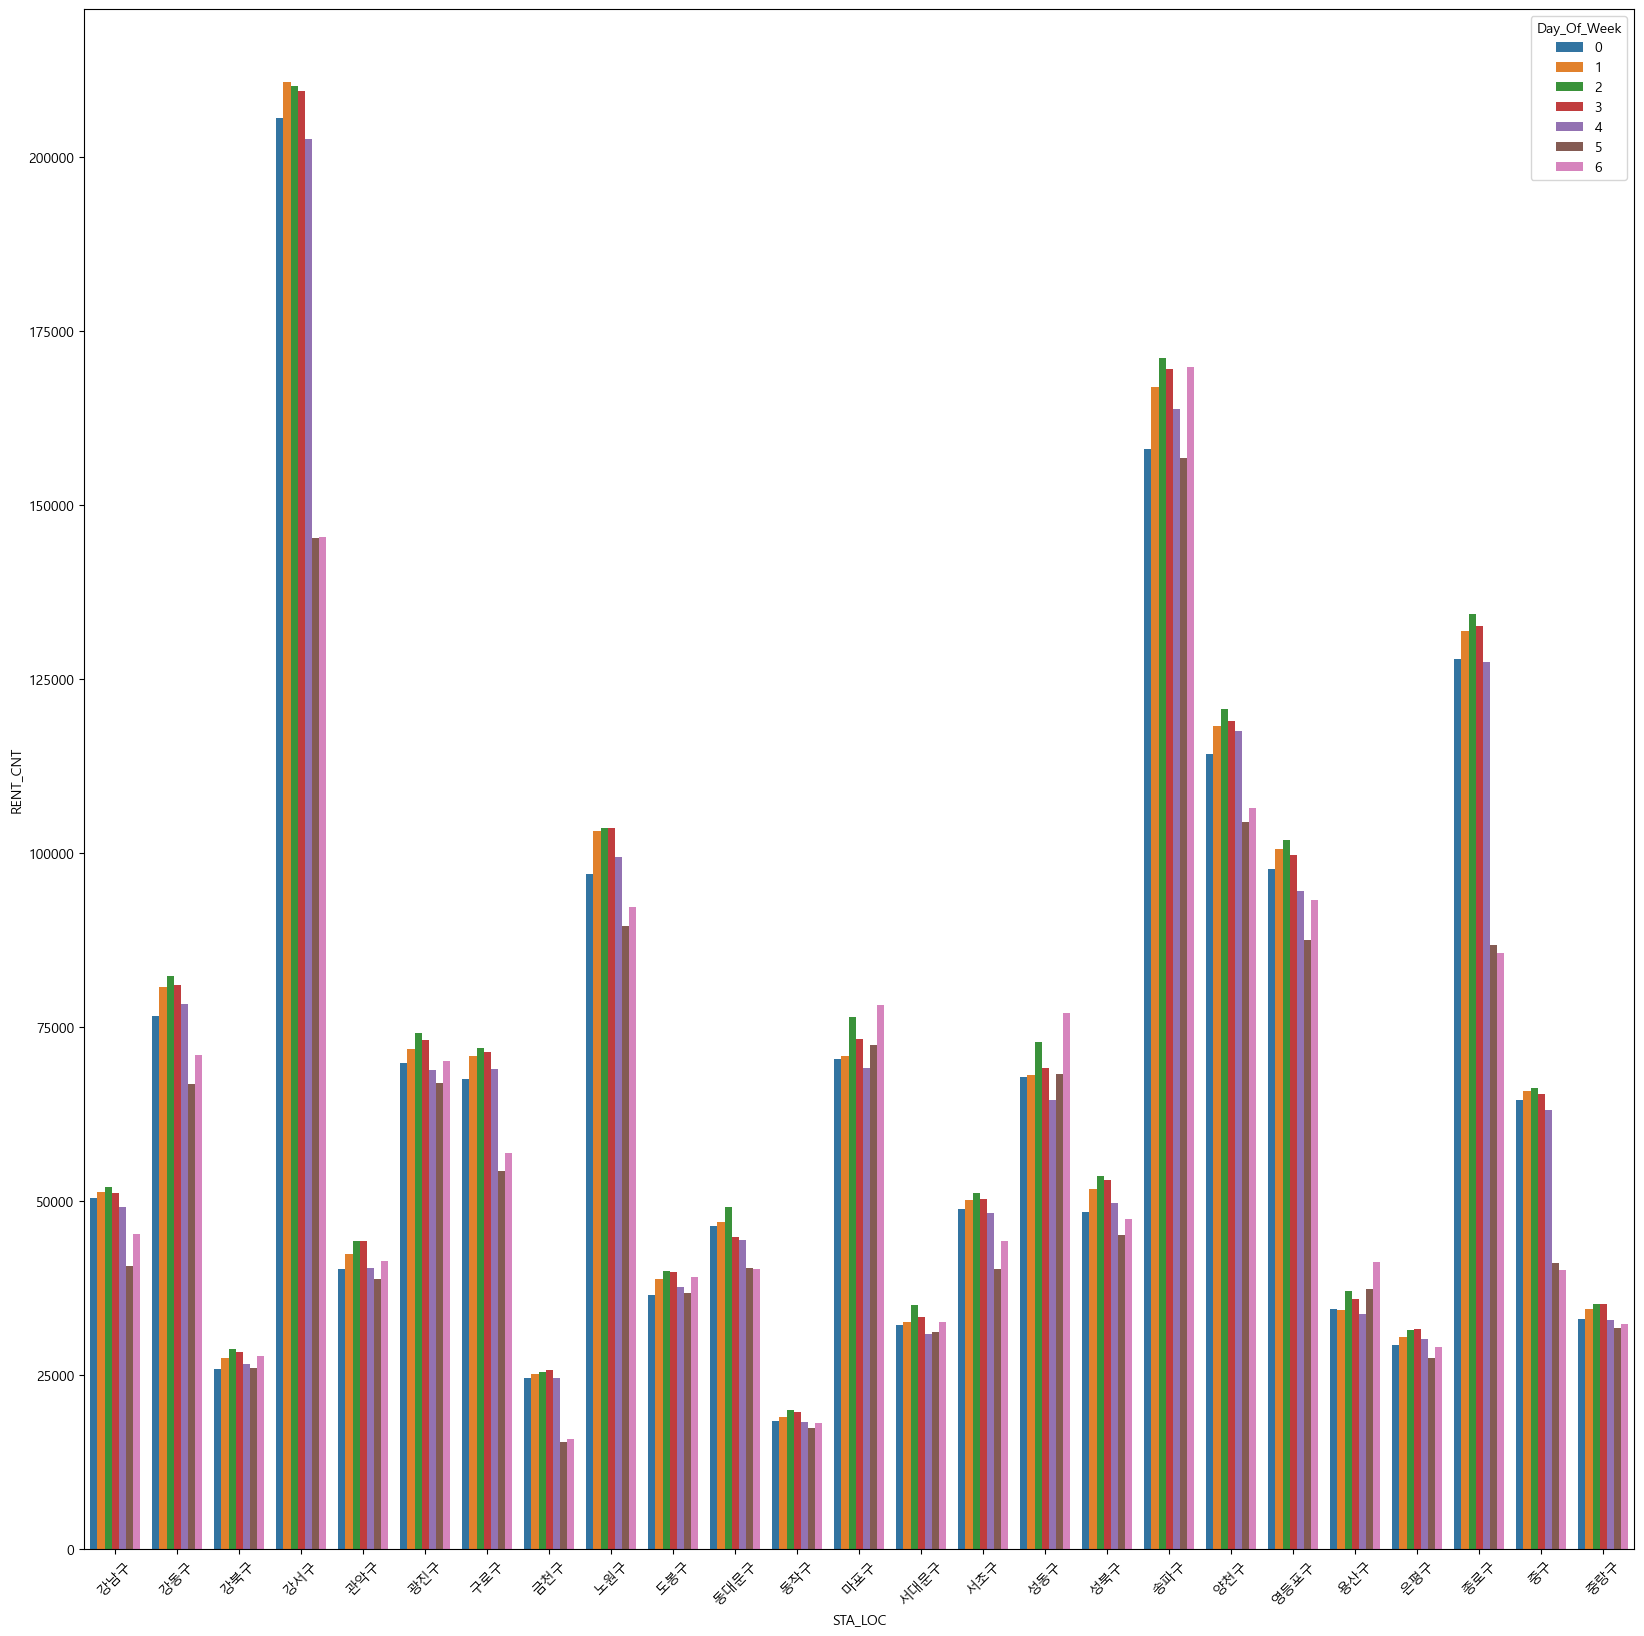

In [106]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=45)
sns.barplot(data=summer_do_rent,x='STA_LOC',y='RENT_CNT',hue='Day_Of_Week')

### 구별 요일별 여름 렌트 횟수
- 각 구 이용자 중에 대부분 수요일에 이용자가 다른 요일보다 많음

In [107]:
summer_do_rent_avg=summer_result.groupby(['STA_LOC','Month'])['RENT_CNT'].mean().reset_index()

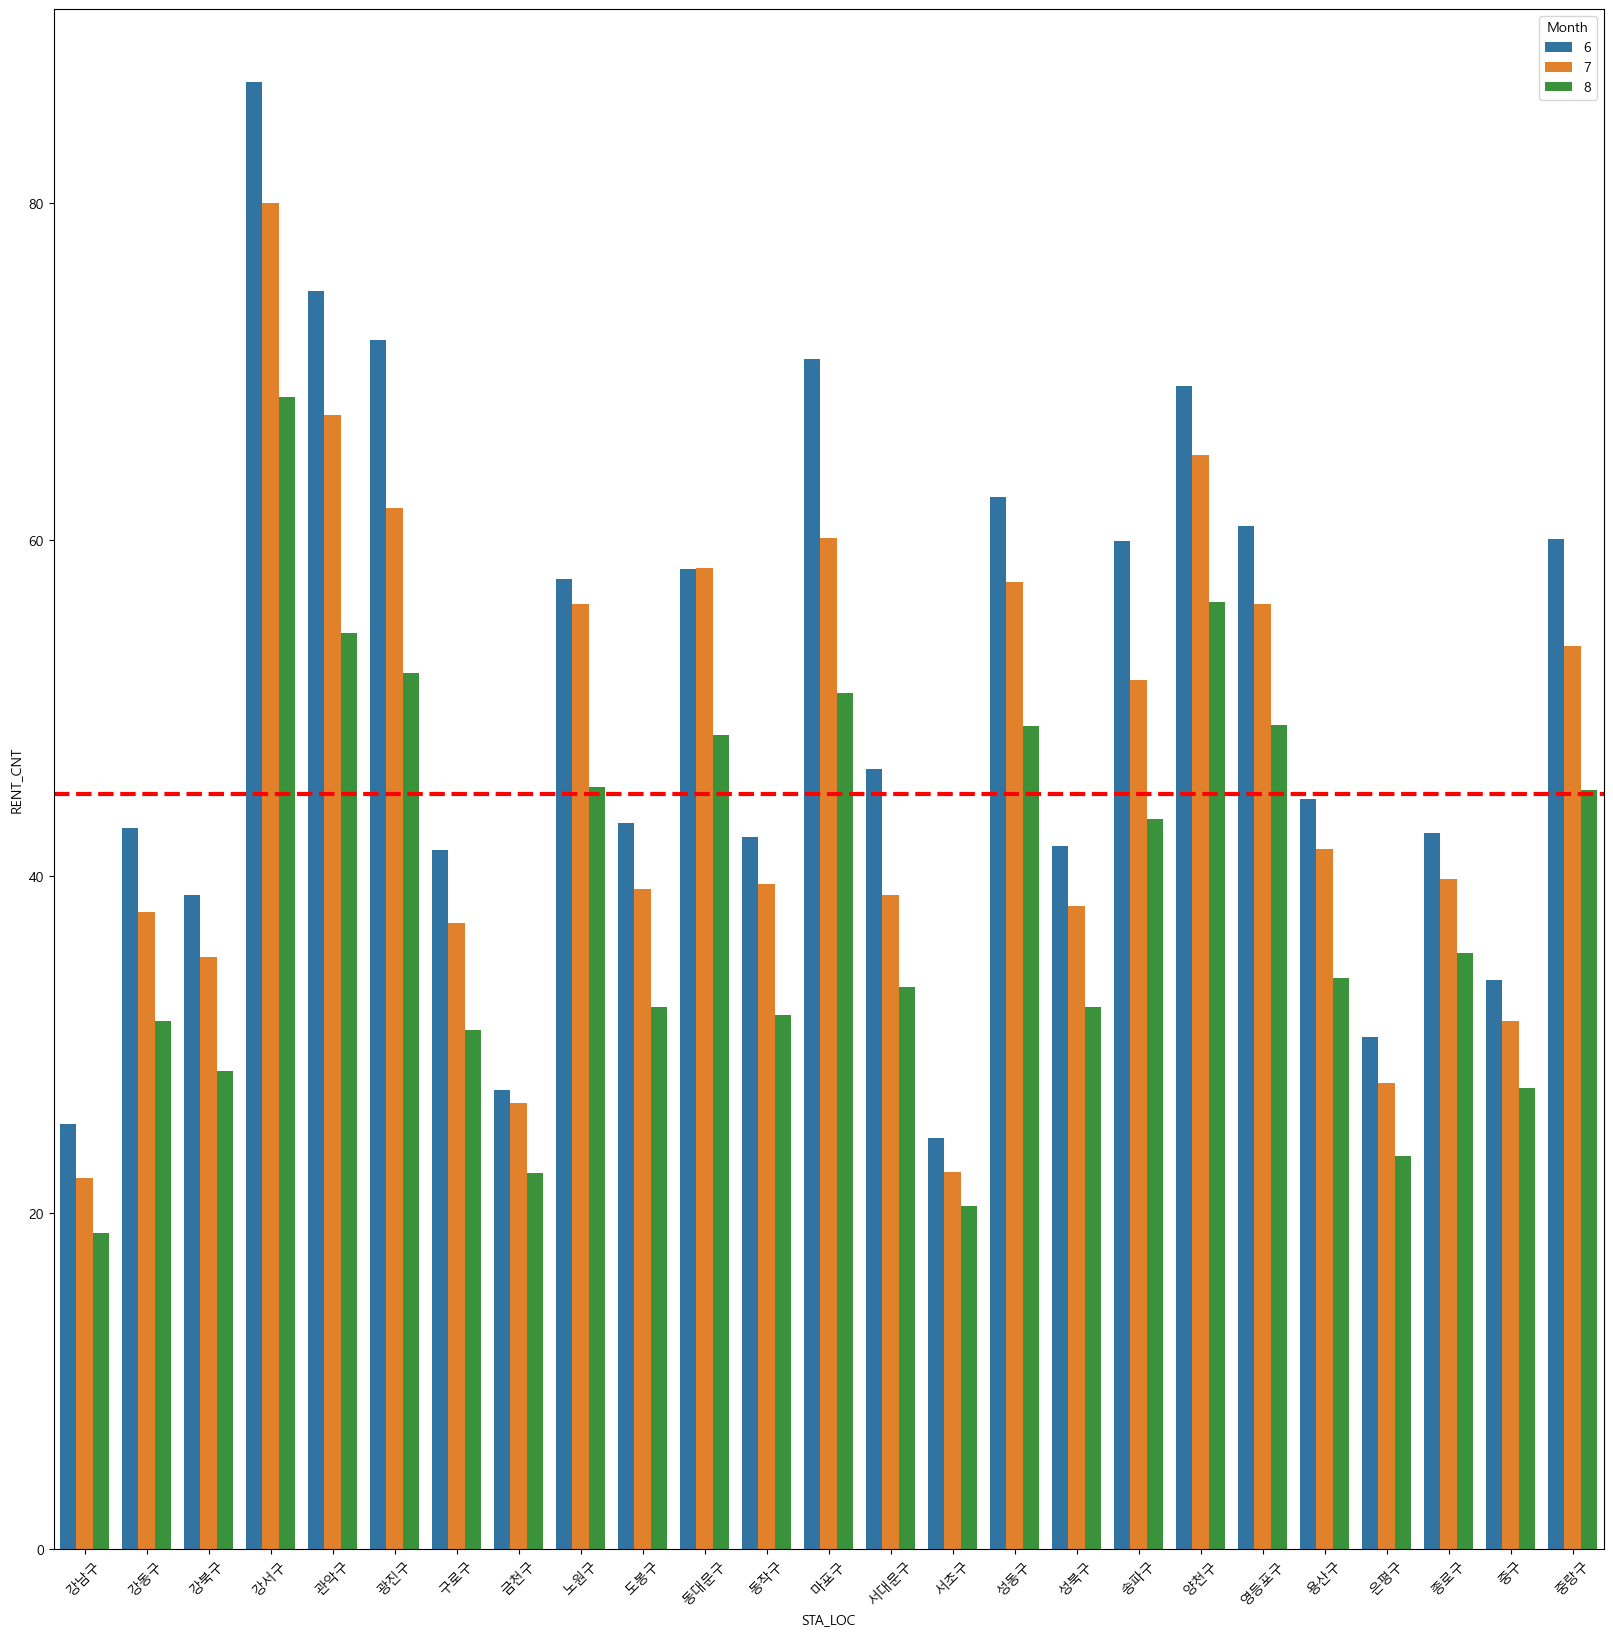

In [108]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=45)
sns.barplot(data=summer_do_rent_avg,x='STA_LOC',y='RENT_CNT',hue='Month')
plt.axhline(summer_do_rent_avg['RENT_CNT'].mean(), color='red', linestyle='--', linewidth='3')

In [109]:
summer_result

,STA_LOC,RENT_NM,STAT_DATA,RENT_CNT,RTN_CNT,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxInsWsHrmt,maxWs,maxWsWd,maxWsHrmt,avgWs,hr24SumRws,maxWd,avgTd,minRhm,minRhmHrmt,avgRhm,avgPv,avgPa,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,hr1MaxIcsrHrmt,hr1MaxIcsr,sumGsr,ddMefs,ddMefsHrmt,ddMes,ddMesHrmt,sumDpthFhsc,avgTca,avgLmac,avgTs,minTg,avgCm5Te,avgCm10Te,avgCm20Te,avgCm30Te,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur,Year,Month,Day,Season,Avg_Cloud_level,Avg_Temperature_level,Day_Of_Week
883067,강서구,2715.마곡나루역 2번 출구,2022-06-02,768,755,21.5,17.1,0150,26.9,1324,,,,,0.00,0.0,7.6,200.0,1355,4.5,270.0,1443,2.7,2302,250.0,14.8,46,1351,67.4,16.9,997.3,1008.8,2349,1005.3,0038,1007.2,14.6,10.4,1300,3.43,27.13,0.0,,0.0,,,3.9,1.9,30.6,9.1,24.8,23.9,23.1,22.6,22.4,19.5,18.1,13.7,13.4,5.4,7.7,NaN,,0.0,2022,6,2,2.0,1.0,3.0,3
901049,강서구,2715.마곡나루역 2번 출구,2022-06-20,748,747,25.2,22.0,0543,29.0,1611,,,,,0.00,0.0,4.4,250.0,1337,2.8,270.0,1910,1.3,1136,270.0,20.5,58,1747,76.6,24.2,994.8,1006.6,0001,1002.4,1726,1004.4,14.8,1.8,1300,2.26,12.59,0.0,,0.0,,,6.0,6.0,26.4,18.5,24.3,23.8,23.0,22.6,22.3,20.3,19.5,14.9,13.8,2.8,4.0,NaN,,0.0,2022,6,20,2.0,1.0,3.0,0
884068,강서구,2715.마곡나루역 2번 출구,2022-06-03,741,737,24.5,18.7,0023,32.6,1506,,,,,0.00,0.0,7.9,270.0,1627,4.6,250.0,1521,2.0,1751,250.0,16.3,34,1348,62.8,18.5,999.4,1011.1,2358,1007.3,1428,1009.2,14.6,10.6,1200,3.46,27.20,0.0,,0.0,,,4.1,2.4,33.7,16.3,26.4,25.1,24.0,23.1,22.8,19.7,18.2,13.8,13.4,5.8,8.3,NaN,,0.0,2022,6,3,2.0,1.0,3.0,4
902051,강서구,2715.마곡나루역 2번 출구,2022-06-21,740,734,26.5,21.2,0553,32.6,1539,,,,,0.00,0.0,7.2,270.0,1544,4.0,270.0,1647,2.0,1733,270.0,20.8,48,1415,72.6,24.5,993.9,1005.5,2349,1001.6,1439,1003.5,14.8,12.6,1200,3.56,28.94,0.0,,0.0,,,3.1,0.4,32.3,16.3,26.1,25.4,24.3,23.4,22.7,20.4,19.5,15.0,13.8,5.6,8.0,NaN,,0.0,2022,6,21,2.0,1.0,3.0,1
903048,강서구,2715.마곡나루역 2번 출구,2022-06-22,739,738,25.9,21.9,0344,31.0,1542,,,,,0.00,0.0,6.6,250.0,1633,4.2,290.0,1655,2.1,1818,270.0,19.9,44,1600,71.1,23.3,997.1,1008.5,0822,1005.4,0001,1006.7,14.8,7.4,1100,3.05,22.39,0.0,,0.0,,,6.1,3.1,31.5,19.1,26.8,26.3,25.4,24.6,23.7,20.5,19.5,15.1,13.8,4.5,6.4,0.8,,0.0,2022,6,22,2.0,2.0,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950314,영등포구,3219.영등포역 1번출구,2022-08-09,0,1,25.1,22.0,2354,26.5,1538,17.7,1746,27.1,1943,21.50,123.1,12.3,180.0,1735,5.7,180.0,1725,2.6,2209,200.0,24.4,94,0915,96.0,30.6,995.7,1007.0,1001,1003.2,1734,1005.4,13.8,0.0,0900,0.37,2.42,0.0,,0.0,,,10.0,7.0,26.0,21.4,26.2,26.0,25.7,26.2,27.4,27.1,27.0,23.8,16.3,0.7,1.0,122.3,-{비}-0115. {비}0140-{비}{강도0}0300-{비}{강도0}0600-0...,0.0,2022,8,9,2.0,2.0,3.0,1
215366,금천구,1858. 500번·507번 버스 종점 앞,2020-08-03,0,1,25.0,23.9,2002,26.3,0142,14.9,1920,28.5,836,19.92,102.6,14.5,200.0,0021,8.3,180.0,0025,3.0,2626,200.0,24.3,89,0118,96.3,30.4,998.4,1010.2,2329,1005.5,0116,1008.1,14.0,0.0,1400,0.65,3.09,0.0,,0.0,,,10.0,8.0,25.1,22.8,25.5,25.0,24.9,25.0,25.0,24.0,23.4,20.5,15.5,0.8,1.1,47.8,{박무}0150-{박무}{강도1}0300-{박무}{강도1}0600-{박무}{강도0}...,0.0,2020,8,3,2.0,2.0,3.0,0
950317,양천구,770.목동역5번출구 교통정보센터 앞,2022-08-09,0,2,25.1,22.0,2354,26.5,1538,17.7,1746,27.1,1943,21.50,123.1,12.3,180.0,1735,5.7,180.0,1725,2.6,2209,200.0,24.4,94,0915,96.0,30.6,995.7,1007.0,1001,1003.2,1734,1005.4,13.8,0.0,0900,0.37,2.42,0.0,,0.0,,,10.0,7.0,26.0,21.4,26.2,26.0,25.7,26.2,27.4,27.1,27.0,23.8,16.3,0.7,1.0,122.3,-{비}-0115. {비}0140-{비}{강도0}0300-{비}{강도0}0600-0...,0.0,2022,8,9,2.0,2.0,3.0,1
950320,양천구,788.양천구청역 2번출구 옆,2022-08-09,0,1,25.1,22.0,2354,26.5,1538,17.7,1746,27.1,1943,21.50,123.1,12.3,180.0,1735,5.7,180.0,1725,2.6,2209,200.0,24.4,94,0915,96.0,30.6,995.7,1007.0,1001,1003.2,1734,1005.4,13.8,0.0,0900,0.37,2.42,0.0,,0.0,,,10.0,7

In [110]:
summer_do_return_avg=summer_result.groupby(['STA_LOC','Month'])['RTN_CNT'].mean().reset_index()

In [111]:
inf_rows_column = summer_do_return_avg.loc[summer_do_return_avg['RTN_CNT'] == np.inf]
print(inf_rows_column)

Empty DataFrame
Columns: [STA_LOC, Month, RTN_CNT]
Index: []


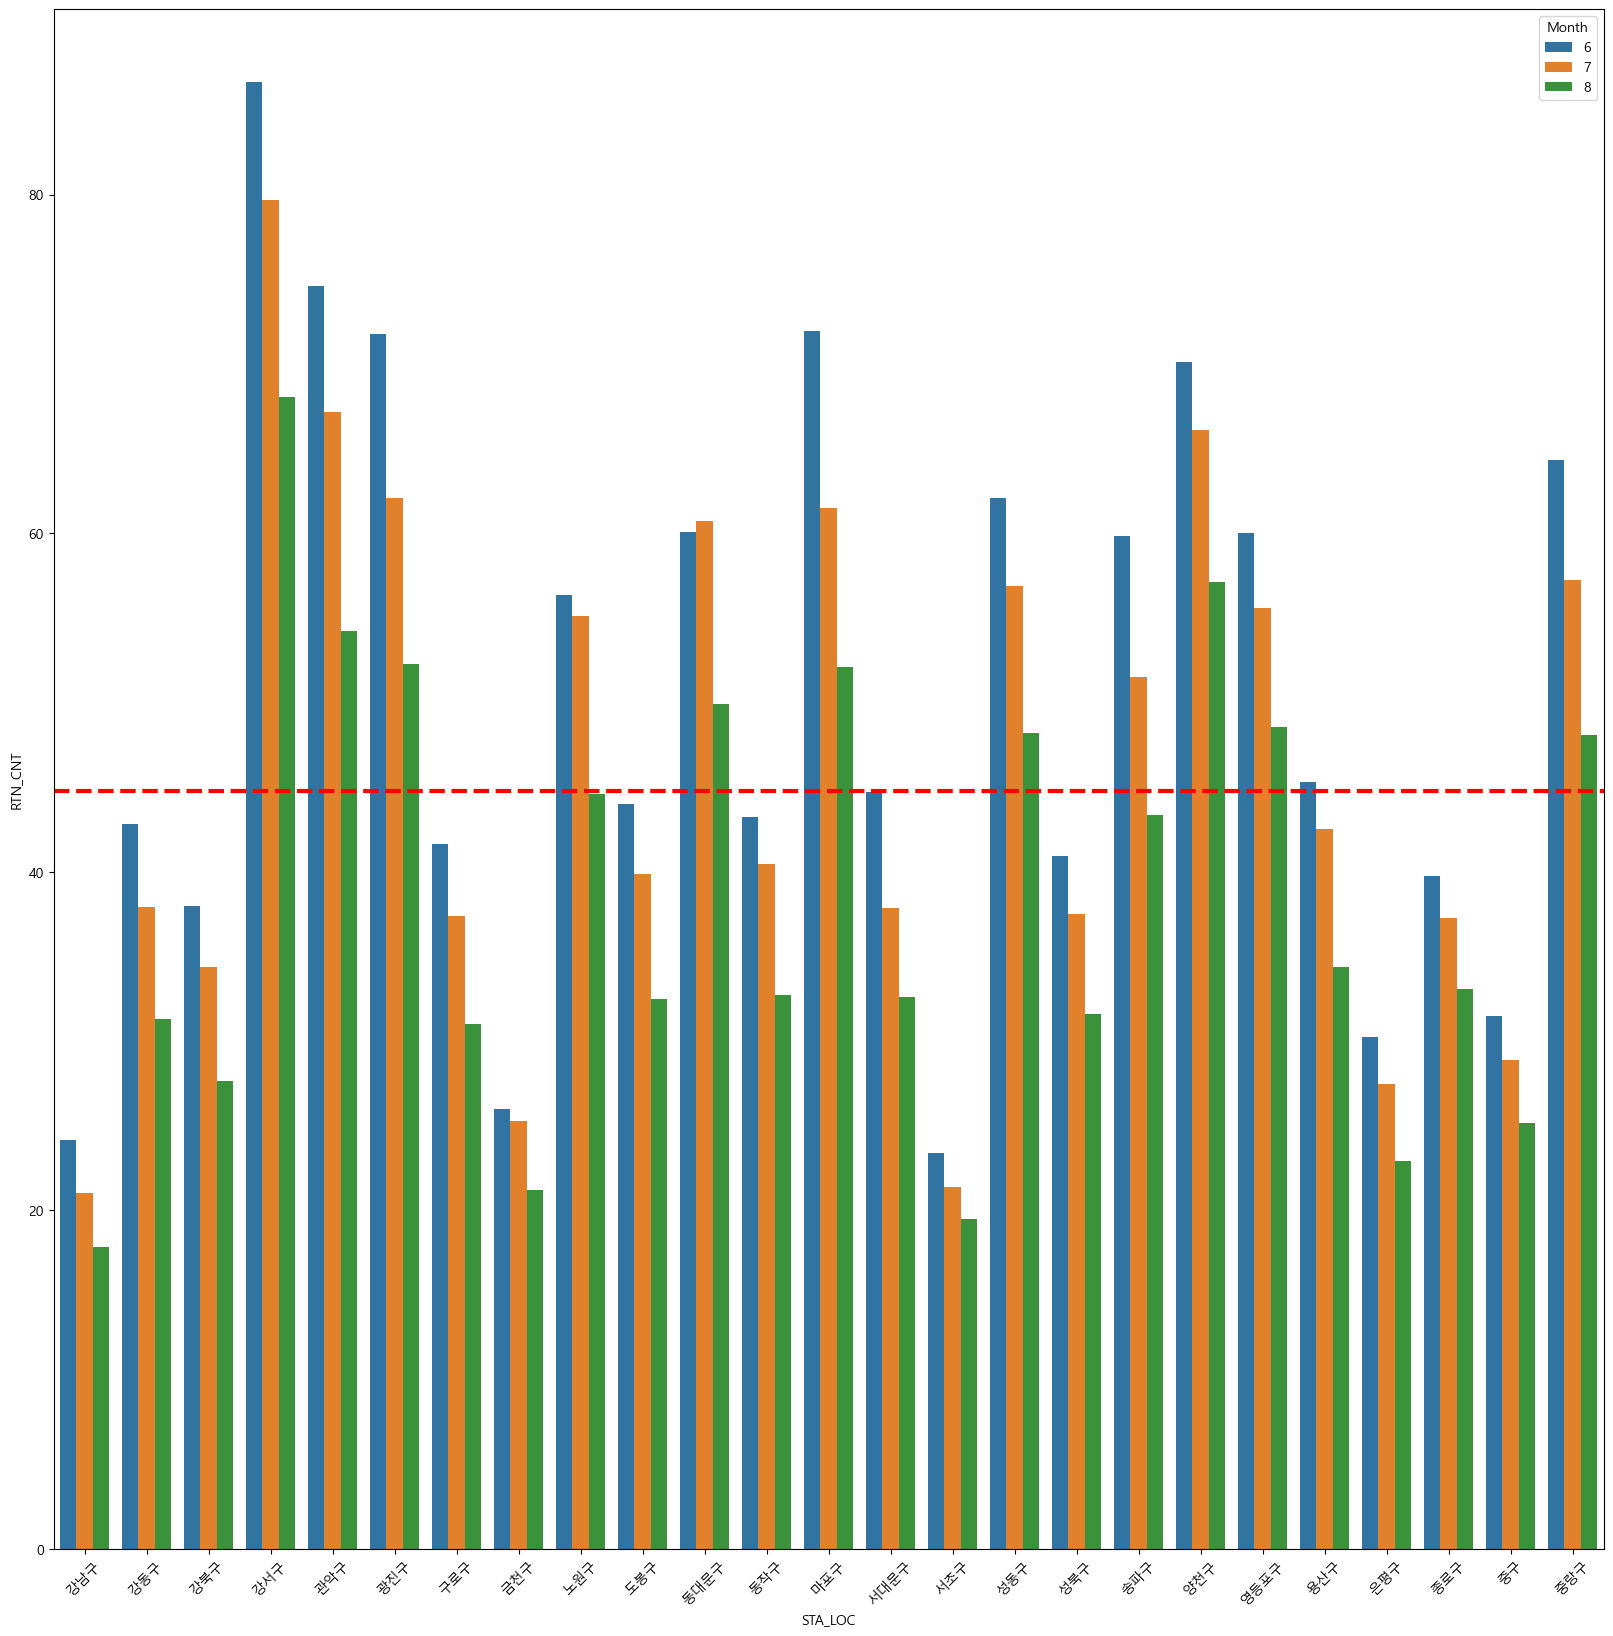

In [112]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=45)
sns.barplot(data=summer_do_return_avg,x='STA_LOC',y='RTN_CNT',hue='Month')
plt.axhline(summer_do_return_avg['RTN_CNT'].mean(), color='red', linestyle='--', linewidth='3')

In [113]:
autumn_use = merged_df[merged_df['Season'] == 3]

In [114]:
sorted_autumn_use = autumn_use.sort_values(by='RENT_CNT', ascending=False)

In [115]:
fall_result = sorted_autumn_use.loc[:, ['STA_LOC','RENT_NM','STAT_DATA','RENT_CNT','RTN_CNT',	'avgTa','minTa','minTaHrmt','maxTa','maxTaHrmt','mi10MaxRn','mi10MaxRnHrmt','hr1MaxRn','hr1MaxRnHrmt','sumRnDur','sumRn','maxInsWs','maxInsWsWd','maxInsWsHrmt','maxWs','maxWsWd',	'maxWsHrmt','avgWs','hr24SumRws','maxWd','avgTd','minRhm','minRhmHrmt','avgRhm','avgPv','avgPa',	'maxPs','maxPsHrmt','minPs','minPsHrmt','avgPs','ssDur','sumSsHr','hr1MaxIcsrHrmt','hr1MaxIcsr',	'sumGsr','ddMefs','ddMefsHrmt','ddMes','ddMesHrmt','sumDpthFhsc','avgTca','avgLmac','avgTs','minTg','avgCm5Te','avgCm10Te','avgCm20Te','avgCm30Te','avgM05Te','avgM10Te','avgM15Te','avgM30Te',	'avgM50Te','sumLrgEv','sumSmlEv','n99Rn','iscs','sumFogDur','Year','Month','Day','Season'	,'Avg_Cloud_level','Avg_Temperature_level','Day_Of_Week']]

In [116]:
fall_result

,STA_LOC,RENT_NM,STAT_DATA,RENT_CNT,RTN_CNT,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxInsWsHrmt,maxWs,maxWsWd,maxWsHrmt,avgWs,hr24SumRws,maxWd,avgTd,minRhm,minRhmHrmt,avgRhm,avgPv,avgPa,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,hr1MaxIcsrHrmt,hr1MaxIcsr,sumGsr,ddMefs,ddMefsHrmt,ddMes,ddMesHrmt,sumDpthFhsc,avgTca,avgLmac,avgTs,minTg,avgCm5Te,avgCm10Te,avgCm20Te,avgCm30Te,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur,Year,Month,Day,Season,Avg_Cloud_level,Avg_Temperature_level,Day_Of_Week
1001699,강서구,2715.마곡나루역 2번 출구,2022-09-29,813,802,20.4,16.4,0612,26.5,1612,,,,,0.00,0.0,5.8,230.0,1744,3.4,250.0,1745,1.4,1227,270.0,14.9,33,1605,73.5,17.0,1004.5,1015.8,2312,1012.7,1540,1014.4,11.9,7.9,1200,2.76,17.37,0.0,,0.0,,,2.5,2.5,21.9,10.0,21.6,21.4,21.2,21.6,22.4,22.9,23.8,21.6,18.7,3.5,4.9,NaN,-{박무}-{박무}{강도0}0300-{박무}{강도0}0600-{박무}{강도1}090...,0.0,2022,9,29,3.0,0.0,3.0,3
1016678,강서구,2715.마곡나루역 2번 출구,2022-10-14,811,812,17.1,12.4,0529,23.0,1454,,,,,0.00,0.0,5.5,320.0,2047,3.2,290.0,2035,1.6,1415,20.0,11.9,49,1410,73.4,14.0,1009.8,1022.5,0005,1017.6,1829,1019.9,11.3,4.9,1400,2.01,13.52,0.0,,0.0,,,7.9,4.3,17.4,5.6,17.1,16.8,16.8,17.3,18.4,20.2,22.1,21.3,18.9,2.5,3.5,NaN,,0.0,2022,10,14,3.0,2.0,2.0,4
1008689,강서구,2715.마곡나루역 2번 출구,2022-10-06,797,792,15.8,12.7,0640,19.1,1419,0.0,,0.0,,2.25,0.0,6.2,140.0,1255,3.4,50.0,1105,2.1,1842,50.0,11.6,63,1401,76.6,13.6,1008.9,1021.3,0930,1016.6,1707,1019.1,11.6,1.6,1100,1.52,7.74,0.0,,0.0,,,8.9,5.1,17.4,10.0,19.2,19.1,19.4,20.3,21.6,22.2,23.2,21.8,18.8,1.6,2.3,0.0,{비}1635-{비}{강도0}1800-1850.,0.0,2022,10,6,3.0,2.0,2.0,3
1002697,강서구,2715.마곡나루역 2번 출구,2022-09-30,794,793,20.7,14.8,0705,27.7,1522,,,,,0.00,0.0,5.2,250.0,1509,3.2,270.0,1813,1.6,1412,20.0,13.9,34,1618,68.0,16.0,1005.9,1017.2,0741,1013.9,1620,1015.8,11.9,10.6,1200,2.72,19.27,0.0,,0.0,,,0.3,0.0,22.4,7.1,21.5,21.3,21.2,21.6,22.4,22.8,23.7,21.6,18.8,3.8,5.4,NaN,{박무}0620-0755. {연무}1850-2005.,0.0,2022,9,30,3.0,0.0,3.0,4
1009689,강서구,2715.마곡나루역 2번 출구,2022-10-07,789,784,14.3,11.0,0651,18.6,1522,,,,,0.00,0.0,9.2,360.0,1520,4.7,20.0,1525,2.5,2121,290.0,8.6,48,2002,69.5,11.2,1009.9,1023.7,2320,1017.9,0135,1020.2,11.6,7.6,1400,2.07,15.08,0.0,,0.0,,,3.4,2.9,16.8,6.3,18.2,18.2,18.6,19.6,21.1,22.1,23.1,21.7,18.9,2.7,3.8,NaN,,0.0,2022,10,7,3.0,1.0,2.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293223,강남구,2395. 개포1단지아파트 입구 (보도육교),2020-10-20,0,1,15.2,9.9,0647,21.7,1413,,,,,0.00,0.0,4.9,290.0,1434,3.1,250.0,1438,1.6,1341,20.0,8.5,38,1658,67.1,11.2,1015.4,1028.8,0903,1022.7,1738,1025.7,11.1,10.0,1200,2.44,15.67,0.0,,0.0,,,0.4,0.0,14.5,3.7,15.9,15.6,16.1,16.8,17.5,19.6,20.9,21.1,18.5,2.9,4.1,NaN,-{박무}-{박무}{강도1}0300-{박무}{강도1}0600-{박무}{강도0}090...,0.0,2020,10,20,3.0,0.0,2.0,1
699020,종로구,3404.서울특별시 중부교육지원청,2021-11-30,0,1,5.7,0.7,2356,8.9,1334,,,,,13.75,27.2,16.4,290.0,2204,8.4,250.0,1639,3.7,3189,270.0,2.4,60,2400,80.4,7.6,1000.8,1021.1,0003,1005.1,1318,1011.3,9.8,0.0,1300,0.30,0.84,0.0,,0.0,,,9.0,7.8,5.7,0.0,7.3,6.9,7.1,7.8,8.8,11.9,15.1,17.8,18.0,0.9,1.3,10.3,{비}0405-{비}{강도1}0600-{비}{강도0}0900-{비}{강도0}1200...,0.0,2021,11,30,3.0,2.0,1.0,1
250330,종로구,3403.서울특별시 교육청,2020-09-07,0,1,19.2,17.5,0751,20.6,2352,1.9,827,8.4,1933,24.00,61.0,15.3,20.0,1109,7.9,320.0,1059,4.2,3664,50.0,18.0,84,0611,93.5,20.8,983.1,1004.2,0001,984.7,1259,992.8,12.8,0.0,1300,0.90,3.37,0.0,,0.0,,,10.0,6.8,20.1,16.4,21.7,21.6,22.6,23.6,24.9,25.5,25.3,22.0,17.6,1.2,1.7,38.9,-{박무}-0020. {박무}0140-0250. -{비}-{비}{강도0}0300-{...,0.0,2020,9,7,3.0,2.0,2.0,0
977600,도봉구,1748. 방학역 1번출구,2022-09-05,0,2,19.2,17.7,2103,22.7,0001,2.9,1544,12.8,1025,24.00,120.0,18.3,20.0,2226,6.9,50.0,2229,3.2,2729,50.0,18.4,92,0337,95.9,21.3,997.1,1008.7,0019,1004.1,2400,10

In [117]:
autumn_day_rent=fall_result.groupby(['RENT_NM','Day_Of_Week'])['RENT_CNT'].sum().reset_index()

In [118]:
fall_top_50_rent_loc = autumn_day_rent.sort_values(by='RENT_CNT', ascending=False).head(50)

<Axes: xlabel='RENT_NM', ylabel='RENT_CNT'>

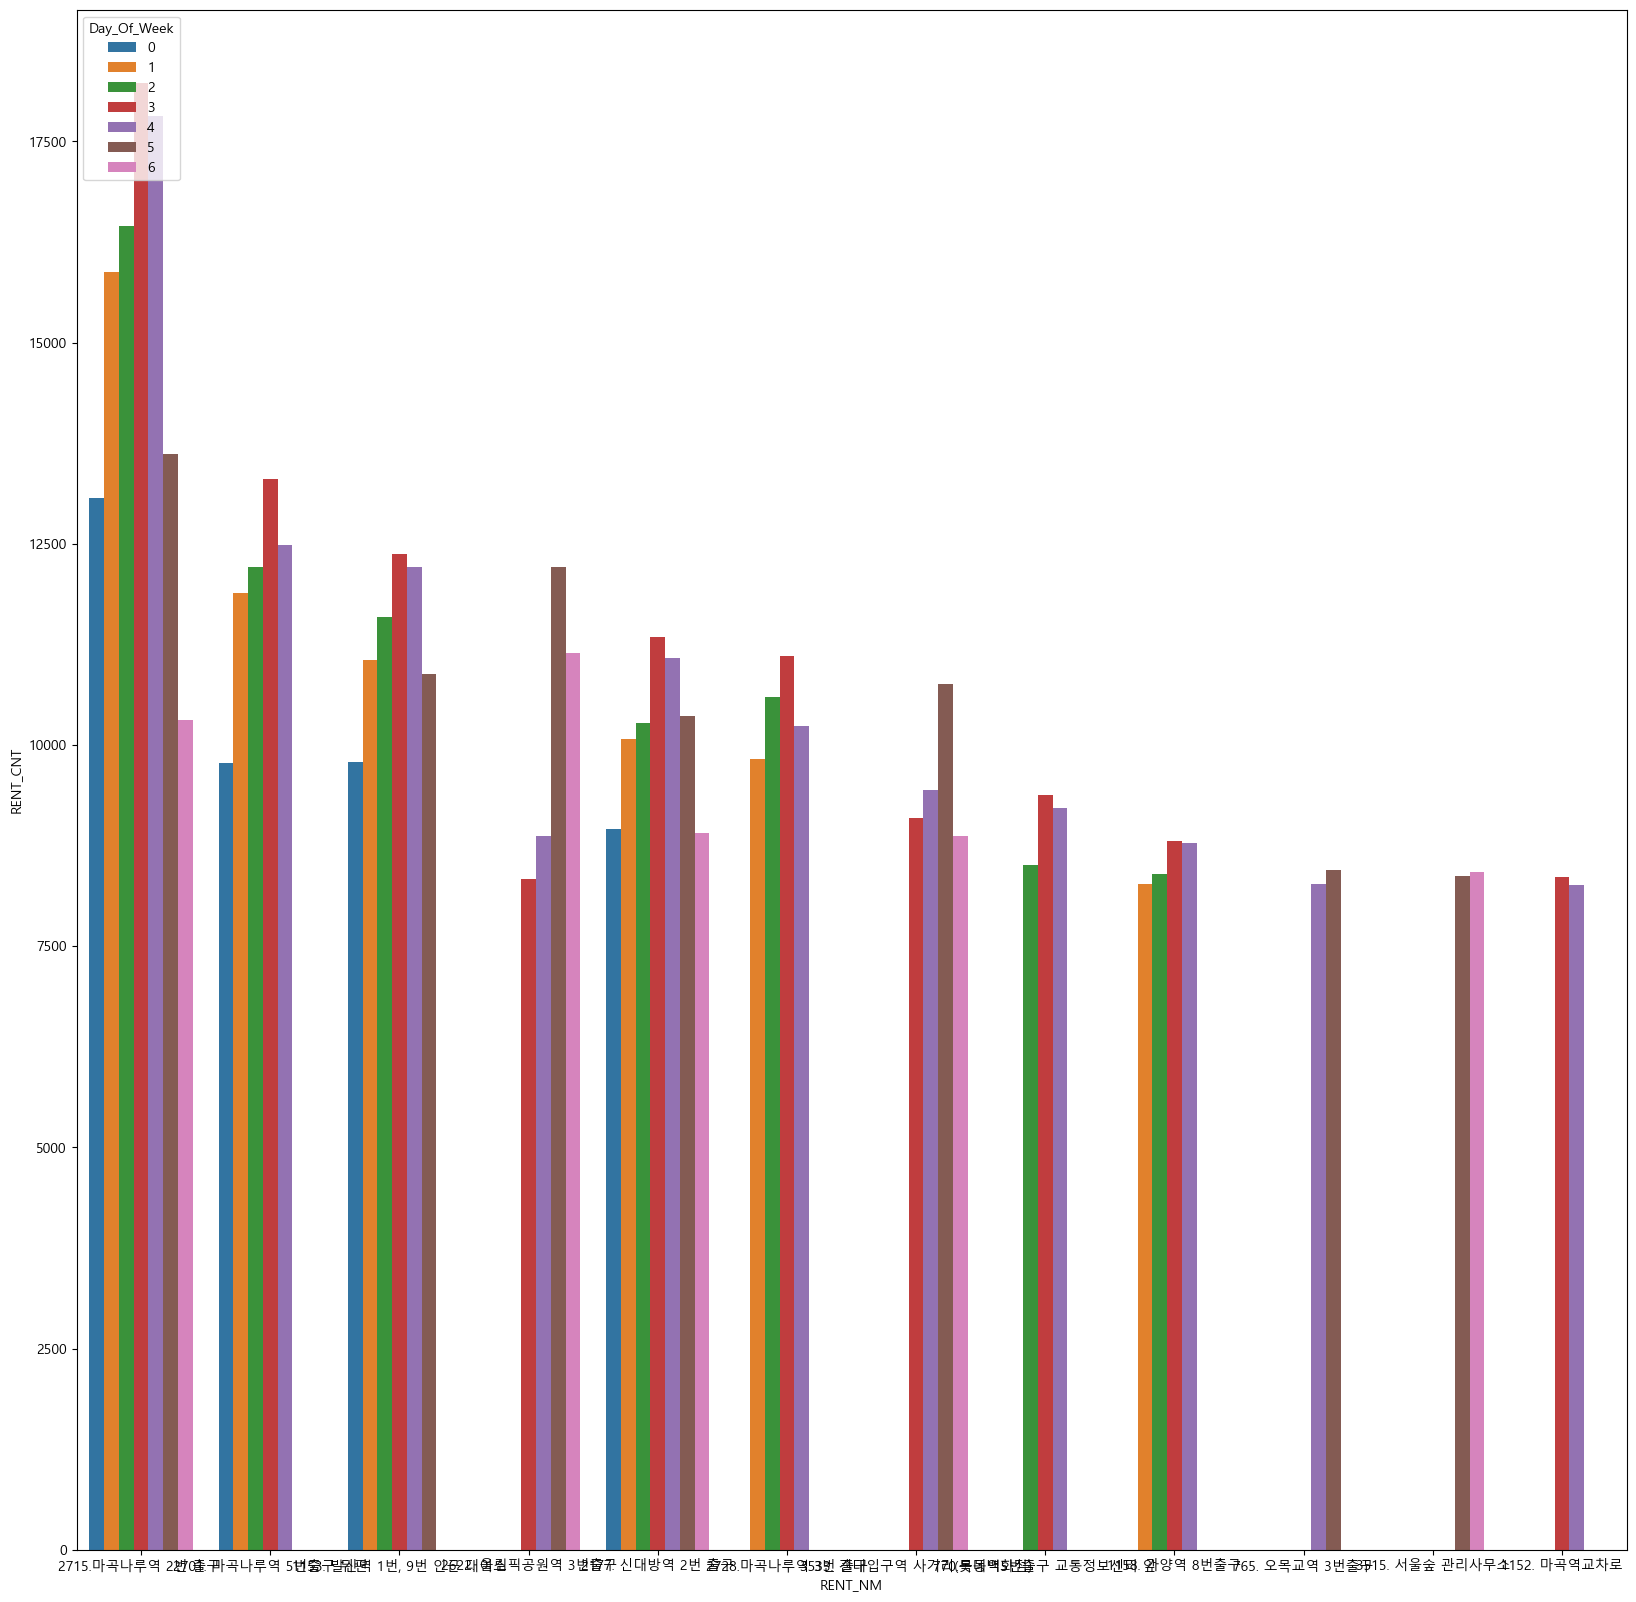

In [119]:
plt.figure(figsize=(20,20))
sns.barplot(data=fall_top_50_rent_loc,x='RENT_NM',y='RENT_CNT',hue='Day_Of_Week')

### 가을 top 50 렌트 횟수
- 마곡나루역에 이용자가 많음

In [120]:
autumn_do_rent=fall_result.groupby(['STA_LOC','Day_Of_Week'])['RENT_CNT'].sum().reset_index()

<Axes: xlabel='STA_LOC', ylabel='RENT_CNT'>

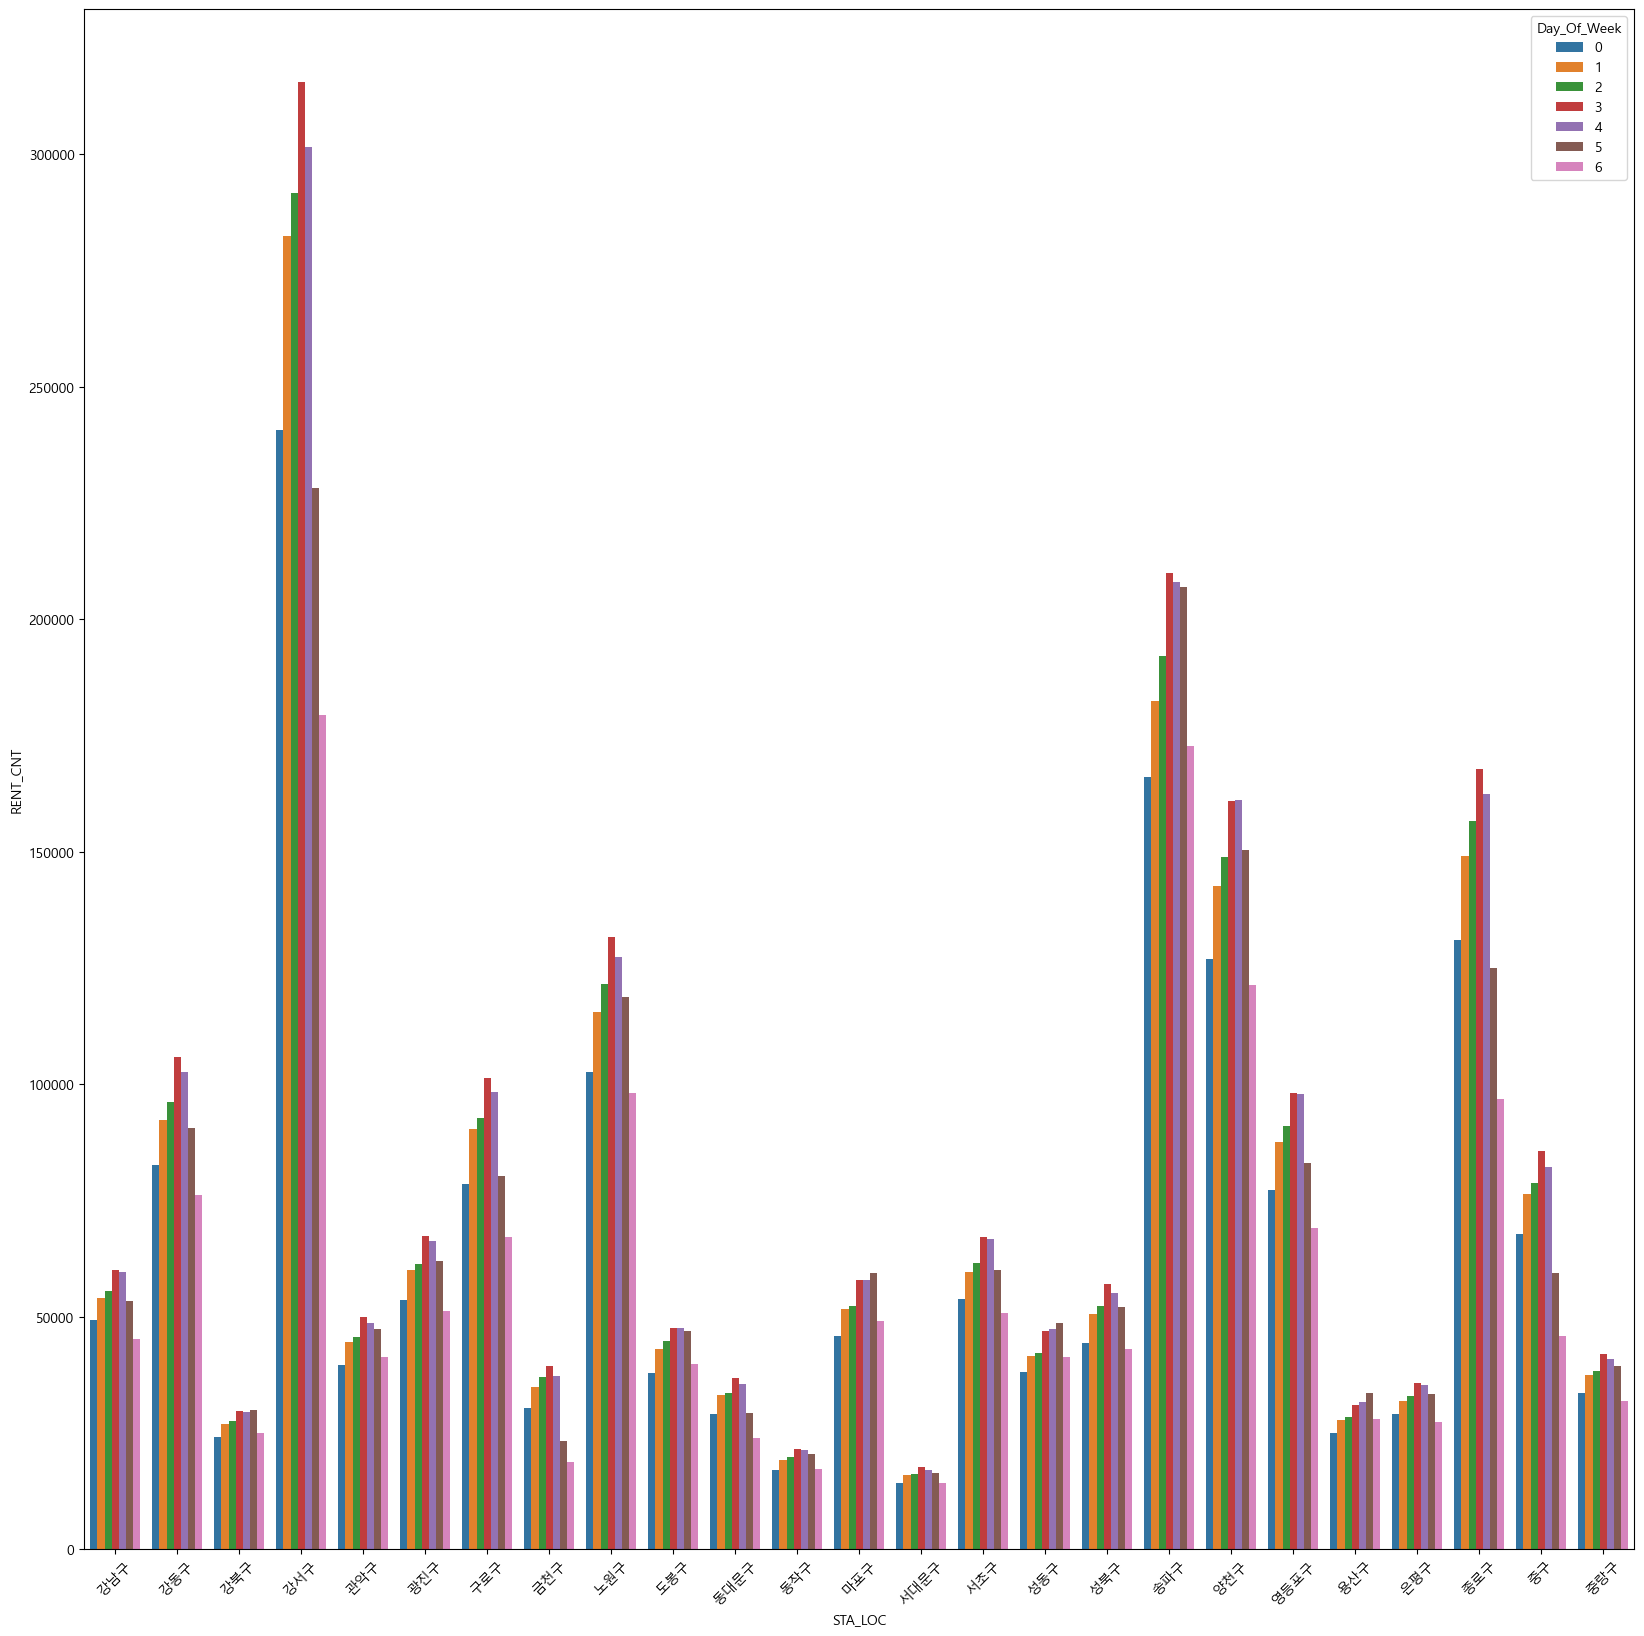

In [121]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=45)
sns.barplot(data=autumn_do_rent,x='STA_LOC',y='RENT_CNT',hue='Day_Of_Week')


### 구별 요일별 가을 렌트 횟수
- 목요일 금요일이 다른 요일보다 렌트횟수가 많은 구가 많음

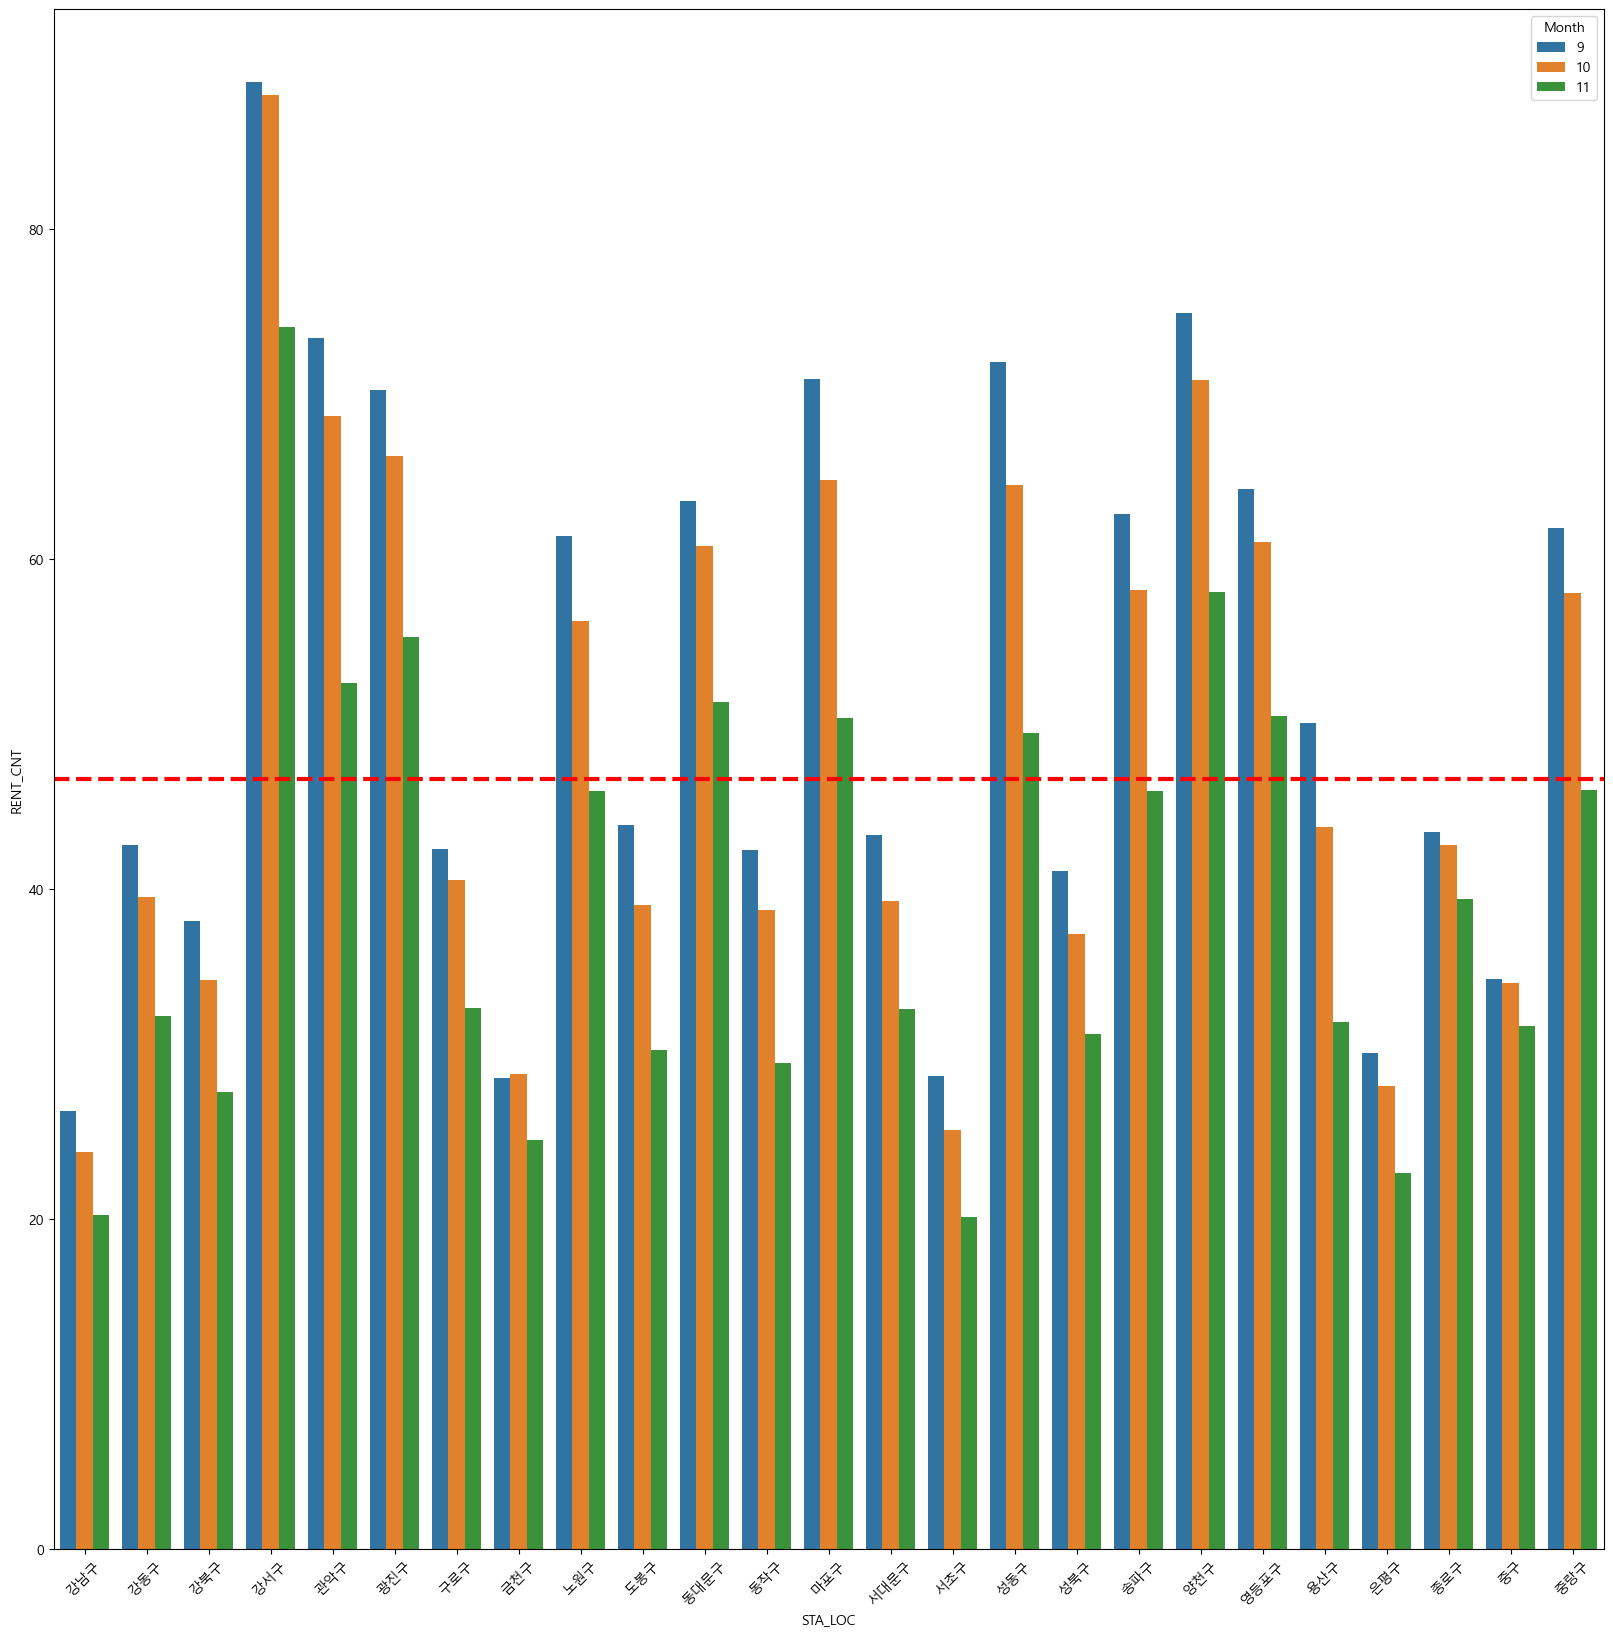

In [122]:
autumn_do_rent_avg=fall_result.groupby(['STA_LOC','Month'])['RENT_CNT'].mean().reset_index()
plt.figure(figsize=(20,20))
plt.xticks(rotation=45)
sns.barplot(data=autumn_do_rent_avg,x='STA_LOC',y='RENT_CNT',hue='Month')
plt.axhline(autumn_do_rent_avg['RENT_CNT'].mean(), color='red', linestyle='--', linewidth='3')

In [123]:
winter_use = merged_df[merged_df['Season'] == 4]

In [124]:
sorted_winter_use = winter_use.sort_values(by='RENT_CNT', ascending=False)

In [125]:
winter_result = sorted_winter_use.loc[:, ['STA_LOC','RENT_NM','STAT_DATA','RENT_CNT','RTN_CNT',	'avgTa','minTa','minTaHrmt','maxTa','maxTaHrmt','mi10MaxRn','mi10MaxRnHrmt','hr1MaxRn','hr1MaxRnHrmt','sumRnDur','sumRn','maxInsWs','maxInsWsWd','maxInsWsHrmt','maxWs','maxWsWd',	'maxWsHrmt','avgWs','hr24SumRws','maxWd','avgTd','minRhm','minRhmHrmt','avgRhm','avgPv','avgPa',	'maxPs','maxPsHrmt','minPs','minPsHrmt','avgPs','ssDur','sumSsHr','hr1MaxIcsrHrmt','hr1MaxIcsr',	'sumGsr','ddMefs','ddMefsHrmt','ddMes','ddMesHrmt','sumDpthFhsc','avgTca','avgLmac','avgTs','minTg','avgCm5Te','avgCm10Te','avgCm20Te','avgCm30Te','avgM05Te','avgM10Te','avgM15Te','avgM30Te',	'avgM50Te','sumLrgEv','sumSmlEv','n99Rn','iscs','sumFogDur','Year','Month','Day','Season'	,'Avg_Cloud_level','Avg_Temperature_level','Day_Of_Week']]

In [126]:
winter_day_rent=winter_result.groupby(['RENT_NM','Day_Of_Week'])['RENT_CNT'].sum().reset_index()

In [127]:
winter_day_rent=winter_result.groupby(['RENT_NM','Day_Of_Week'])['RENT_CNT'].sum().reset_index()

In [128]:
winter_top_50_rent_loc = winter_day_rent.sort_values(by='RENT_CNT', ascending=False).head(50)

<Axes: xlabel='RENT_NM', ylabel='RENT_CNT'>

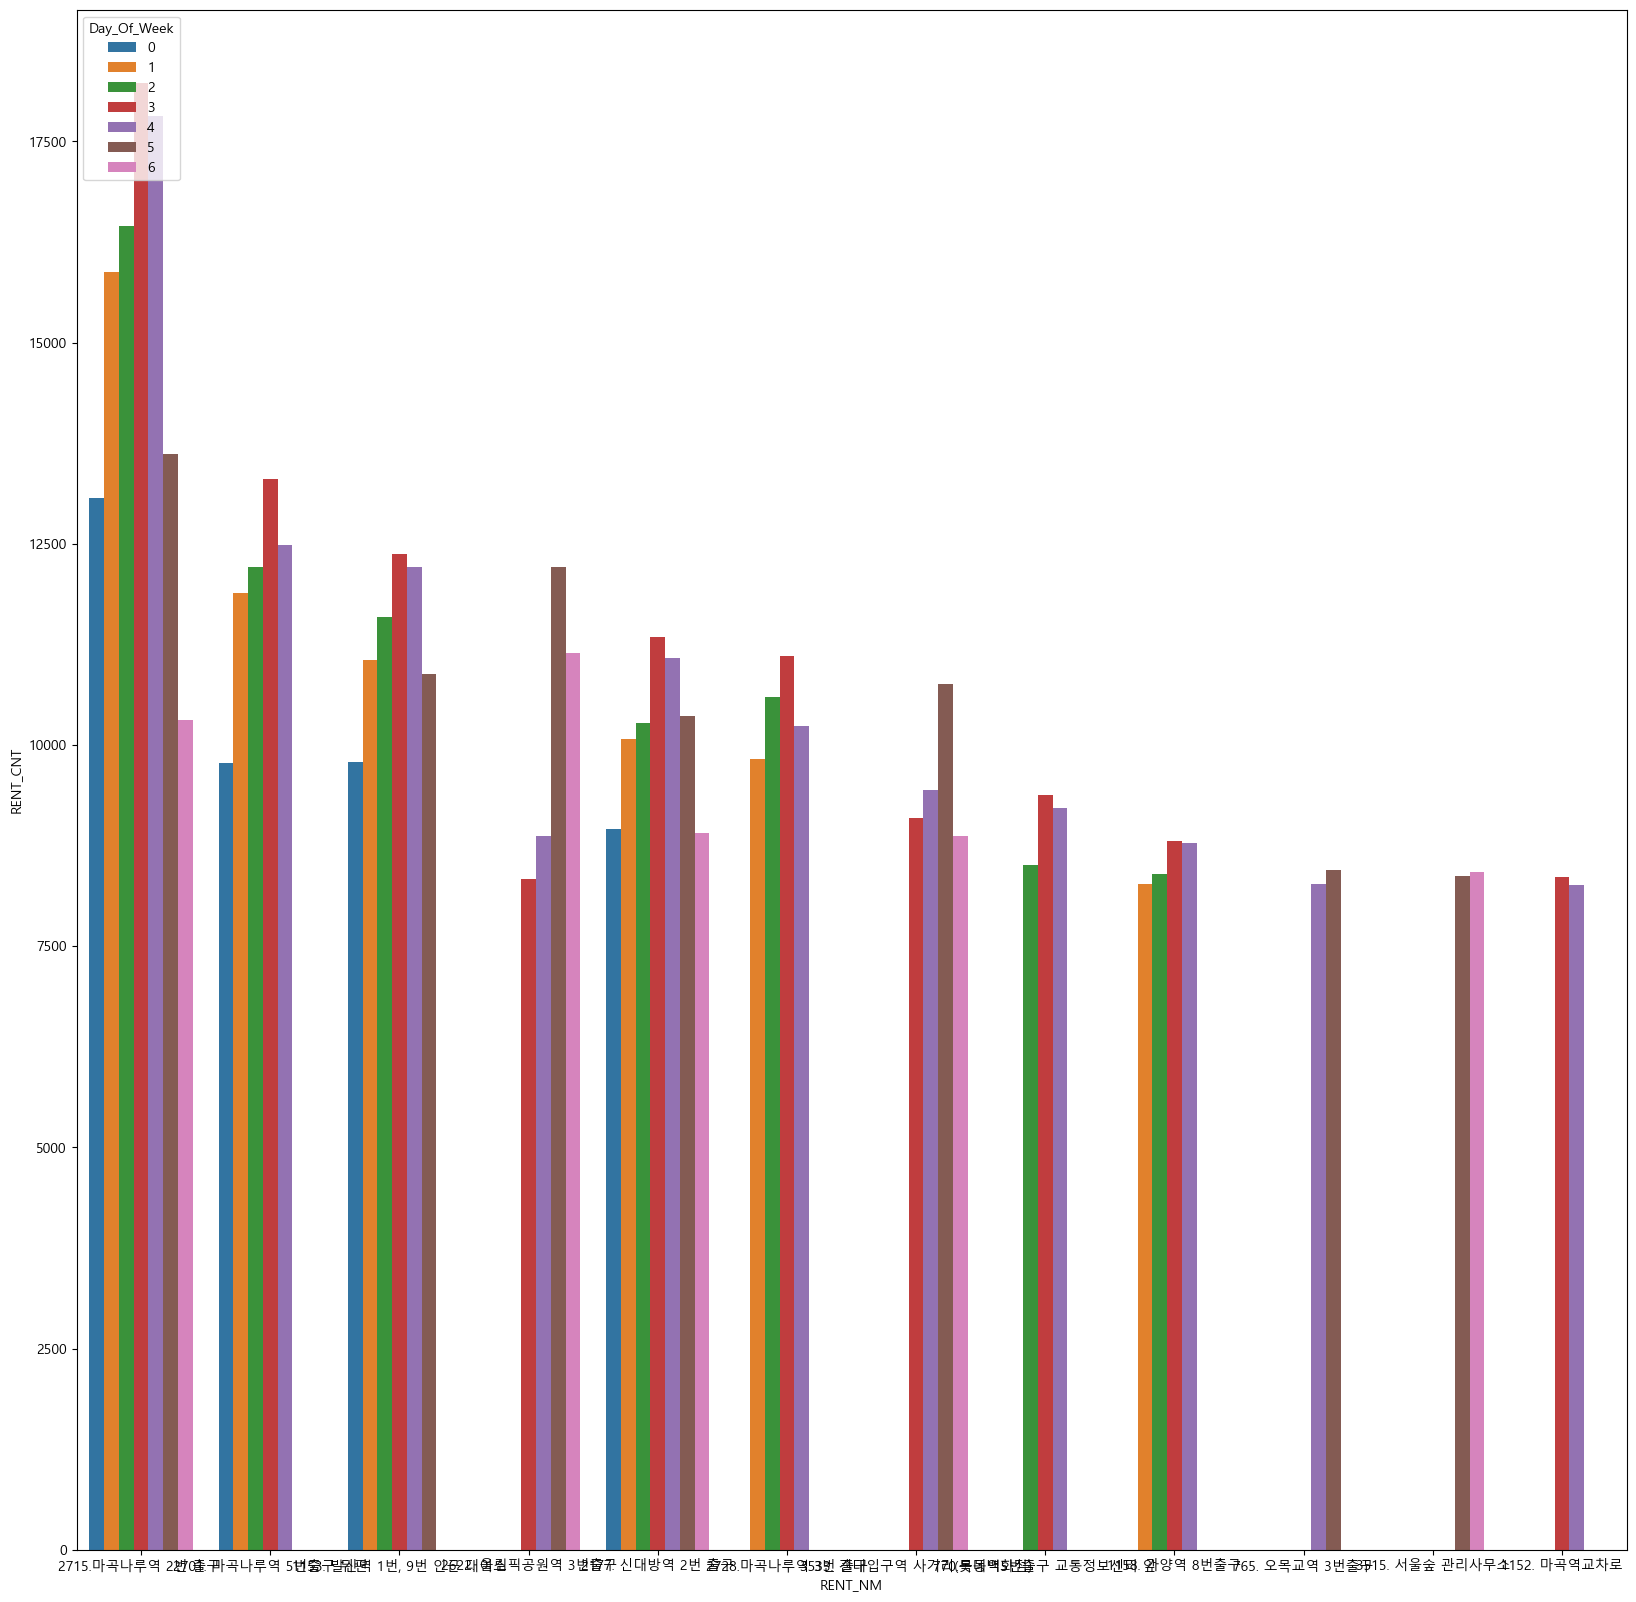

In [129]:
plt.figure(figsize=(20,20))
sns.barplot(data=fall_top_50_rent_loc,x='RENT_NM',y='RENT_CNT',hue='Day_Of_Week')

### 가을 top 50 렌트 횟수
- 마곡나루역에 이용자가 많음

In [130]:
winter_do_rent=winter_result.groupby(['STA_LOC','Day_Of_Week'])['RENT_CNT'].sum().reset_index()

<Axes: xlabel='STA_LOC', ylabel='RENT_CNT'>

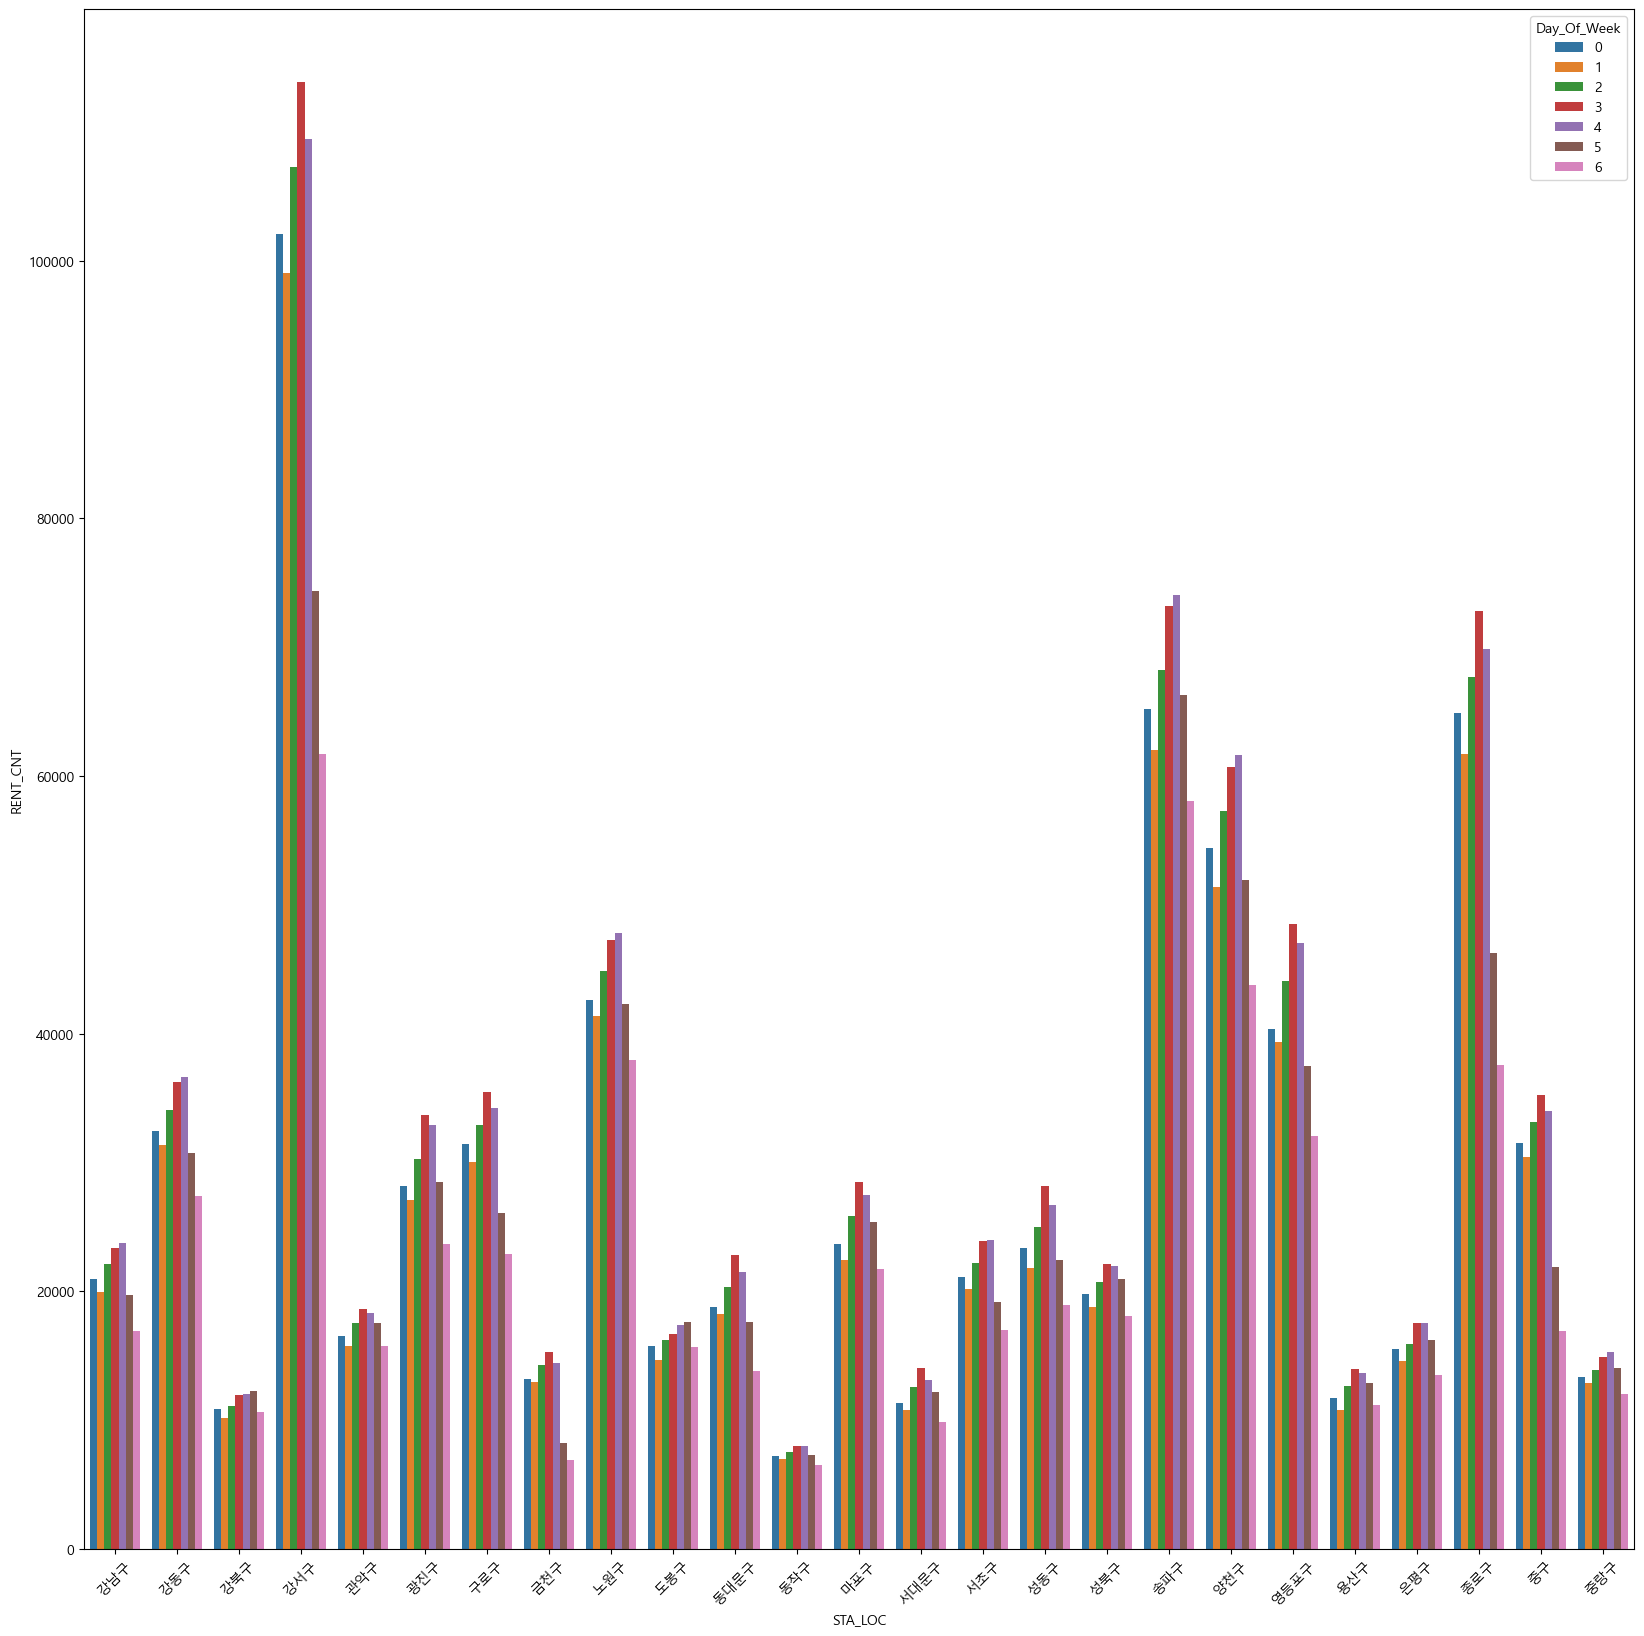

In [131]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=45)
sns.barplot(data=winter_do_rent,x='STA_LOC',y='RENT_CNT',hue='Day_Of_Week')

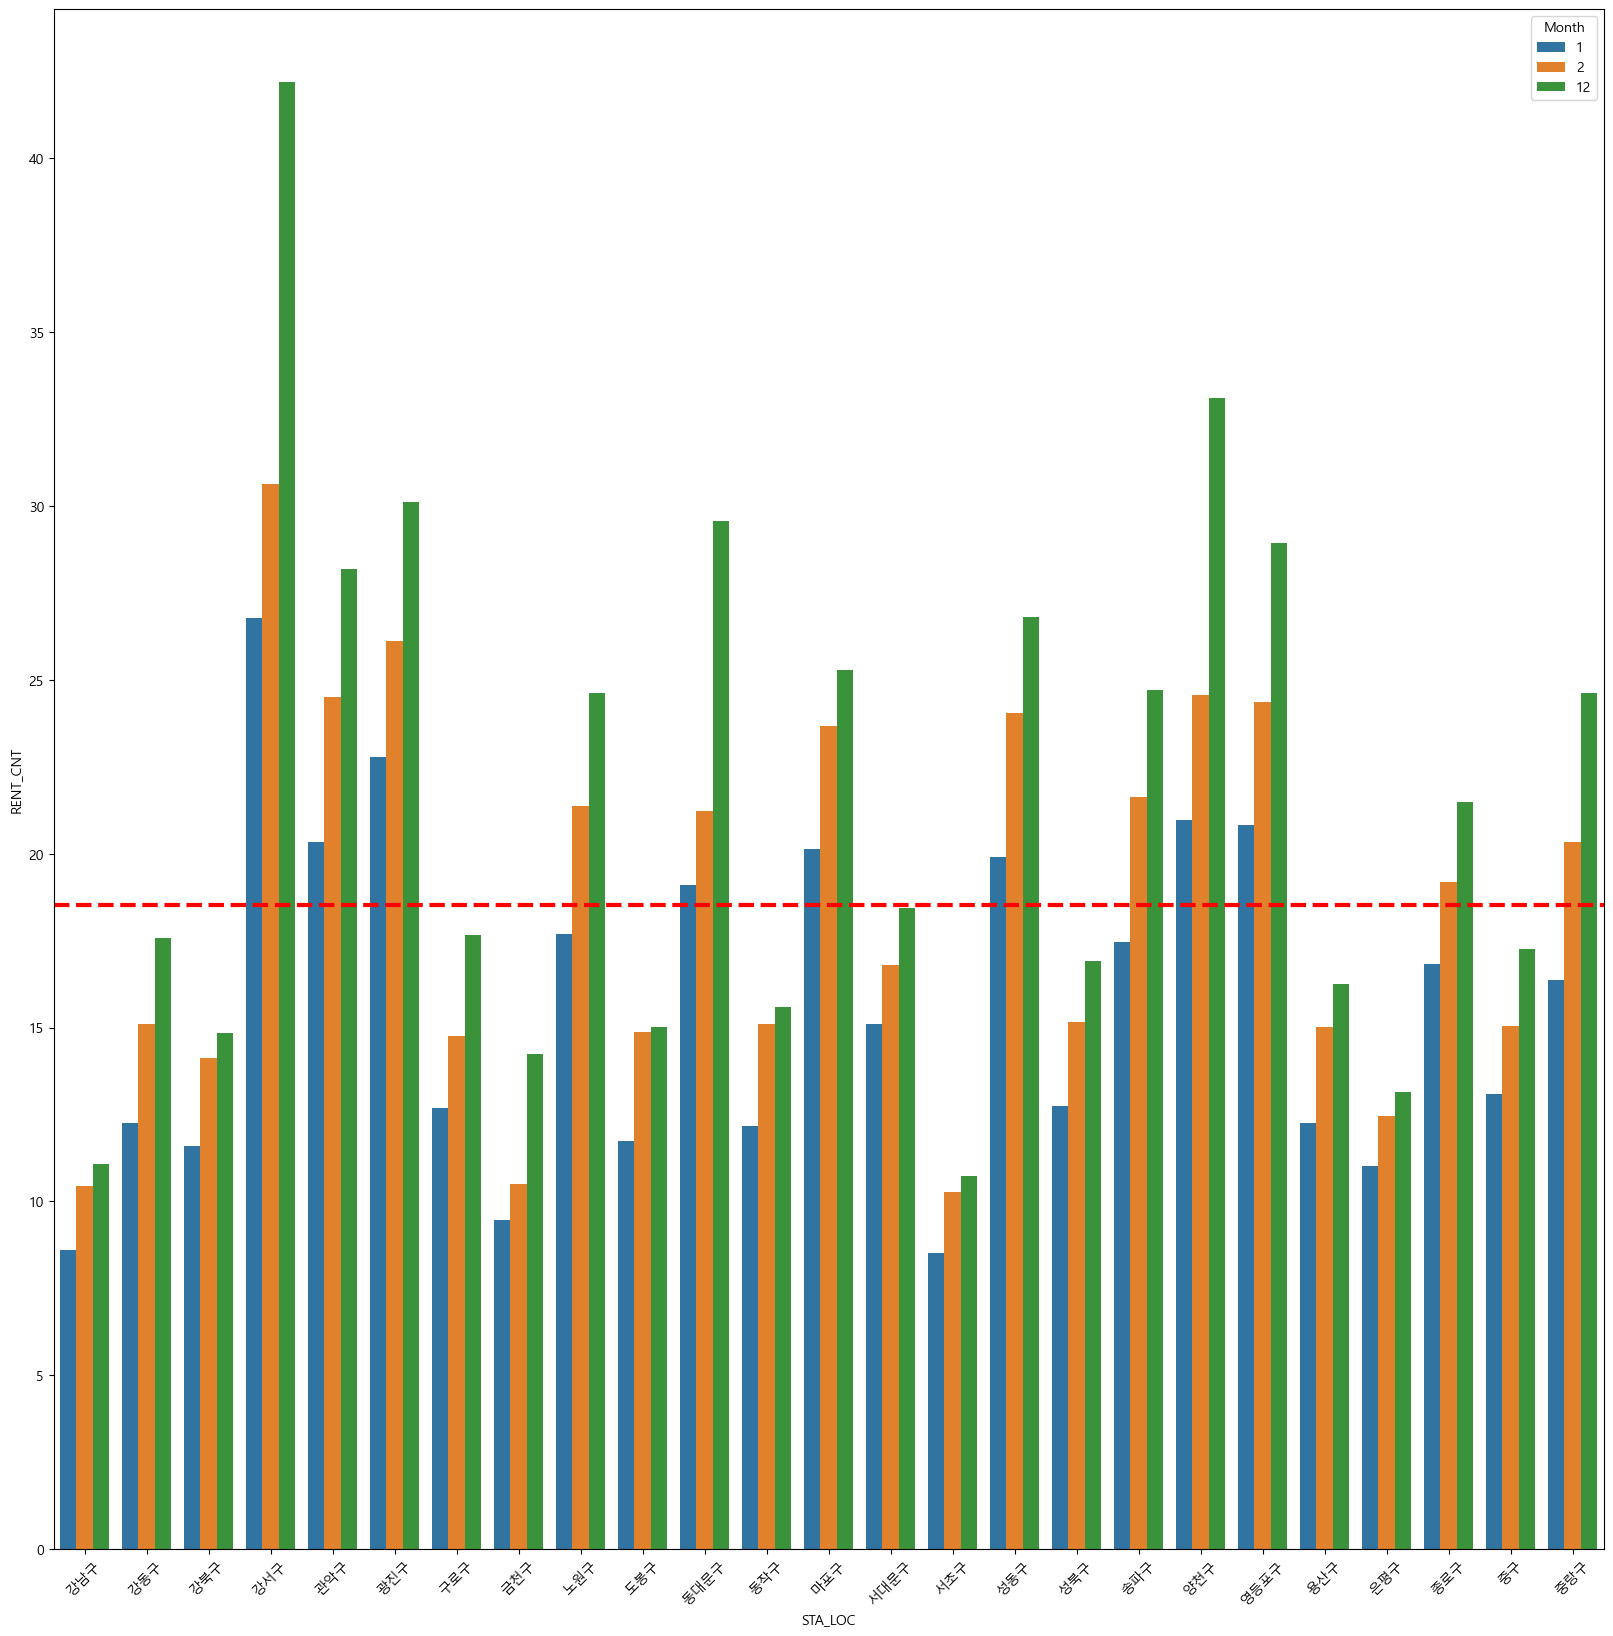

In [132]:
winter_do_rent_avg=winter_result.groupby(['STA_LOC','Month'])['RENT_CNT'].mean().reset_index()
plt.figure(figsize=(20,20))
plt.xticks(rotation=45)
sns.barplot(data=winter_do_rent_avg,x='STA_LOC',y='RENT_CNT',hue='Month')
plt.axhline(winter_do_rent_avg['RENT_CNT'].mean(), color='red', linestyle='--', linewidth='3')

### 구별 요일별 겨울 렌트 횟수
- 목요일 금요일이 다른 요일보다 렌트횟수가 많은 구가 많음

### 흥미로운점과 알아낸점
- 봄여름에는 수요일에 이용자가 많고 가을 겨울에는 목금에 이용자가 많은이유
- 봄 여름에는 올림픽공원 자전거 렌트 횟수가 많고 가을 겨울에는 마곡나루역쪽에 이용자가 많음
- 0도에서 20도 사이까지는 맑은 구름이 적은 날씨에 이용자가 많고 날씨가 더운 날에는 구름이 많을때에 렌트횟수가 많음
- 2020-2022까지 꾸준히 성장중
- 구름량이 많은날에 렌트횟수가 비교적 많다
- 이용자가 자전거를 사용했을때 선선하게 느끼게하는 바람일때 이용률이 높다
- 가을 여름 봄 겨울 순으로 이용자가 많다
- 5월달에 이용자가 제일 많다

# 가정
## 공유 자전거 사업을 한다면
- 한강 혹은 한강에 가까이 연결되어있는 천 근처에 사업을 시작한다.(자전거 도로가 잘 되어있는 곳에 이용률이 높다)
- 2020년 부터 2022까지 상승하는 추세로 보아 2023년에는 비슷하거나 더 상승할거라 예측한다
- 자전거 사용률에는 날씨의 영향을 많이 받기 때문에 일기 예보가 중요하다.
- 겨울과 온도가 너무 높을때의 여름에는 이용률이 급격히 떨어지니 이때 괜찮은 자전거를 빌려주고 나머지는 수리 및 체크를 해둔다
- 사람이 선선하게 느끼는 약한 바람과 구름이 있을때에 이용률이 높기때문에 많은 자전거를 준비를 해둔다
- 3월 4월에 한번씩 깜짝이벤트로 할인해서 이용자를 늘리는 방법을 사용한다

In [133]:
dummies_df = pd.get_dummies(merged_df['STA_LOC'], prefix='STA_LOC')

In [134]:
merged_df = pd.concat([merged_df, dummies_df], axis=1)

In [135]:
merged_df

,STA_LOC,RENT_NM,STAT_DATA,RENT_CNT,RTN_CNT,stnNm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxInsWsHrmt,maxWs,maxWsWd,maxWsHrmt,avgWs,hr24SumRws,maxWd,avgTd,minRhm,minRhmHrmt,avgRhm,avgPv,avgPa,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,hr1MaxIcsrHrmt,hr1MaxIcsr,sumGsr,ddMefs,ddMefsHrmt,ddMes,ddMesHrmt,sumDpthFhsc,avgTca,avgLmac,avgTs,minTg,avgCm5Te,avgCm10Te,avgCm20Te,avgCm30Te,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur,Year,Month,Day,avg_rhm_hour,avg_rhm_minute,min_ps_hour,min_ps_minute,max_ws_hour,max_ws_minute,max_ta_hour,max_ta_minute,min_ta_hour,min_ta_minute,Season,Day_Of_Week,Avg_Cloud_level,Avg_Temperature_level,Avg_Wind_Level,Avg_Humid_Level,STA_LOC_강남구,STA_LOC_강동구,STA_LOC_강북구,STA_LOC_강서구,STA_LOC_관악구,STA_LOC_광진구,STA_LOC_구로구,STA_LOC_금천구,STA_LOC_노원구,STA_LOC_도봉구,STA_LOC_동대문구,STA_LOC_동작구,STA_LOC_마포구,STA_LOC_서대문구,STA_LOC_서초구,STA_LOC_성동구,STA_LOC_성북구,STA_LOC_송파구,STA_LOC_양천구,STA_LOC_영등포구,STA_LOC_용산구,STA_LOC_은평구,STA_LOC_종로구,STA_LOC_중구,STA_LOC_중랑구
0,양천구,729. 서부식자재마트 건너편,2020-01-01,16,12,서울,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50.0,0906,2.6,50.0,0904,0.6,509,50.0,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,0.0,2020,1,1,0,2,14,18,9,4,14,57,9,4,4.0,2,2.0,0.0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,양천구,731. 서울시 도로환경관리센터,2020-01-01,20,20,서울,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50.0,0906,2.6,50.0,0904,0.6,509,50.0,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,0.0,2020,1,1,0,2,14,18,9,4,14,57,9,4,4.0,2,2.0,0.0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,양천구,732. 신월중학교,2020-01-01,9,2,서울,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50.0,0906,2.6,50.0,0904,0.6,509,50.0,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,0.0,2020,1,1,0,2,14,18,9,4,14,57,9,4,4.0,2,2.0,0.0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,양천구,733. 신정이펜하우스314동,2020-01-01,6,4,서울,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50.0,0906,2.6,50.0,0904,0.6,509,50.0,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,0.0,2020,1,1,0,2,14,18,9,4,14,57,9,4,4.0,2,2.0,0.0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,양천구,734. 신트리공원 입구,2020-01-01,13,16,서울,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50.0,0906,2.6,50.0,0904,0.6,509,50.0,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,0.0,2020,1,1,0,2,14,18,9,4,14,57,9,4,4.0,2,2.0,0.0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [136]:
# LabelEncoder 객체 생성
encoder = LabelEncoder()

In [137]:
# 특정 컬럼에 레이블 인코딩 적용
merged_df['RENT_LOC'] = encoder.fit_transform(merged_df['RENT_NM'])

In [138]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093662 entries, 0 to 1093661
Columns: 110 entries, STA_LOC to RENT_LOC
dtypes: bool(25), datetime64[ns](1), float64(44), int32(15), int64(3), object(22)
memory usage: 672.7+ MB


In [139]:
select_col = ['STA_LOC_강남구','STA_LOC_강동구','STA_LOC_강북구','STA_LOC_강서구','STA_LOC_관악구',	'STA_LOC_광진구','STA_LOC_구로구','STA_LOC_금천구','STA_LOC_노원구','STA_LOC_도봉구','STA_LOC_동대문구','STA_LOC_동작구','STA_LOC_마포구','STA_LOC_서대문구','STA_LOC_서초구',	'STA_LOC_성동구','STA_LOC_성북구','STA_LOC_송파구','STA_LOC_양천구','STA_LOC_영등포구',	'STA_LOC_용산구','STA_LOC_은평구','STA_LOC_종로구','STA_LOC_중구','STA_LOC_중랑구','RENT_LOC','avgTa', 'maxTa', 'sumRnDur', 'sumRn', 'maxInsWs', 'maxInsWsWd', 'maxWs', 'maxWsWd', 'avgWs', 'maxWd', 'avgTd', 'avgRhm', 'avgPv', 'ssDur', 'avgTca', 'avgLmac', 'avgTs', 'avgM50Te','sumFogDur','ddMefs','ddMes',
'Year', 'Month', 'avg_rhm_hour', 'avg_rhm_minute','hr24SumRws', 'max_ws_hour','max_ws_minute','max_ta_hour','max_ta_minute','min_ta_hour','min_ta_minute','Season','Avg_Cloud_level','Avg_Temperature_level','Day_Of_Week']



In [140]:
X = merged_df[select_col]
y = merged_df['RENT_CNT']

In [141]:
print(X.dtypes[X.dtypes == 'object'])

Series([], dtype: object)


In [142]:
merged_df['minRhm'] = merged_df['minRhm'].astype(int)

In [143]:
# 각 열의 결측치 개수 확인
X.loc[X.isnull().any(axis=1)]

,STA_LOC_강남구,STA_LOC_강동구,STA_LOC_강북구,STA_LOC_강서구,STA_LOC_관악구,STA_LOC_광진구,STA_LOC_구로구,STA_LOC_금천구,STA_LOC_노원구,STA_LOC_도봉구,STA_LOC_동대문구,STA_LOC_동작구,STA_LOC_마포구,STA_LOC_서대문구,STA_LOC_서초구,STA_LOC_성동구,STA_LOC_성북구,STA_LOC_송파구,STA_LOC_양천구,STA_LOC_영등포구,STA_LOC_용산구,STA_LOC_은평구,STA_LOC_종로구,STA_LOC_중구,STA_LOC_중랑구,RENT_LOC,avgTa,maxTa,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxWs,maxWsWd,avgWs,maxWd,avgTd,avgRhm,avgPv,ssDur,avgTca,avgLmac,avgTs,avgM50Te,sumFogDur,ddMefs,ddMes,Year,Month,avg_rhm_hour,avg_rhm_minute,hr24SumRws,max_ws_hour,max_ws_minute,max_ta_hour,max_ta_minute,min_ta_hour,min_ta_minute,Season,Avg_Cloud_level,Avg_Temperature_level,Day_Of_Week


In [144]:
scaler = StandardScaler()

In [145]:
scaled_features = scaler.fit_transform(X)

In [146]:
X_train_ran, X_test_ran, y_train_ran, y_test_ran = train_test_split(scaled_features, y, test_size=0.2, random_state=42)

In [147]:
random_forest_all_col = RandomForestRegressor()

In [148]:
random_forest_all_col.fit(X_train_ran, y_train_ran)

RandomForestRegressor()

In [149]:
y_pred_ran = random_forest_all_col.predict(X_test_ran)
rmse = np.sqrt(mean_squared_error(y_test_ran, y_pred_ran))
print(f"Mean Squared Error: {rmse}")

Mean Squared Error: 12.296163936579513


In [150]:
X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(scaled_features, y, test_size=0.2, random_state=42)

In [151]:
xgboost_all_col = XGBRegressor()

In [152]:
xgboost_all_col.fit(X_train_xg, y_train_xg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [153]:
y_pred_xg = xgboost_all_col.predict(X_test_xg)
rmse = np.sqrt(mean_squared_error(y_test_xg, y_pred_xg))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 19.90799391715478


In [158]:
ridge_all_col=Ridge()

In [159]:
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(scaled_features, y, test_size=0.2, random_state=42)

In [160]:
ridge_all_col.fit(X_train_ridge, y_train_ridge)

Ridge()

In [161]:
y_pred_ridge = ridge_all_col.predict(X_test_ridge)
rmse = np.sqrt(mean_squared_error(y_test_ridge, y_pred_ridge))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 36.06418330358605


In [154]:
lgbm_all_col=LGBMRegressor()

In [155]:
X_train_lgbm, X_test_lgbm, y_train_lgbm, y_test_lgbm = train_test_split(scaled_features, y, test_size=0.2, random_state=42)

In [156]:
lgbm_all_col.fit(X_train_lgbm, y_train_lgbm)

LGBMRegressor()

In [157]:
y_pred_lgbm = lgbm_all_col.predict(X_test_lgbm)
rmse = np.sqrt(mean_squared_error(y_test_lgbm, y_pred_lgbm))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 30.738700701784936


In [103]:
select_col2 = ['STA_LOC_강남구','STA_LOC_강동구','STA_LOC_강북구','STA_LOC_강서구','STA_LOC_관악구',	'STA_LOC_광진구','STA_LOC_구로구','STA_LOC_금천구','STA_LOC_노원구','STA_LOC_도봉구','STA_LOC_동대문구','STA_LOC_동작구','STA_LOC_마포구','STA_LOC_서대문구','STA_LOC_서초구',	'STA_LOC_성동구','STA_LOC_성북구','STA_LOC_송파구','STA_LOC_양천구','STA_LOC_영등포구',	'STA_LOC_용산구','STA_LOC_은평구','STA_LOC_종로구','STA_LOC_중구','STA_LOC_중랑구','RENT_LOC','avgTa', 'maxTa', 'sumRnDur', 'sumRn', 'maxInsWs', 'maxInsWsWd', 'maxWs', 'maxWsWd', 'avgWs', 'maxWd', 'avgTd', 'avgRhm', 'avgPv', 'ssDur', 'avgTca', 'avgLmac', 'avgTs', 'avgM50Te','sumFogDur','ddMefs','ddMes'
'Year', 'Month', 'avg_rhm_hour', 'avg_rhm_minute','hr24SumRws', 'max_ws_hour','max_ws_minute','max_ta_hour','max_ta_minute','min_ta_hour','min_ta_minute','Day_Of_Week']
X = merged_df[select_col2]
y = merged_df['RENT_CNT']

In [104]:
scaler_selec = StandardScaler()

In [105]:
scaled_features = scaler_selec.fit_transform(X)

In [107]:
X_train_ran_1, X_test_ran_1, y_train_ran_1, y_test_ran_1 = train_test_split(scaled_features, y, test_size=0.2, random_state=42)

In [108]:
random_forest_select_col = RandomForestRegressor()

In [109]:
random_forest_select_col.fit(X_train_ran_1, y_train_ran_1)

RandomForestRegressor()

In [110]:
y_pred_ran_1 = random_forest_select_col.predict(X_test_ran_1)
mse = mean_squared_error(y_test_ran_1, y_pred_ran_1)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 164.27786307187299


In [111]:
xgboost_selec_col = XGBRegressor()

In [112]:
X_train_xg_1, X_test_xg_1, y_train_xg_1, y_test_xg_1 = train_test_split(scaled_features, y, test_size=0.2, random_state=42)

In [113]:
xgboost_selec_col.fit(X_train_xg_1, y_train_xg_1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [114]:
y_pred_xg_1 = xgboost_selec_col.predict(X_test_xg_1)
rmse1 = mean_squared_error(y_test_xg_1, y_pred_xg_1)
print(f"Mean Squared Error: {rmse1}")

Mean Squared Error: 401.602644228866


In [115]:
ridge_selec_col=Ridge()

In [116]:
X_train_ridge_1, X_test_ridge_1, y_train_ridge_1, y_test_ridge_1 = train_test_split(scaled_features, y, test_size=0.2, random_state=42)

In [117]:
ridge_selec_col.fit(X_train_ridge_1, y_train_ridge_1)

Ridge()

In [118]:
y_pred_ridge_1 = ridge_selec_col.predict(X_test_ridge_1)
rmse2 = mean_squared_error(y_test_ridge_1, y_pred_ridge_1)
print(f"Mean Squared Error: {rmse2}")

Mean Squared Error: 1319.0121754996821


In [106]:
lgbm_selec_col=LGBMRegressor()

In [120]:
X_train_lgbm_1, X_test_lgbm_1, y_train_lgbm_1, y_test_lgbm_1 = train_test_split(scaled_features, y, test_size=0.2, random_state=42)

In [121]:
lgbm_selec_col.fit(X_train_lgbm_1, y_train_lgbm_1)

LGBMRegressor()

In [122]:
y_pred_lgbm_1 = lgbm_selec_col.predict(X_test_lgbm_1)
rmse3 = mean_squared_error(y_test_lgbm_1, y_pred_lgbm_1)
print(f"Mean Squared Error: {rmse3}")

Mean Squared Error: 951.7941426376892


In [155]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [165]:
mse_scores = cross_val_score(xgboost_all_col, X, y, cv=kfold, scoring='neg_mean_squared_error')

In [166]:
# 각 fold의 MSE 출력
for i, score in enumerate(mse_scores, 1):
    print(f"Fold {i} MSE: {score}")

Fold 1 MSE: -410.31280257955007
Fold 2 MSE: -390.18143196462535
Fold 3 MSE: -402.5893775342202
Fold 4 MSE: -416.4991575607072
Fold 5 MSE: -399.5337155389564
Fold 6 MSE: -388.5725276921135
Fold 7 MSE: -408.59563184158736
Fold 8 MSE: -408.7615566069615
Fold 9 MSE: -416.86026815220436
Fold 10 MSE: -406.3030010843183


In [167]:
print(f"평균 MSE: {np.mean(mse_scores)}")

평균 MSE: -404.8209470555244
